In [1]:
import os

# Ana klasör yolu
base_dir = '/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/GPNE/'

# fits dosyalarının sayısını tutacak değişken
fits_count = 0

# Ana klasör içindeki tüm alt klasörleri tarar
for root, dirs, files in os.walk(base_dir):
    for file in files:
        if file.endswith('.fits'):
            fits_count += 1

print(f"Toplam {fits_count} adet .fits dosyası bulundu.")

Toplam 4925 adet .fits dosyası bulundu.


In [8]:
import os
import re

# Ana klasör yolu
base_dir = '/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/GPNE/'

# Sonuçları tutacak liste
result = []

# Klasör isminin beş basamaklı sayı olup olmadığını kontrol eden fonksiyon
def is_five_digit_number(s):
    return re.fullmatch(r'\d{5}', s) is not None

# Ana klasör içindeki tüm alt klasörleri tarar
for root, dirs, files in os.walk(base_dir):
    folder_name = os.path.basename(root)
    if is_five_digit_number(folder_name):
        fits_count = 0
        for file in files:
            if file.endswith('.fits'):
                fits_count += 1
        result.append((folder_name, fits_count))

# Listeyi klasör isimlerine göre küçükten büyüğe sıralar
result.sort(key=lambda x: int(x[0]))

# Sonuçları yazdır
for folder, count in result:
    print(f"Klasör: {folder}, .fits dosya sayısı: {count}")

# Toplam klasör sayısını yazdır
print(f"Toplam klasör sayısı: {len(result)}")

# .fits dosyası olmayan klasörleri yazdır
no_fits_folders = [folder for folder, count in result if count == 0]
if no_fits_folders:
    print("FITS dosyası olmayan klasörler:")
    for folder in no_fits_folders:
        print(folder)
else:
    print("Tüm klasörlerde FITS dosyası var.")

Klasör: 00008, .fits dosya sayısı: 4
Klasör: 00009, .fits dosya sayısı: 5
Klasör: 00010, .fits dosya sayısı: 0
Klasör: 00011, .fits dosya sayısı: 4
Klasör: 00012, .fits dosya sayısı: 3
Klasör: 00013, .fits dosya sayısı: 1
Klasör: 00014, .fits dosya sayısı: 1
Klasör: 00015, .fits dosya sayısı: 3
Klasör: 00016, .fits dosya sayısı: 1
Klasör: 00017, .fits dosya sayısı: 3
Klasör: 00019, .fits dosya sayısı: 7
Klasör: 00020, .fits dosya sayısı: 3
Klasör: 00021, .fits dosya sayısı: 4
Klasör: 00022, .fits dosya sayısı: 4
Klasör: 00023, .fits dosya sayısı: 1
Klasör: 00025, .fits dosya sayısı: 3
Klasör: 00026, .fits dosya sayısı: 3
Klasör: 00027, .fits dosya sayısı: 3
Klasör: 00028, .fits dosya sayısı: 4
Klasör: 00029, .fits dosya sayısı: 4
Klasör: 00030, .fits dosya sayısı: 4
Klasör: 00031, .fits dosya sayısı: 3
Klasör: 00032, .fits dosya sayısı: 2
Klasör: 00034, .fits dosya sayısı: 4
Klasör: 00035, .fits dosya sayısı: 3
Klasör: 00037, .fits dosya sayısı: 3
Klasör: 00038, .fits dosya sayısı: 3
K

In [11]:
import os
import re
import pandas as pd

# Ana klasör yolu
base_dir = '/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/GPNE/'

# Sonuçları tutacak liste
result = []

# Klasör isminin beş basamaklı sayı olup olmadığını kontrol eden fonksiyon
def is_five_digit_number(s):
    return re.fullmatch(r'\d{5}', s) is not None

# Ana klasör içindeki tüm alt klasörleri tarar
for root, dirs, files in os.walk(base_dir):
    folder_name = os.path.basename(root)
    if is_five_digit_number(folder_name):
        for file in files:
            if file.endswith('.fits'):
                file_base = os.path.splitext(file)[0]
                csv_file = os.path.join(root, f"{file_base}.csv")
                dat_file = os.path.join(root, f"{file_base}.dat")
                
                if os.path.exists(csv_file):
                    data_file = csv_file
                elif os.path.exists(dat_file):
                    data_file = dat_file
                else:
                    continue  # Neither CSV nor DAT file found
                
                try:
                    data = pd.read_csv(data_file, delimiter=',', header=None)
                    wavelength = data.iloc[:, 0]  # İlk sütun dalga boyunu içerir
                    wavelength_range = (wavelength.min(), wavelength.max())
                    result.append((folder_name, file, wavelength_range))
                except Exception as e:
                    print(f"Error reading {data_file}: {e}")

# Listeyi klasör isimlerine göre küçükten büyüğe sıralar
result.sort(key=lambda x: int(x[0]))

# Sonuçları yazdır
for folder, file, wavelength_range in result:
    print(f"Klasör: {folder}, Dosya: {file}, Dalga boyu aralığı: {wavelength_range}")

# Toplam klasör sayısını yazdır
unique_folders = set([folder for folder, file, wavelength_range in result])
print(f"Toplam klasör sayısı: {len(unique_folders)}")

# .fits dosyası olmayan klasörleri yazdır
all_folders = set([folder for root, dirs, files in os.walk(base_dir) for folder in dirs if is_five_digit_number(folder)])
no_fits_folders = all_folders - unique_folders
if no_fits_folders:
    print("FITS dosyası olmayan klasörler:")
    for folder in no_fits_folders:
        print(folder)
else:
    print("Tüm klasörlerde FITS dosyası var.")

Error reading /Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/GPNE/02514/DBS_May2008_SCIENCE_PHR0723+0036_dbs01649r_otzxfifEcdF_id2514.csv: No columns to parse from file
Klasör: 00008, Dosya: SAAO201909_K6-4_SA080919_id8.fits, Dalga boyu aralığı: (3276.246598, 8821.805596)
Klasör: 00008, Dosya: AAOmega_bulge_K6-4_BLUE_2dF300508_id8.fits, Dalga boyu aralığı: (3732.149658, 5856.478882)
Klasör: 00008, Dosya: DBS_May2008_SCIENCE_K6-4_dbs00422r_otzxfifEcdF_id8.fits, Dalga boyu aralığı: (6246.190337, 7251.409181)
Klasör: 00008, Dosya: AAOmega_bulge_K6-4_RED_2dF300508_id8.fits, Dalga boyu aralığı: (5630.039063, 8858.850098)
Klasör: 00009, Dosya: AAOmega_bulge_PNG000.1-01.9_BLUEx_2dF160308_id9.fits, Dalga boyu aralığı: (3734.16748, 5858.473511)
Klasör: 00009, Dosya: AAOmega_bulge_JaSt93_REDx_2dF290508_id9.fits, Dalga boyu aralığı: (5621.339722, 8850.228882)
Klasör: 00009, Dosya: AAOmega_bulge_PNG000.1-01.9_RED_2dF160308_id9.fits, Dalga boyu aralığı: (5628.845215, 8857.692871)
Klasör: 00009, Do

In [14]:
import os
import re
import pandas as pd

# Ana klasör yolu
base_dir = '/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/GPNE/'

# Sonuçları tutacak değişkenler
dbs_folder_count = 0
dbs_fits_count = 0

# Dalga boyu aralıklarını tutacak listeler
start_wavelengths = []
end_wavelengths = []

# Klasör isminin beş basamaklı sayı olup olmadığını kontrol eden fonksiyon
def is_five_digit_number(s):
    return re.fullmatch(r'\d{5}', s) is not None

# Ana klasör içindeki tüm alt klasörleri tarar
for root, dirs, files in os.walk(base_dir):
    folder_name = os.path.basename(root)
    if is_five_digit_number(folder_name):
        dbs_files_in_folder = [file for file in files if file.startswith('DBS') and file.endswith('.fits')]
        if dbs_files_in_folder:
            dbs_folder_count += 1
            dbs_fits_count += len(dbs_files_in_folder)
            for file in dbs_files_in_folder:
                file_base = os.path.splitext(file)[0]
                csv_file = os.path.join(root, f"{file_base}.csv")
                dat_file = os.path.join(root, f"{file_base}.dat")
                
                if os.path.exists(csv_file):
                    data_file = csv_file
                elif os.path.exists(dat_file):
                    data_file = dat_file
                else:
                    continue  # Neither CSV nor DAT file found
                
                try:
                    data = pd.read_csv(data_file, delimiter=',', header=None)
                    wavelength = data.iloc[:, 0]  # İlk sütun dalga boyunu içerir
                    start_wavelengths.append(wavelength.min())
                    end_wavelengths.append(wavelength.max())
                except Exception as e:
                    print(f"Error reading {data_file}: {e}")

# Başlangıç ve bitiş dalga boylarının ortalamalarını hesapla
if start_wavelengths and end_wavelengths:
    avg_start_wavelength = sum(start_wavelengths) / len(start_wavelengths)
    avg_end_wavelength = sum(end_wavelengths) / len(end_wavelengths)
    
    print(f"Başlangıç dalga boyu ortalaması: {avg_start_wavelength}")
    print(f"Bitiş dalga boyu ortalaması: {avg_end_wavelength}")
else:
    print("İşlenecek dosya bulunamadı.")

# DBS ile başlayan klasör ve dosya sayısını yazdır
print(f"DBS ile başlayan klasör sayısı: {dbs_folder_count}")
print(f"DBS ile başlayan .fits dosyası sayısı: {dbs_fits_count}")


Error reading /Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/GPNE/02514/DBS_May2008_SCIENCE_PHR0723+0036_dbs01649r_otzxfifEcdF_id2514.csv: No columns to parse from file
Başlangıç dalga boyu ortalaması: 5779.24099707059
Bitiş dalga boyu ortalaması: 7289.974270276471
DBS ile başlayan klasör sayısı: 473
DBS ile başlayan .fits dosyası sayısı: 511


In [21]:
import pandas as pd
import os

# CSV dosyalarının bulunduğu dizin
csv_directory = '/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/GPNE/CSV/'

# Tüm CSV dosyalarını dizinden alın
csv_files = [file for file in os.listdir(csv_directory) if file.endswith('.csv')]

# Tüm tarih bilgilerini saklamak için bir liste oluşturun
all_dates = []

# Her CSV dosyasını okuyun ve tarih bilgilerini toplayın
for csv_file in csv_files:
    file_path = os.path.join(csv_directory, csv_file)
    try:
        df = pd.read_csv(file_path, encoding='ISO-8859-1')  # veya 'latin1'
        if 'Date' in df.columns:
            # Tarih sütununu datetime formatına çevirin
            df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d', errors='coerce')
            # Geçersiz tarihleri filtreleyin
            valid_dates = df['Date'].dropna()
            # Tüm geçerli tarihleri all_dates listesine ekleyin
            all_dates.extend(valid_dates)
    except UnicodeDecodeError:
        print(f"Dosya okunamadı: {file_path}")

# En eski ve en yakın tarihleri bulun
if all_dates:
    oldest_date = min(all_dates)
    newest_date = max(all_dates)
    print(f"En eski tarih: {oldest_date.strftime('%Y-%m-%d')}")
    print(f"En yakın tarih: {newest_date.strftime('%Y-%m-%d')}")
else:
    print("Tarih bilgisi bulunamadı.")

En eski tarih: 1970-03-05
En yakın tarih: 2023-09-14


In [24]:
import pandas as pd
import os

# CSV dosyalarının bulunduğu dizin
csv_directory = '/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/GPNE/CSV/'

# Tüm CSV dosyalarını dizinden alın
csv_files = [file for file in os.listdir(csv_directory) if file.endswith('.csv')]

# FRA ile başlayan verileri saklamak için bir liste oluşturun
fra_rows_list = []

# Her CSV dosyasını okuyun ve şartlara uyan verileri toplayın
for csv_file in csv_files:
    file_path = os.path.join(csv_directory, csv_file)
    try:
        df = pd.read_csv(file_path, encoding='ISO-8859-1')  # veya 'latin1'
        if 'File' in df.columns:
            # File sütununda FRA ile başlayan veriler
            fra_rows = df[df['File'].str.startswith('FRA', na=False)]
            if not fra_rows.empty:
                # FRA ile başlayan satırları fra_rows_list listesine ekleyin
                fra_rows_list.append(fra_rows)
    except UnicodeDecodeError:
        print(f"Dosya okunamadı: {file_path}")

# FRA ile başlayan verileri ekrana yazdırın
if fra_rows_list:
    for i, fra_df in enumerate(fra_rows_list):
        print(f"Dosya {i+1}:")
        print(fra_df)
else:
    print("FRA ile başlayan veri bulunamadı.")


Dosya 1:
   Label        Date   MIN   MAX  \
0      1  2017-09-20  3990  7577   

                                           Telescope             Instrument  \
0  C2PU Epsilon configuration Cassegrain 1 m F/D ...  Lisa - 50 micron slit   

  Filter  Xaxis  Yaxis Binned                           File  \
0      -      1      1     no  FRA_Ch1_CN200917_id31737.fits   

                                            ADS  
0  http://adsabs.harvard.edu/abs/FrenchAmateurs  
Dosya 2:
   Label        Date   MIN   MAX               Telescope  \
0      1  2018-08-05  3802  7525  Newton TS 200 mm F/D 5   

                  Instrument Filter  Xaxis  Yaxis Binned  \
0  Alpy 600 - 23 micron slit      -      1      1     no   

                             File  \
0  FRA_Pa36_KO050818_id23441.fits   

                                            ADS  
0  http://adsabs.harvard.edu/abs/FrenchAmateurs  
Dosya 3:
   Label        Date   MIN   MAX                      Telescope  \
0      1  2016-09-02  4015  

In [27]:
import pandas as pd
import os

# CSV dosyalarının bulunduğu dizin
csv_directory = '/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/GPNE/CSV/'

# Tüm CSV dosyalarını dizinden alın
csv_files = [file for file in os.listdir(csv_directory) if file.endswith('.csv')]

# FRA ile başlayan verileri saklamak için bir liste oluşturun
fra_rows_list = []

# Her CSV dosyasını okuyun ve şartlara uyan verileri toplayın
for csv_file in csv_files:
    file_path = os.path.join(csv_directory, csv_file)
    try:
        df = pd.read_csv(file_path, encoding='ISO-8859-1')  # veya 'latin1'
        if 'File' in df.columns:
            # File sütununda FRA ile başlayan veriler
            fra_rows = df[df['File'].str.startswith('FRA', na=False)]
            if not fra_rows.empty:
                # FRA ile başlayan satırları fra_rows_list listesine ekleyin
                fra_rows_list.extend(fra_rows['File'].tolist())
    except UnicodeDecodeError:
        print(f"Dosya okunamadı: {file_path}")

# FRA ile başlayan verileri ekrana yazdırın
if fra_rows_list:
    print("FRA ile başlayan File sütunundaki veriler:")
    for file in fra_rows_list:
        print(file)
else:
    print("FRA ile başlayan veri bulunamadı.")

FRA ile başlayan File sütunundaki veriler:
FRA_Ch1_CN200917_id31737.fits
FRA_Pa36_KO050818_id23441.fits
FRA_Kn59_AQ020916_id10897.fits
FRA_IPHASXJ055711.7+282322_CR270920_id8355.fits
FRA_IPHASXJ193305.9+132921_CR181020_id8553.fits
FRA_Ra24_CN190917_id10061.fits
FRA_Pa13_CN300519_id10920.fits
FRA_Kn131_CO021118_id8790.fits
FRA_Kn132_KO161118_id31913.fits
FRA_Kn23_AQ310816_id4357.fits
FRA_App2_HP240717_id4431.fits
FRA_CGMW5-11005_CN230519_id8800.fits
FRA_Ra30_KO260219_id23293.fits
FRA_MPAJ1717-4351_CL240521_id3029.fits
FRA_PM1-20_CO200220_id4544.fits
FRA_LDu13_AQ111015_id15668.fits
FRA_Br9_KO140923_id33687.fits
FRA_RaObjet2_CN170920_id32204.fits
FRA_Ou6_AQ041016_id8597.fits
FRA_KLSS1-6_CO190320_id726.fits
FRA_StDr11_CO240620_id32364.fits
FRA_StDr6_CO260520_id32359.fits
FRA_Sh2-123_KO190120_id32403.fits
FRA_CaVa1_KO180417_id31915.fits
FRA_CaVa1_KO311017_id31915.fits
FRA_Ra67_KO220517_id31929.fits
FRA_Br6_2S090823_id33680.fits
FRA_CoMaC2_KO250319_id14820.fits
FRA_MulPre4_2S020322_id32824.f

In [29]:
import pandas as pd
import os

# CSV dosyalarının bulunduğu dizin
csv_directory = '/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/GPNE/CSV/'

# Tüm CSV dosyalarını dizinden alın
csv_files = [file for file in os.listdir(csv_directory) if file.endswith('.csv')]

# FRA ile başlayan verileri ve date bilgilerini saklamak için bir liste oluşturun
fra_data_list = []

# Her CSV dosyasını okuyun ve şartlara uyan verileri toplayın
for csv_file in csv_files:
    file_path = os.path.join(csv_directory, csv_file)
    try:
        df = pd.read_csv(file_path, encoding='ISO-8859-1')  # veya 'latin1'
        if 'File' in df.columns and 'Date' in df.columns:
            # File sütununda FRA ile başlayan veriler
            fra_rows = df[df['File'].str.startswith('FRA', na=False)]
            if not fra_rows.empty:
                # FRA ile başlayan satırların File ve Date sütunlarını fra_data_list listesine ekleyin
                for index, row in fra_rows.iterrows():
                    fra_data_list.append({'File': row['File'], 'Date': row['Date']})
    except UnicodeDecodeError:
        print(f"Dosya okunamadı: {file_path}")

# FRA ile başlayan verileri ve date bilgilerini listeleyin
if fra_data_list:
    print("FRA ile başlayan veriler ve date bilgileri:")
    for data in fra_data_list:
        print(f"File: {data['File']}, Date: {data['Date']}")
else:
    print("FRA ile başlayan veri bulunamadı.")


FRA ile başlayan veriler ve date bilgileri:
File: FRA_Ch1_CN200917_id31737.fits, Date: 2017-09-20
File: FRA_Pa36_KO050818_id23441.fits, Date: 2018-08-05
File: FRA_Kn59_AQ020916_id10897.fits, Date: 2016-09-02
File: FRA_IPHASXJ055711.7+282322_CR270920_id8355.fits, Date: 2020-09-27
File: FRA_IPHASXJ193305.9+132921_CR181020_id8553.fits, Date: 2020-10-18
File: FRA_Ra24_CN190917_id10061.fits, Date: 2017-09-19
File: FRA_Pa13_CN300519_id10920.fits, Date: 2019-05-30
File: FRA_Kn131_CO021118_id8790.fits, Date: 2018-11-02
File: FRA_Kn132_KO161118_id31913.fits, Date: 2018-11-16
File: FRA_Kn23_AQ310816_id4357.fits, Date: 2016-08-31
File: FRA_App2_HP240717_id4431.fits, Date: 2017-07-24
File: FRA_CGMW5-11005_CN230519_id8800.fits, Date: 2019-05-23
File: FRA_Ra30_KO260219_id23293.fits, Date: 2019-02-26
File: FRA_MPAJ1717-4351_CL240521_id3029.fits, Date: 2021-05-24
File: FRA_PM1-20_CO200220_id4544.fits, Date: 2020-02-20
File: FRA_LDu13_AQ111015_id15668.fits, Date: 2015-10-11
File: FRA_Br9_KO140923_id336

In [30]:
import pandas as pd
import os

# CSV dosyalarının bulunduğu dizin
csv_directory = '/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/GPNE/CSV/'

# Tüm CSV dosyalarını dizinden alın
csv_files = [file for file in os.listdir(csv_directory) if file.endswith('.csv')]

# FRA ile başlayan verileri ve date bilgilerini saklamak için bir liste oluşturun
fra_data_list = []

# Her CSV dosyasını okuyun ve şartlara uyan verileri toplayın
for csv_file in csv_files:
    file_path = os.path.join(csv_directory, csv_file)
    try:
        df = pd.read_csv(file_path, encoding='ISO-8859-1')  # veya 'latin1'
        if 'File' in df.columns and 'Date' in df.columns:
            # File sütununda FRA ile başlayan veriler
            fra_rows = df[df['File'].str.startswith('FRA', na=False)]
            if not fra_rows.empty:
                # FRA ile başlayan satırların File ve Date sütunlarını fra_data_list listesine ekleyin
                for index, row in fra_rows.iterrows():
                    fra_data_list.append({'File': row['File'], 'Date': row['Date']})
    except UnicodeDecodeError:
        print(f"Dosya okunamadı: {file_path}")

# FRA ile başlayan verileri ve date bilgilerini DataFrame'e dönüştürün
fra_data_df = pd.DataFrame(fra_data_list)

# Date sütununu datetime formatına çevirin ve verileri sıralayın
if not fra_data_df.empty:
    fra_data_df['Date'] = pd.to_datetime(fra_data_df['Date'], format='%Y-%m-%d', errors='coerce')
    fra_data_df = fra_data_df.dropna(subset=['Date'])  # Geçersiz tarihleri atlayın
    fra_data_df = fra_data_df.sort_values(by='Date')  # Tarihe göre sıralayın

    # Sıralanmış verileri ekrana yazdırın
    print("FRA ile başlayan veriler ve date bilgileri (eskiden yeniye sıralı):")
    for index, row in fra_data_df.iterrows():
        print(f"File: {row['File']}, Date: {row['Date'].date()}")
else:
    print("FRA ile başlayan veri bulunamadı.")

FRA ile başlayan veriler ve date bilgileri (eskiden yeniye sıralı):
File: FRA_Ra1_HP260714_id17328.fits, Date: 2014-07-26
File: FRA_LDu18_AQ101015_id17066.fits, Date: 2015-10-10
File: FRA_LDu13_AQ111015_id15668.fits, Date: 2015-10-11
File: FRA_Zoll1_SM301115_id15807.fits, Date: 2015-11-30
File: FRA_KnFe1_KO131215_id10889.fits, Date: 2015-12-13
File: FRA_Kn33_KO130316_id4330.fits, Date: 2016-03-13
File: FRA_Ra5_HP110816_id22855.fits, Date: 2016-08-11
File: FRA_LDu1_AQ270816_id10959.fits, Date: 2016-08-27
File: FRA_Pre8_AQ280816_id31787.fits, Date: 2016-08-28
File: FRA_Li1_AQ280816_id15557.fits, Date: 2016-08-28
File: FRA_Kn23_AQ310816_id4357.fits, Date: 2016-08-31
File: FRA_Mul-IR14_AQ010916_id10010.fits, Date: 2016-09-01
File: FRA_Ra4_AQ010916_id15666.fits, Date: 2016-09-01
File: FRA_Pa27_AQ020916_id15564.fits, Date: 2016-09-02
File: FRA_Ri2_AQ020916_id10941.fits, Date: 2016-09-02
File: FRA_Pa149_AQ020916_id23424.fits, Date: 2016-09-02
File: FRA_Kn59_AQ020916_id10897.fits, Date: 2016-0

In [32]:
import pandas as pd
import os

# CSV dosyalarının bulunduğu dizin
csv_directory = '/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/GPNE/CSV/'

# Tüm CSV dosyalarını dizinden alın
csv_files = [file for file in os.listdir(csv_directory) if file.endswith('.csv')]

# FRA ile başlayan verileri ve diğer verileri saklamak için bir liste oluşturun
fra_data_list = []
other_data_list = []

# Her CSV dosyasını okuyun ve şartlara uyan verileri toplayın
for csv_file in csv_files:
    file_path = os.path.join(csv_directory, csv_file)
    try:
        df = pd.read_csv(file_path, encoding='ISO-8859-1')  # veya 'latin1'
        if 'File' in df.columns and 'Date' in df.columns:
            # File sütununda FRA ile başlayan veriler
            fra_rows = df[df['File'].str.startswith('FRA', na=False)]
            if not fra_rows.empty:
                # FRA ile başlayan satırların File ve Date sütunlarını fra_data_list listesine ekleyin
                for index, row in fra_rows.iterrows():
                    fra_data_list.append({'File': row['File'], 'Date': row['Date'], 'CSV File': csv_file})

                # Dosyada FRA ile başlayan veriler dışında kalan diğer verileri de ekleyin
                other_rows = df[~df['File'].str.startswith('FRA', na=False)]
                for index, row in other_rows.iterrows():
                    other_data_list.append({'File': row['File'], 'Date': row['Date'], 'CSV File': csv_file})
    except UnicodeDecodeError:
        print(f"Dosya okunamadı: {file_path}")

# FRA ile başlayan verileri ve diğer verileri DataFrame'lere dönüştürün
fra_data_df = pd.DataFrame(fra_data_list)
other_data_df = pd.DataFrame(other_data_list)

# Date sütununu datetime formatına çevirin ve verileri sıralayın
if not fra_data_df.empty:
    fra_data_df['Date'] = pd.to_datetime(fra_data_df['Date'], format='%Y-%m-%d', errors='coerce')
    fra_data_df = fra_data_df.dropna(subset=['Date'])  # Geçersiz tarihleri atlayın
    fra_data_df = fra_data_df.sort_values(by='Date')  # Tarihe göre sıralayın

    # Diğer verileri de ilgili CSV dosyasında saklayın
    if not other_data_df.empty:
        other_data_df['Date'] = pd.to_datetime(other_data_df['Date'], format='%Y-%m-%d', errors='coerce')

    # FRA ile başlayan verileri ekrana yazdırın
    print("FRA ile başlayan veriler ve date bilgileri (eskiden yeniye sıralı):")
    for index, row in fra_data_df.iterrows():
        print(f"File: {row['File']}, Date: {row['Date'].date()}")

        # Aynı dosyada bulunan diğer verileri de ekrana yazdırın
        same_file_other_data = other_data_df[other_data_df['CSV File'] == row['CSV File']]
        if not same_file_other_data.empty:
            for _, other_row in same_file_other_data.iterrows():
                print(f"  Other File: {other_row['File']}, Date: {other_row['Date'].date()}")

else:
    print("FRA ile başlayan veri bulunamadı.")


FRA ile başlayan veriler ve date bilgileri (eskiden yeniye sıralı):
File: FRA_Ra1_HP260714_id17328.fits, Date: 2014-07-26
File: FRA_LDu18_AQ101015_id17066.fits, Date: 2015-10-10
  Other File: IPHASGTC_ldu18_GT210816_id17066.fits, Date: 2016-08-21
File: FRA_LDu13_AQ111015_id15668.fits, Date: 2015-10-11
File: FRA_Zoll1_SM301115_id15807.fits, Date: 2015-11-30
File: FRA_KnFe1_KO131215_id10889.fits, Date: 2015-12-13
  Other File: IPHASGTC_Kn48_GT110716_id10889.fits, Date: 2016-07-11
File: FRA_Kn33_KO130316_id4330.fits, Date: 2016-03-13
  Other File: IPHASGTC_Kn33_GT070316_id4330.fits, Date: 2016-03-07
File: FRA_Ra5_HP110816_id22855.fits, Date: 2016-08-11
File: FRA_LDu1_AQ270816_id10959.fits, Date: 2016-08-27
  Other File: IPHASGTC_LDu1_GT260517_id10959.fits, Date: 2017-05-26
  Other File: IPHASGTC_LDu1_GT280616_id10959.fits, Date: 2016-06-28
  Other File: IPHASGTC_LDu1_sum_id10959.fits, Date: 2017-05-26
File: FRA_Pre8_AQ280816_id31787.fits, Date: 2016-08-28
File: FRA_Li1_AQ280816_id15557.fi

In [35]:
import pandas as pd
import os
from astropy.io import fits

# CSV dosyalarının bulunduğu dizin
csv_directory = '/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/GPNE/CSV/'

# FRA ile başlayan verileri saklamak için bir liste oluşturun
fra_data_list = []

# Tüm CSV dosyalarını dizinden alın
csv_files = [file for file in os.listdir(csv_directory) if file.endswith('.csv')]

# Her CSV dosyasını okuyun ve FRA ile başlayan verileri toplayın
for csv_file in csv_files:
    file_path = os.path.join(csv_directory, csv_file)
    try:
        df = pd.read_csv(file_path, encoding='ISO-8859-1')  # veya 'latin1'
        if 'File' in df.columns:
            # File sütununda FRA ile başlayan veriler
            fra_rows = df[df['File'].str.startswith('FRA', na=False)]
            if not fra_rows.empty:
                # FRA ile başlayan satırların File sütunlarını fra_data_list listesine ekleyin
                fra_data_list.extend(fra_rows['File'].tolist())
    except UnicodeDecodeError:
        print(f"Dosya okunamadı: {file_path}")

# FRA ile başlayan fits dosyalarının bulunduğu dizin
fits_directory = '/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/GPNE/'

# FRA ile başlayan fits dosyalarının Ra ve Dec bilgilerini saklamak için bir liste oluşturun
fits_data_list = []

# Alt dizinlerdeki tüm .fits dosyalarını arayın
for root, dirs, files in os.walk(fits_directory):
    for file in files:
        if file.endswith('.fits') and any(file.startswith(fra_file) for fra_file in fra_data_list):
            file_path = os.path.join(root, file)
            try:
                # FITS dosyasını açın ve başlık bilgilerini okuyun
                with fits.open(file_path) as hdul:
                    # Ra ve Dec bilgilerini içeren başlıkları kontrol edin
                    header = hdul[0].header
                    ra = header.get('Ra', 'Bilgi yok')
                    dec = header.get('Dec', 'Bilgi yok')
                    
                    # RA ve Dec bilgilerini saklayın
                    fits_data_list.append({'File': file, 'Ra': ra, 'Dec': dec})
            except Exception as e:
                print(f"FITS dosyası okunamadı: {file_path} - Hata: {e}")

# RA ve Dec bilgilerini ekrana yazdırın
if fits_data_list:
    print("FRA ile başlayan FITS dosyalarının RA ve Dec bilgileri:")
    for data in fits_data_list:
        print(f"File: {data['File']}, RA: {data['Ra']}, Dec: {data['Dec']}")
else:
    print("FRA ile başlayan FITS dosyası bulunamadı veya RA/Dec bilgileri alınamadı.")


FITS dosyası okunamadı: /Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/GPNE/32131/FRA_DeGaPeObjet3_2S280323_id32131.fits - Hata: Empty or corrupt FITS file
FITS dosyası okunamadı: /Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/GPNE/33687/FRA_Br9_KO140923_id33687.fits - Hata: Empty or corrupt FITS file
FITS dosyası okunamadı: /Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/GPNE/32151/FRA_DeGaPe46_2S250523_id32151.fits - Hata: Empty or corrupt FITS file
FITS dosyası okunamadı: /Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/GPNE/33559/FRA_StDr166_2S021122_id33559.fits - Hata: Empty or corrupt FITS file
FITS dosyası okunamadı: /Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/GPNE/23436/FRA_Pa161_2S260423_id23436.fits - Hata: Empty or corrupt FITS file
FITS dosyası okunamadı: /Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/GPNE/31751/FRA_DeGaPe14_2S200423_id31751.fits - Hata: Empty or corrupt FITS file
FRA ile başlayan FITS dosyalarının RA ve Dec bilgileri:
File: FRA_MPAJ1717-4351_CL24052

In [36]:
import pandas as pd
import os

# CSV dosyalarının bulunduğu dizin
csv_directory = '/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/GPNE/CSV/'

# Tüm CSV dosyalarını dizinden alın
csv_files = [file for file in os.listdir(csv_directory) if file.endswith('.csv')]

# FRA ile başlayan verileri saklamak için bir liste oluşturun
fra_rows_list = []

# Her CSV dosyasını okuyun ve şartlara uyan verileri toplayın
for csv_file in csv_files:
    file_path = os.path.join(csv_directory, csv_file)
    try:
        df = pd.read_csv(file_path, encoding='ISO-8859-1')  # veya 'latin1'
        if 'File' in df.columns:
            # File sütununda FRA ile başlayan veriler
            fra_rows = df[df['File'].str.startswith('DBS', na=False)]
            if not fra_rows.empty:
                # FRA ile başlayan satırları fra_rows_list listesine ekleyin
                fra_rows_list.extend(fra_rows['File'].tolist())
    except UnicodeDecodeError:
        print(f"Dosya okunamadı: {file_path}")

# FRA ile başlayan verileri ekrana yazdırın
if fra_rows_list:
    print("FRA ile başlayan File sütunundaki veriler:")
    for file in fra_rows_list:
        print(file)
else:
    print("FRA ile başlayan veri bulunamadı.")

FRA ile başlayan File sütunundaki veriler:
DBS_May2008_SCIENCE_JaSt46_dbs01373r_otzxfifEcdF_id4195.fits
DBS_May2008_SCIENCE_MPA1816-2427_dbs00754r_otzxfifEcdF_id2282.fits
DBS_May2008_SCIENCE_PHR1747-1957_dbs00253r_otzxfifEcdF_id2296.fits
DBS_May2008_SCIENCE_Pe1-16_dbs01025r_otzxfifEcdF_id330.fits
DBS_May2008_SCIENCE_PHR1753-2254_dbs00490r_otzxfifEcdF_id2255.fits
DBS_Feb2007_BMP1521-6203_MS180207_id2862.fits
DBS_May2008_SCIENCE_JaFu1_dbs00440r_otzxfifEcdF_id85.fits
DBS_Feb2007_MPA1121-5339_MS210207_id2679.fits
DBS_May2008_SCIENCE_PHR1715-2905_dbs01710r_otzxfifEcdF_id3201.fits
DBS_May2008_SCIENCE_K5-34_dbs00268r_otzxfifEcdF_id4220.fits
DBS_May2008_SCIENCE_019.2-04.4_dbs01783r_otzxfifEcdF_id287.fits
DBS_May2008_SCIENCE_MPA1852-0033_dbs01410r_otzxfifEcdF_id2484.fits
DBS_May2008_SCIENCE_He2-222_dbs00229r_otzxfifEcdF_id1166.fits
DBS_May2008_SCIENCE_MPA1703-4450_dbs00929r_otzxfifEcdF_id3017.fits
DBS_May2008_SCIENCE_MPA1835-0440_dbs01196r_otzxfifEcdF_id2447.fits
DBS_May2008_SCIENCE_Sa2-128_dbs

In [40]:
import pandas as pd
import os

# CSV dosyalarının bulunduğu dizin
csv_directory = '/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/GPNE/CSV/'

# Tüm CSV dosyalarını dizinden alın
csv_files = [file for file in os.listdir(csv_directory) if file.endswith('.csv')]

# AAOmega ile başlayan verileri saklamak için bir liste oluşturun
AAOmega_rows_list = []

# AAOmega ile başlayan veri sayısını tutmak için bir sayaç
AAOmega_count = 0

# Her CSV dosyasını okuyun ve şartlara uyan verileri toplayın
for csv_file in csv_files:
    file_path = os.path.join(csv_directory, csv_file)
    try:
        df = pd.read_csv(file_path, encoding='ISO-8859-1')  # veya 'latin1'
        if 'File' in df.columns:
            # File sütununda DBS ile başlayan veriler
            AAOmega_rows = df[df['File'].str.startswith('AAOmega', na=False)]
            if not AAOmega_rows.empty:
                # AAOmega ile başlayan satırları dbs_rows_list listesine ekleyin
                AAOmega_rows_list.extend(AAOmega_rows['File'].tolist())
                # AAOmega ile başlayan veri sayısını artırın
                AAOmega_count += len(AAOmega_rows)
    except UnicodeDecodeError:
        print(f"Dosya okunamadı: {file_path}")

# AAOmega ile başlayan verileri ekrana yazdırın
if dbs_rows_list:
    print("AAOmega ile başlayan File sütunundaki veriler:")
    for file in AAOmega_rows_list:
        print(file)
else:
    print("AAOmega ile başlayan veri bulunamadı.")

# AAOmega ile başlayan veri sayısını ekrana yazdırın
print(f"Toplam AAOmega ile başlayan veri sayısı: {AAOmega_count}")


AAOmega ile başlayan File sütunundaki veriler:
AAOmega_bulge_JaSt46_BLUE_2dF300508_id4195.fits
AAOmega_bulge_JaSt46_RED_2dF300508_id4195.fits
AAOmega_bulge_JaSt21_BLUE_2dF300508_id4181.fits
AAOmega_bulge_JaSt21_RED_2dF300508_id4181.fits
AAOmega_bulge_PNG355.36-04.09_BLUEx_2dF270307_id3163.fits
AAOmega_bulge_PNG355.36-04.09_RED_2dF270307_id3163.fits
AAOmega_bulge_PNG355.61-02.39_BLUEx_2dF270307_id3177.fits
AAOmega_bulge_PNG355.61-02.39_REDx_2dF270307_id3177.fits
AAOmega_bulge_M2-26_BLUE_2dF290508_id126.fits
AAOmega_bulge_M2-26_RED_2dF290508_id126.fits
AAOmega_bulge_JaFu1_BLUE_2dF300508_id85.fits
AAOmega_bulge_JaFu1_RED_2dF300508_id85.fits
AAOmega_bulge_K5-11_BLUE_2dF300508_id91.fits
AAOmega_bulge_K5-11_RED_2dF300508_id91.fits
AAOmega_bulge_PNG002.06-02.48_BLUEx_2dF290508_id2123.fits
AAOmega_bulge_PNG002.06-02.48_REDx_2dF290508_id2123.fits
AAOmega_bulge_PNG355.44-02.46_BLUE_2dF270307_id1199.fits
AAOmega_bulge_PNG355.44-02.46_RED_2dF270307_id1199.fits
AAOmega_bulge_JaSt2-16_BLUEx_2dF29050

In [55]:
import pandas as pd
import os

# CSV dosyalarının bulunduğu dizin
csv_directory = '/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/GPNE/CSV/'

# Tüm CSV dosyalarını dizinden alın
csv_files = [file for file in os.listdir(csv_directory) if file.endswith('.csv')]

# File sütunundaki bilgileri saklamak için bir set oluşturun (benzersiz önekler için)
unique_prefixes = set()

# Her CSV dosyasını okuyun ve şartlara uyan verileri toplayın
for csv_file in csv_files:
    file_path = os.path.join(csv_directory, csv_file)
    try:
        df = pd.read_csv(file_path, encoding='ISO-8859-1')  # veya 'latin1'
        if 'File' in df.columns:
            # File sütunundaki her dosya ismi için
            for file in df['File']:
                if pd.notna(file):  # NaN değerleri kontrol et ve atla
                    prefix = file.split('_')[0]
                    unique_prefixes.add(prefix)
    except UnicodeDecodeError:
        print(f"Dosya okunamadı: {file_path}")

# Benzersiz önekleri ekrana yazdırın
print("Benzersiz önekler (ilk _ karakterine kadar):")
for prefix in unique_prefixes:
    print(prefix)


Benzersiz önekler (ilk _ karakterine kadar):
SAAO2014
IPHASINT
SAAO201308
DSHWIYN
SAAO201909
SAAO200002
IPHASGTC
SAAO201403
SAAO202005
Boumis0306
SAAO199901
Kwitter
Beaulieu1999
SAAO201808
SAAO2016
JaSt2004
WiFeS
Suarez2006
SAAO2017
FRA
IPHASWHT
2dF
SAAO201905
Temiz2023
Hora1999
SPM
StenholmAcker
6dF
AAOmega
DBS
SAAO
IPHAS
SAAO200301
DSHSAAO
Ohsawa2016
IPHASWIFES
MASHI


In [50]:
import pandas as pd
import os

# CSV dosyalarının bulunduğu dizin
csv_directory = '/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/GPNE/CSV/'

# Tüm CSV dosyalarını dizinden alın
csv_files = [file for file in os.listdir(csv_directory) if file.endswith('.csv')]

# AAOmega ile başlayan verileri saklamak için bir liste oluşturun
AAOmega_rows_list = []

# AAOmega ile başlayan veri sayısını tutmak için bir sayaç
AAOmega_count = 0

# Her CSV dosyasını okuyun ve şartlara uyan verileri toplayın
for csv_file in csv_files:
    file_path = os.path.join(csv_directory, csv_file)
    try:
        df = pd.read_csv(file_path, encoding='ISO-8859-1')  # veya 'latin1'
        if 'File' in df.columns:
            # File sütununda AAOmega ile başlayan veriler
            AAOmega_rows = df[df['File'].str.startswith('AAOmega', na=False)]
            if not AAOmega_rows.empty:
                # AAOmega ile başlayan satırları AAOmega_rows_list listesine ekleyin
                AAOmega_rows_list.extend(AAOmega_rows['File'].tolist())
                # AAOmega ile başlayan veri sayısını artırın
                AAOmega_count += len(AAOmega_rows)
    except UnicodeDecodeError:
        print(f"Dosya okunamadı: {file_path}")

# AAOmega ile başlayan verileri ekrana yazdırın
if AAOmega_rows_list:
    print("AAOmega ile başlayan File sütunundaki veriler:")
    for file in AAOmega_rows_list:
        print(file)
else:
    print("AAOmega ile başlayan veri bulunamadı.")

# AAOmega ile başlayan veri sayısını ekrana yazdırın
print(f"Toplam AAOmega ile başlayan veri sayısı: {AAOmega_count}")

# AAOmega dosyalarını birleştirip sıralama ve kaydetme işlemi
lines_directory = '/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/lines/'
output_directory = '/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/AAOmegaa/'

# Birleştirme işlemi için bir sözlük oluşturun
merged_data = {}

# AAOmega ile başlayan her dosya için ilgili _lines dosyasını oku
for file in AAOmega_rows_list:
    line_file_path = os.path.join(lines_directory, f"{file}_lines")
    try:
        line_df = pd.read_csv(line_file_path, encoding='ISO-8859-1')  # veya 'latin1'
        # Dosya ismindeki id karakterinden sonra gelen numarayı ve .fits_lines öncesini ayıkla
        id_part = file.split('id')[1].split('.fits')[0]
        if id_part not in merged_data:
            merged_data[id_part] = line_df
        else:
            merged_data[id_part] = pd.concat([merged_data[id_part], line_df])
    except FileNotFoundError:
        print(f"Lines dosyası bulunamadı: {line_file_path}")
    except UnicodeDecodeError:
        print(f"Dosya okunamadı: {line_file_path}")

# Birleştirilmiş verileri sıralayıp kaydetme
for id_part, df in merged_data.items():
    # İlk sütundaki verileri küçükten büyüğe sırala
    df_sorted = df.sort_values(by=df.columns[0])
    # Birleştirilmiş dosyayı ilgili klasöre kaydet
    output_file_path = os.path.join(output_directory, f"AAOmega_merged_{id_part}")
    df_sorted.to_csv(output_file_path, index=False, encoding='ISO-8859-1')
    print(f"Birleştirilmiş dosya kaydedildi: {output_file_path}")

AAOmega ile başlayan File sütunundaki veriler:
AAOmega_bulge_JaSt46_BLUE_2dF300508_id4195.fits
AAOmega_bulge_JaSt46_RED_2dF300508_id4195.fits
AAOmega_bulge_JaSt21_BLUE_2dF300508_id4181.fits
AAOmega_bulge_JaSt21_RED_2dF300508_id4181.fits
AAOmega_bulge_PNG355.36-04.09_BLUEx_2dF270307_id3163.fits
AAOmega_bulge_PNG355.36-04.09_RED_2dF270307_id3163.fits
AAOmega_bulge_PNG355.61-02.39_BLUEx_2dF270307_id3177.fits
AAOmega_bulge_PNG355.61-02.39_REDx_2dF270307_id3177.fits
AAOmega_bulge_M2-26_BLUE_2dF290508_id126.fits
AAOmega_bulge_M2-26_RED_2dF290508_id126.fits
AAOmega_bulge_JaFu1_BLUE_2dF300508_id85.fits
AAOmega_bulge_JaFu1_RED_2dF300508_id85.fits
AAOmega_bulge_K5-11_BLUE_2dF300508_id91.fits
AAOmega_bulge_K5-11_RED_2dF300508_id91.fits
AAOmega_bulge_PNG002.06-02.48_BLUEx_2dF290508_id2123.fits
AAOmega_bulge_PNG002.06-02.48_REDx_2dF290508_id2123.fits
AAOmega_bulge_PNG355.44-02.46_BLUE_2dF270307_id1199.fits
AAOmega_bulge_PNG355.44-02.46_RED_2dF270307_id1199.fits
AAOmega_bulge_JaSt2-16_BLUEx_2dF29050

Lines dosyası bulunamadı: /Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/lines/AAOmega_bulge_PHR1719-3121_BLUE_2dF300508_id3151.fits_lines
Birleştirilmiş dosya kaydedildi: /Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/AAOmegaa/AAOmega_merged_4195
Birleştirilmiş dosya kaydedildi: /Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/AAOmegaa/AAOmega_merged_4181
Birleştirilmiş dosya kaydedildi: /Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/AAOmegaa/AAOmega_merged_3163
Birleştirilmiş dosya kaydedildi: /Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/AAOmegaa/AAOmega_merged_3177
Birleştirilmiş dosya kaydedildi: /Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/AAOmegaa/AAOmega_merged_126
Birleştirilmiş dosya kaydedildi: /Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/AAOmegaa/AAOmega_merged_85
Birleştirilmiş dosya kaydedildi: /Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/AAOmegaa/AAOmega_merged_91
Birleştirilmiş dosya kaydedildi

In [53]:
import pandas as pd
import os

# CSV dosyalarının bulunduğu dizin
csv_directory = '/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/GPNE/CSV/'

# Tüm CSV dosyalarını dizinden alın
csv_files = [file for file in os.listdir(csv_directory) if file.endswith('.csv')]

# AAOmega ile başlayan verileri saklamak için bir liste oluşturun
AAOmega_rows_list = []

# AAOmega ile başlayan veri sayısını tutmak için bir sayaç
AAOmega_count = 0

# Her CSV dosyasını okuyun ve şartlara uyan verileri toplayın
for csv_file in csv_files:
    file_path = os.path.join(csv_directory, csv_file)
    try:
        df = pd.read_csv(file_path, encoding='ISO-8859-1')  # veya 'latin1'
        if 'File' in df.columns:
            # File sütununda AAOmega ile başlayan veriler
            AAOmega_rows = df[df['File'].str.startswith('AAOmega', na=False)]
            if not AAOmega_rows.empty:
                # AAOmega ile başlayan satırları AAOmega_rows_list listesine ekleyin
                AAOmega_rows_list.extend(AAOmega_rows['File'].tolist())
                # AAOmega ile başlayan veri sayısını artırın
                AAOmega_count += len(AAOmega_rows)
    except UnicodeDecodeError:
        print(f"Dosya okunamadı: {file_path}")

# AAOmega ile başlayan verileri ekrana yazdırın
if AAOmega_rows_list:
    print("AAOmega ile başlayan File sütunundaki veriler:")
    for file in AAOmega_rows_list:
        print(file)
else:
    print("AAOmega ile başlayan veri bulunamadı.")

# AAOmega ile başlayan veri sayısını ekrana yazdırın
print(f"Toplam AAOmega ile başlayan veri sayısı: {AAOmega_count}")

# AAOmega dosyalarını birleştirip sıralama ve kaydetme işlemi
lines_directory = '/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/lines/'
output_directory = '/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/AAOmegaa/'

# Birleştirme işlemi için bir sözlük oluşturun
merged_data = {}

# AAOmega ile başlayan her dosya için ilgili _lines dosyasını oku
for file in AAOmega_rows_list:
    line_file_path = os.path.join(lines_directory, f"{file}_lines")
    try:
        line_df = pd.read_csv(line_file_path, encoding='ISO-8859-1')  # veya 'latin1'
        # Dosya ismindeki id karakterinden sonra gelen tüm karakterleri ayıkla
        id_part = file.split('id')[1].split('.fits')[0]
        if id_part not in merged_data:
            merged_data[id_part] = line_df
        else:
            merged_data[id_part] = pd.concat([merged_data[id_part], line_df])
    except FileNotFoundError:
        print(f"Lines dosyası bulunamadı: {line_file_path}")
    except UnicodeDecodeError:
        print(f"Dosya okunamadı: {line_file_path}")

# Birleştirilmiş verileri sıralayıp kaydetme
for id_part, df in merged_data.items():
    # İlk sütundaki verileri küçükten büyüğe sırala
    df_sorted = df.sort_values(by=df.columns[0])
    # Birleştirilmiş dosyayı ilgili klasöre kaydet
    output_file_path = os.path.join(output_directory, f"AAOmega_merged_{id_part}")
    df_sorted.to_csv(output_file_path, index=False, encoding='ISO-8859-1')
    print(f"Birleştirilmiş dosya kaydedildi: {output_file_path}")

AAOmega ile başlayan File sütunundaki veriler:
AAOmega_bulge_JaSt46_BLUE_2dF300508_id4195.fits
AAOmega_bulge_JaSt46_RED_2dF300508_id4195.fits
AAOmega_bulge_JaSt21_BLUE_2dF300508_id4181.fits
AAOmega_bulge_JaSt21_RED_2dF300508_id4181.fits
AAOmega_bulge_PNG355.36-04.09_BLUEx_2dF270307_id3163.fits
AAOmega_bulge_PNG355.36-04.09_RED_2dF270307_id3163.fits
AAOmega_bulge_PNG355.61-02.39_BLUEx_2dF270307_id3177.fits
AAOmega_bulge_PNG355.61-02.39_REDx_2dF270307_id3177.fits
AAOmega_bulge_M2-26_BLUE_2dF290508_id126.fits
AAOmega_bulge_M2-26_RED_2dF290508_id126.fits
AAOmega_bulge_JaFu1_BLUE_2dF300508_id85.fits
AAOmega_bulge_JaFu1_RED_2dF300508_id85.fits
AAOmega_bulge_K5-11_BLUE_2dF300508_id91.fits
AAOmega_bulge_K5-11_RED_2dF300508_id91.fits
AAOmega_bulge_PNG002.06-02.48_BLUEx_2dF290508_id2123.fits
AAOmega_bulge_PNG002.06-02.48_REDx_2dF290508_id2123.fits
AAOmega_bulge_PNG355.44-02.46_BLUE_2dF270307_id1199.fits
AAOmega_bulge_PNG355.44-02.46_RED_2dF270307_id1199.fits
AAOmega_bulge_JaSt2-16_BLUEx_2dF29050

Lines dosyası bulunamadı: /Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/lines/AAOmega_bulge_PHR1719-3121_BLUE_2dF300508_id3151.fits_lines
Birleştirilmiş dosya kaydedildi: /Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/AAOmegaa/AAOmega_merged_4195
Birleştirilmiş dosya kaydedildi: /Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/AAOmegaa/AAOmega_merged_4181
Birleştirilmiş dosya kaydedildi: /Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/AAOmegaa/AAOmega_merged_3163
Birleştirilmiş dosya kaydedildi: /Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/AAOmegaa/AAOmega_merged_3177
Birleştirilmiş dosya kaydedildi: /Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/AAOmegaa/AAOmega_merged_126
Birleştirilmiş dosya kaydedildi: /Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/AAOmegaa/AAOmega_merged_85
Birleştirilmiş dosya kaydedildi: /Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/AAOmegaa/AAOmega_merged_91
Birleştirilmiş dosya kaydedildi

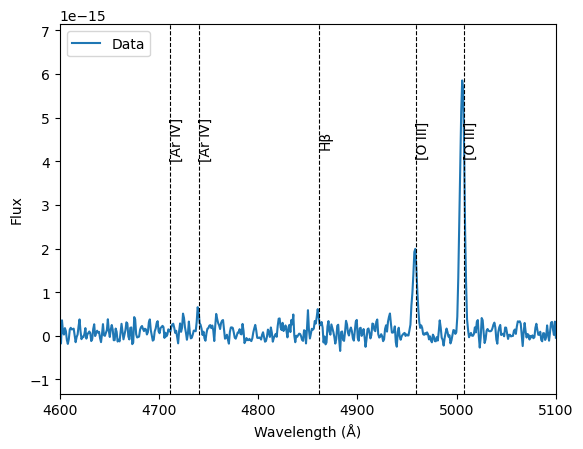

In [525]:
import numpy as np
import matplotlib.pyplot as plt

# Dosyayı yükleyin
data = np.loadtxt('/Users/nurullah/Desktop/true_PNe/dalgaboyudüzenlendi/alfa_girdi/png080.2+03.8.fits_fit')

# Birinci grafiği çizin
plt.plot(data[:, 0], data[:, 1], label='Data')

# İkinci grafiği çizin
#plt.plot(data[:, 0], data[:, 2], label='ALFA model')

# X ekseni sınırlarını belirleyin
plt.xlim(4600, 5100)

# Kesikli dikey çizgileri ve açıklamaları çizin
lines_labels = {
    4711: '[Ar IV]',
    4740: '[Ar IV]',
    4861: 'Hβ',
    4959: '[O III]',
    5007: '[O III]'
}

for wavelength, label in lines_labels.items():
    plt.axvline(x=wavelength, color='k', linestyle='--', linewidth=0.8)
    plt.text(wavelength, 4.5E-15, label, rotation=90, verticalalignment='center')

# Grafikleri gösterin
plt.xlabel('Wavelength (Å)')
plt.ylabel('Flux')
plt.legend(loc='upper left')
plt.show()

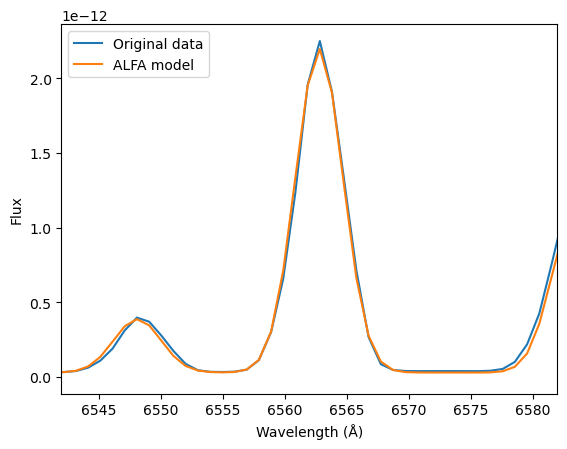

In [104]:
##### import numpy as np
import matplotlib.pyplot as plt

# Dosyayı yükleyin
data = np.loadtxt('/Users/nurullah/Desktop/true_PNe/dalgaboyudüzenlendi/alfa_girdi/png034.5-11.7.fits_fit')

# Birinci grafiği çizin
plt.plot(data[:, 0], data[:, 1], label='Original data')

# İkinci grafiği çizin
plt.plot(data[:, 0], data[:, 2], label='ALFA model')

# X ekseni sınırlarını belirleyin
plt.xlim(6542, 6582)
#plt.ylim(-0.5, 0.1)

# Kesikli dikey çizgileri ve açıklamaları çizin
#lines_labels = {
   # 6563: 'Hα ', 
   # 6678: 'He I', 
   # 7281: 'He I', 
   # 7006: '[Ar V]',
   # 7136: '[Ar III]', 
     
#}

#for wavelength, label in lines_labels.items():
    #plt.axvline(x=wavelength, color='k', linestyle='--', linewidth=0.8)
    #plt.text(wavelength, 1.2E-13, label, rotation=90, verticalalignment='center')

# Grafikleri gösterin
plt.xlabel('Wavelength (Å)')
plt.ylabel('Flux')
plt.legend(loc='upper left')
plt.show()

In [89]:



from astropy.io import fits
import pandas as pd
import os

# Dizin içindeki tüm FITS dosyalarını al
fits_directory = '/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/bilgiislem/neat_out/'
fits_file_paths = [os.path.join(fits_directory, file) for file in sorted(os.listdir(fits_directory)) if file.endswith('.fits')]

# Excel dosyalarının kaydedileceği dizin
output_directory = '/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/bilgiislem/deneme/neat_to_excel/'
os.makedirs(output_directory, exist_ok=True)

# Her 50 FITS dosyası için ayrı bir Excel dosyası oluştur
batch_size = 50

# Dosya isimlerini saklayacak bir sözlük oluştur
file_names_dict = {}

for i in range(0, len(fits_file_paths), batch_size):
    batch_fits_files = fits_file_paths[i:i + batch_size]

    # Excel dosyasının ismini belirle
    excel_file_name = f'batch_{i // batch_size + 1}.xlsx'
    excel_file_path = os.path.join(output_directory, excel_file_name)

    # Her FITS dosyası için döngü
    with pd.ExcelWriter(excel_file_path, engine='openpyxl') as writer:
        for fits_file_path in batch_fits_files:
            # Open the FITS file
            with fits.open(fits_file_path) as hdul:
                # Access the data and header of the LINES BinTableHDU (hdul[2])
                data = hdul[1].data

                # Convert the FITS data to a pandas DataFrame
                df = pd.DataFrame(data)

                # Sadece belirtilen sütunları seç
                selected_columns = ['WlenRest', 'Flux', 'Uncertainty', 'Ion', 'DereddenedFlux', 'DereddenedFluxLo', 'DereddenedFluxHi']
                df_selected = df[selected_columns]

                # Negatif ve sıfıra eşit olan değerlere sahip satırları filtrele ve sil
                df_selected = df_selected[df_selected['Flux'] > 0.01]

                # Sayfa adını dosya isminin ilk 31 karakteri olarak ayarla
                sheet_name = os.path.basename(fits_file_path)[:31]
                
                # Tam dosya ismini sözlüğe ekle
                file_names_dict[sheet_name] = os.path.basename(fits_file_path)

                # Verileri içeren DataFrame'i yeni bir sayfada kaydet
                df_selected.to_excel(writer, sheet_name=sheet_name, index=False)

    print(f"Data has been successfully exported to {excel_file_path}")

# Dosya isimlerini bir CSV dosyasına kaydedelim
file_names_dict_path = os.path.join(output_directory, 'file_names_dict.csv')
file_names_df = pd.DataFrame(list(file_names_dict.items()), columns=['SheetName', 'FullFileName'])
file_names_df.to_csv(file_names_dict_path, index=False)

Data has been successfully exported to /Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/bilgiislem/deneme/neat_to_excel/batch_1.xlsx
Data has been successfully exported to /Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/bilgiislem/deneme/neat_to_excel/batch_2.xlsx
Data has been successfully exported to /Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/bilgiislem/deneme/neat_to_excel/batch_3.xlsx
Data has been successfully exported to /Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/bilgiislem/deneme/neat_to_excel/batch_4.xlsx
Data has been successfully exported to /Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/bilgiislem/deneme/neat_to_excel/batch_5.xlsx
Data has been successfully exported to /Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/bilgiislem/deneme/neat_to_excel/batch_6.xlsx
Data has been successfully exported to /Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/bilgiislem/deneme/neat_to_excel/batch_7.xlsx
Data has been succes

In [90]:
import pandas as pd
import os

# Excel dosyalarının bulunduğu klasörün tam yolu
excel_folder_path = '/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/bilgiislem/deneme/neat_to_excel/'

# Tüm Excel dosyalarını al
excel_files = [os.path.join(excel_folder_path, file) for file in sorted(os.listdir(excel_folder_path)) if file.endswith('.xlsx')]

# Dosya isimleri sözlüğünü oku
file_names_dict_path = os.path.join(excel_folder_path, 'file_names_dict.csv')
file_names_df = pd.read_csv(file_names_dict_path)
file_names_dict = dict(zip(file_names_df['SheetName'], file_names_df['FullFileName']))

# Birleştirilecek verileri tutacak ana DataFrame'i oluştur
main_df = pd.DataFrame()

# Her Excel dosyası için döngü
for excel_file_path in excel_files:
    # Excel dosyasını oku
    df = pd.read_excel(excel_file_path, sheet_name=None)

    # Her sayfa için döngü
    for sheet_name, sheet_data in df.items():
        # 'WlenRest', 'Ion', 'Flux' sütunlarını içeren sayfaları seç
        if all(col in sheet_data.columns for col in ['WlenRest', 'Ion', 'Flux']):
            full_file_name = file_names_dict.get(sheet_name, sheet_name)
            # Eğer ana DataFrame boşsa, direkt ekle
            if main_df.empty:
                main_df = sheet_data[['WlenRest', 'Ion', 'Flux']].copy()
                main_df.rename(columns={'Flux': f'Flux_{full_file_name}'}, inplace=True)
            else:
                # Ana DataFrame'de 'WlenRest' ve 'Ion' sütunlarına göre birleştirme yap
                main_df = main_df.merge(sheet_data[['WlenRest', 'Ion', 'Flux']],
                                        on=['WlenRest', 'Ion'],
                                        how='outer',
                                        suffixes=('', f'_{full_file_name}'))

# NaN değerleri '-' ile değiştir
main_df.fillna('-', inplace=True)

# 'WlenRest' sütununa göre küçükten büyüğe sırala
main_df.sort_values('WlenRest', inplace=True)

# Excel dosyasına ekleyeceğimiz sayfa adı
new_sheet_name = 'Flux_Tablo'

# Yeni bir Excel dosyası oluştur
output_excel_file_path = '/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/bilgiislem/deneme/neat_to_excel/Fluxtablo.xlsx'
with pd.ExcelWriter(output_excel_file_path, engine='openpyxl') as writer:
    main_df.to_excel(writer, sheet_name=new_sheet_name, index=False)

print(f"Merged, sorted data has been successfully added to the sheet {new_sheet_name} in the Excel file.")

/var/folders/ry/6rcrw5vs4f33lx3wyt4f6m5w0000gn/T/ipykernel_22817/106679693.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '-' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  main_df.fillna('-', inplace=True)


Merged, sorted data has been successfully added to the sheet Flux_Tablo in the Excel file.


In [91]:
import pandas as pd
import os

# Excel dosyalarının bulunduğu klasörün tam yolu
excel_folder_path = '/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/bilgiislem/deneme/neat_to_excel/'

# Tüm Excel dosyalarını al
excel_files = [os.path.join(excel_folder_path, file) for file in sorted(os.listdir(excel_folder_path)) if file.endswith('.xlsx')]

# Dosya isimleri sözlüğünü oku
file_names_dict_path = os.path.join(excel_folder_path, 'file_names_dict.csv')
file_names_df = pd.read_csv(file_names_dict_path)
file_names_dict = dict(zip(file_names_df['SheetName'], file_names_df['FullFileName']))

# Birleştirilecek verileri tutacak ana DataFrame'i oluştur
main_df = pd.DataFrame()

# Her Excel dosyası için döngü
for excel_file_path in excel_files:
    # Excel dosyasını oku
    df = pd.read_excel(excel_file_path, sheet_name=None)

    # Her sayfa için döngü
    for sheet_name, sheet_data in df.items():
        # 'WlenRest', 'Ion', 'DereddenedFlux' sütunlarını içeren sayfaları seç
        if all(col in sheet_data.columns for col in ['WlenRest', 'Ion', 'DereddenedFlux']):
            full_file_name = file_names_dict.get(sheet_name, sheet_name)
            # Eğer ana DataFrame boşsa, direkt ekle
            if main_df.empty:
                main_df = sheet_data[['WlenRest', 'Ion', 'DereddenedFlux']].copy()
                main_df.rename(columns={'DereddenedFlux': f'DereddenedFlux_{full_file_name}'}, inplace=True)
            else:
                # Ana DataFrame'de 'WlenRest' ve 'Ion' sütunlarına göre birleştirme yap
                main_df = main_df.merge(sheet_data[['WlenRest', 'Ion', 'DereddenedFlux']],
                                        on=['WlenRest', 'Ion'],
                                        how='outer',
                                        suffixes=('', f'_{full_file_name}'))

# NaN değerleri '-' ile değiştir
main_df.fillna('-', inplace=True)

# 'WlenRest' sütununa göre küçükten büyüğe sırala
main_df.sort_values('WlenRest', inplace=True)

# Excel dosyasına ekleyeceğimiz sayfa adı
new_sheet_name = 'DereddenedFlux_Tablo'

# Yeni bir Excel dosyası oluştur
output_excel_file_path = '/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/bilgiislem/deneme/neat_to_excel/DereddebFluxtablo.xlsx'
with pd.ExcelWriter(output_excel_file_path, engine='openpyxl') as writer:
    main_df.to_excel(writer, sheet_name=new_sheet_name, index=False)

print(f"Merged, sorted data has been successfully added to the sheet {new_sheet_name} in the Excel file.")

/var/folders/ry/6rcrw5vs4f33lx3wyt4f6m5w0000gn/T/ipykernel_22817/2492720942.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '-' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  main_df.fillna('-', inplace=True)


Merged, sorted data has been successfully added to the sheet DereddenedFlux_Tablo in the Excel file.


In [109]:
import pandas as pd

# Merged Excel dosyasının tam yolu
merged_excel_path = '/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/bilgiislem/deneme/neat_to_excel/deneme/DereddenedErrorFlux_tablo.xlsx'

# Filtrelenecek WlenRest değerleri
#wlenrest_values = [
#    3726.030029, 3728.820068, 4089.290039, 4101.740234, 4340.470215, 4363.209961, 4471.5,
#    4649.129883, 4661.629883, 4711.370117, 4740.169922, 4958.910156, 5006.839844, 5191.819824,
#    5517.660156, 5537.600098, 5577.339844, 5754.600098, 5875.660156, 6300.339844, 6363.779785,
#    6548.100098, 6562.77002, 6583.5, 6678.160156, 6716.439941, 6730.819824, 7005.669922,
#    7135.799805, 7281.350098, 7751.060059
#]
wlenrest_values = [
    3726.03, 3728.82, 4089.29, 4101.74, 4340.47, 4363.20, 4471.50,
    4649.12, 4661.62, 4711.37, 4740.16, 4958.91, 5006.83, 5191.81,
    5517.66, 5537.60, 5577.33, 5754.60, 5875.66, 6300.33, 6363.77,
    6548.10, 6562.77, 6583.50, 6678.16, 6716.43, 6730.81, 7005.66,
    7135.79, 7281.35, 7751.06
]


# Merged Excel dosyasını oku
main_df = pd.read_excel(merged_excel_path, sheet_name='Dflux_Error')

# Sadece belirli WlenRest değerlerine sahip olan satırları seç
filtered_df = main_df[main_df['WlenRest'].isin(wlenrest_values)]

# Yeni bir Excel dosyası oluştur
filtered_excel_path = '/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/bilgiislem/Makale_DereddenedErrorFlux_Tablo.xlsx'
with pd.ExcelWriter(filtered_excel_path, engine='openpyxl') as writer:
    filtered_df.to_excel(writer, sheet_name='Filtered_DereddenedFlux_Tablo', index=False)

print(f"Filtered data has been successfully added to the new Excel file at {filtered_excel_path}.")

Filtered data has been successfully added to the new Excel file at /Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/bilgiislem/Makale_DereddenedErrorFlux_Tablo.xlsx.


In [105]:
from astropy.io import fits
import pandas as pd
import os

# Dizin içindeki tüm FITS dosyalarını al
fits_directory = '/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/bilgiislem/neat_out/'
fits_file_paths = [os.path.join(fits_directory, file) for file in sorted(os.listdir(fits_directory)) if file.endswith('.fits')]

# Excel dosyalarının kaydedileceği dizin
output_directory = '/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/bilgiislem/deneme/neat_to_excel/deneme/'
os.makedirs(output_directory, exist_ok=True)

# Her 50 FITS dosyası için ayrı bir Excel dosyası oluştur
batch_size = 50

# Dosya isimlerini saklayacak bir sözlük oluştur
file_names_dict = {}

for i in range(0, len(fits_file_paths), batch_size):
    batch_fits_files = fits_file_paths[i:i + batch_size]

    # Excel dosyasının ismini belirle
    excel_file_name = f'batch_{i // batch_size + 1}.xlsx'
    excel_file_path = os.path.join(output_directory, excel_file_name)

    # Her FITS dosyası için döngü
    with pd.ExcelWriter(excel_file_path, engine='openpyxl') as writer:
        for fits_file_path in batch_fits_files:
            # Open the FITS file
            with fits.open(fits_file_path) as hdul:
                # Access the data and header of the LINES BinTableHDU (hdul[2])
                data = hdul[1].data

                # Convert the FITS data to a pandas DataFrame
                df = pd.DataFrame(data)

                # Sadece belirtilen sütunları seç
                selected_columns = ['WlenRest', 'Flux', 'Uncertainty', 'Ion', 'DereddenedFlux', 'DereddenedFluxLo', 'DereddenedFluxHi']
                df_selected = df[selected_columns]

                # Negatif ve sıfıra eşit olan değerlere sahip satırları filtrele ve sil
                df_selected = df_selected[df_selected['Flux'] > 0.01]

                # Yeni sütunu ekle
                df_selected['AdjustedFlux'] = ((df_selected['DereddenedFluxLo'] - df_selected['DereddenedFlux']) + (df_selected['DereddenedFlux'] - df_selected['DereddenedFluxHi'])) / 2

                # Sadece gerekli sütunları seç
                final_columns = ['WlenRest', 'Flux', 'Uncertainty', 'Ion', 'DereddenedFlux', 'AdjustedFlux']
                df_final = df_selected[final_columns]

                # Sayfa adını dosya isminin ilk 31 karakteri olarak ayarla
                sheet_name = os.path.basename(fits_file_path)[:31]
                
                # Tam dosya ismini sözlüğe ekle
                file_names_dict[sheet_name] = os.path.basename(fits_file_path)

                # Verileri içeren DataFrame'i yeni bir sayfada kaydet
                df_final.to_excel(writer, sheet_name=sheet_name, index=False)

    print(f"Data has been successfully exported to {excel_file_path}")

# Dosya isimlerini bir CSV dosyasına kaydedelim
file_names_dict_path = os.path.join(output_directory, 'file_names_dict.csv')
file_names_df = pd.DataFrame(list(file_names_dict.items()), columns=['SheetName', 'FullFileName'])
file_names_df.to_csv(file_names_dict_path, index=False)

Data has been successfully exported to /Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/bilgiislem/deneme/neat_to_excel/deneme/batch_1.xlsx
Data has been successfully exported to /Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/bilgiislem/deneme/neat_to_excel/deneme/batch_2.xlsx
Data has been successfully exported to /Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/bilgiislem/deneme/neat_to_excel/deneme/batch_3.xlsx
Data has been successfully exported to /Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/bilgiislem/deneme/neat_to_excel/deneme/batch_4.xlsx
Data has been successfully exported to /Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/bilgiislem/deneme/neat_to_excel/deneme/batch_5.xlsx
Data has been successfully exported to /Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/bilgiislem/deneme/neat_to_excel/deneme/batch_6.xlsx
Data has been successfully exported to /Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/bilgiislem/deneme/neat_

In [106]:
import pandas as pd
import os

# Excel dosyalarının bulunduğu klasörün tam yolu
excel_folder_path = '/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/bilgiislem/deneme/neat_to_excel/deneme/'

# Tüm Excel dosyalarını al
excel_files = [os.path.join(excel_folder_path, file) for file in sorted(os.listdir(excel_folder_path)) if file.endswith('.xlsx')]

# Dosya isimleri sözlüğünü oku
file_names_dict_path = os.path.join(excel_folder_path, 'file_names_dict.csv')
file_names_df = pd.read_csv(file_names_dict_path)
file_names_dict = dict(zip(file_names_df['SheetName'], file_names_df['FullFileName']))

# Birleştirilecek verileri tutacak ana DataFrame'i oluştur
main_df = pd.DataFrame()

# Her Excel dosyası için döngü
for excel_file_path in excel_files:
    # Excel dosyasını oku
    df = pd.read_excel(excel_file_path, sheet_name=None)

    # Her sayfa için döngü
    for sheet_name, sheet_data in df.items():
        # 'WlenRest', 'Ion', 'DereddenedFlux', 'AdjustedFlux' sütunlarını içeren sayfaları seç
        if all(col in sheet_data.columns for col in ['WlenRest', 'Ion', 'DereddenedFlux', 'AdjustedFlux']):
            full_file_name = file_names_dict.get(sheet_name, sheet_name)
            # Eğer ana DataFrame boşsa, direkt ekle
            if main_df.empty:
                main_df = sheet_data[['WlenRest', 'Ion', 'DereddenedFlux', 'AdjustedFlux']].copy()
                main_df.rename(columns={
                    'DereddenedFlux': f'DereddenedFlux_{full_file_name}',
                    'AdjustedFlux': f'AdjustedFlux_{full_file_name}'
                }, inplace=True)
            else:
                # Ana DataFrame'de 'WlenRest' ve 'Ion' sütunlarına göre birleştirme yap
                main_df = main_df.merge(
                    sheet_data[['WlenRest', 'Ion', 'DereddenedFlux', 'AdjustedFlux']],
                    on=['WlenRest', 'Ion'],
                    how='outer',
                    suffixes=('', f'_{full_file_name}')
                )
                main_df.rename(columns={
                    'DereddenedFlux': f'DereddenedFlux_{full_file_name}',
                    'AdjustedFlux': f'AdjustedFlux_{full_file_name}'
                }, inplace=True)

# NaN değerleri '-' ile değiştir
main_df.fillna('-', inplace=True)

# 'WlenRest' sütununa göre küçükten büyüğe sırala
main_df.sort_values('WlenRest', inplace=True)

# Excel dosyasına ekleyeceğimiz sayfa adı
new_sheet_name = 'DereddenedAdjustedFlux_Tablo'

# Yeni bir Excel dosyası oluştur
output_excel_file_path = '/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/bilgiislem/deneme/neat_to_excel/deneme/DereddenedErrorFlux_tablo.xlsx'
with pd.ExcelWriter(output_excel_file_path, engine='openpyxl') as writer:
    main_df.to_excel(writer, sheet_name=new_sheet_name, index=False)

print(f"Merged, sorted data has been successfully added to the sheet {new_sheet_name} in the Excel file.")


/var/folders/ry/6rcrw5vs4f33lx3wyt4f6m5w0000gn/T/ipykernel_22817/1148634934.py:49: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '-' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  main_df.fillna('-', inplace=True)


Merged, sorted data has been successfully added to the sheet DereddenedAdjustedFlux_Tablo in the Excel file.


In [110]:
###########.  neat_hdul3_çıktısını her bir fits dosyası için sütun oluşturarak excel dosyasına kaydediyor. ########


import os
import pandas as pd
from astropy.io import fits

# Klasördeki tüm FITS dosyalarını al
fits_folder_path = '/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/bilgiislem/neat_out/'
fits_files = [file for file in os.listdir(fits_folder_path) if file.endswith('.fits')]

# Boş bir DataFrame oluştur
final_data = pd.DataFrame()

# Her bir FITS dosyasını işle
for fits_file in fits_files:
    fits_path = os.path.join(fits_folder_path, fits_file)

    with fits.open(fits_path) as hdul:
        # İlgili HDU'ya eriş
        results_hdu = hdul['RESULTS']
        
        # İlgilenilen sütunu seç (2. sütun, Python'da indeks 1'e denk gelir)
        selected_data = results_hdu.data.field(1)
        
        # Pandas Series'e dönüştür
        fits_data = pd.Series(selected_data, name=fits_file)
        
        # DataFrame'e ekle
        final_data = pd.concat([final_data, fits_data], axis=1)

# Verileri Excel dosyasına yaz
excel_output_path = '/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/bilgiislem/deneme/neat_to_excel/deneme/neat_results.xlsx'
final_data.to_excel(excel_output_path, index=False)

In [132]:
import os
import pandas as pd
from astropy.io import fits

# Klasördeki tüm FITS dosyalarını al
fits_folder_path = '/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/bilgiislem/neat_out/'
fits_files = [file for file in os.listdir(fits_folder_path) if file.endswith('.fits')]

# Boş bir DataFrame oluştur
final_data = pd.DataFrame()

# İlk FITS dosyasını açarak birinci sütunu ekleyelim
first_fits_path = os.path.join(fits_folder_path, fits_files[0])
with fits.open(first_fits_path) as hdul:
    results_hdu = hdul['RESULTS']
    first_column = results_hdu.data.field(0)  # Birinci sütunu al
    final_data['First_Column'] = first_column

# Her bir FITS dosyasını işle
for fits_file in fits_files:
    fits_path = os.path.join(fits_folder_path, fits_file)

    with fits.open(fits_path) as hdul:
        # İlgili HDU'ya eriş
        results_hdu = hdul['RESULTS']
        
        # İlgilenilen sütunları seç (2., 3. ve 4. sütunlar)
        second_column = results_hdu.data.field(1)
        third_column = results_hdu.data.field(2)
        fourth_column = results_hdu.data.field(3)
        
        # İkinci sütundaki verileri Pandas Series'e dönüştür
        fits_data_second = pd.Series(second_column, name=f'{fits_file}_second')
        
        # İşlem sonucunu Pandas Series'e dönüştür
        processed_column = ((third_column - second_column) + (second_column - fourth_column)) / 2
        fits_data_processed = pd.Series(processed_column, name=f'{fits_file}_processed')
        
        # DataFrame'e ekle
        final_data = pd.concat([final_data, fits_data_second, fits_data_processed], axis=1)

# Verileri Excel dosyasına yaz
excel_output_path = '/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/bilgiislem/deneme/neat_to_excel/deneme/hdul2_results.xlsx'
final_data.to_excel(excel_output_path, index=False)

print(f"Processed data has been successfully exported to {excel_output_path}")

Processed data has been successfully exported to /Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/bilgiislem/deneme/neat_to_excel/deneme/hdul2_results.xlsx


In [129]:
import os
import pandas as pd
import numpy as np
from astropy.io import fits

# FITS dosyalarının bulunduğu klasör yolu
fits_folder_path = '/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/bilgiislem/neat_out/'

# Dosya isimlerini al
fits_files = [file for file in os.listdir(fits_folder_path) if file.endswith('.fits')]

# Belirli satır indeksleri
row_indices = [4, 6, 9, 11, 13, 15, 20, 22, 35, 41, 45, 53, 62, 64, 66]

# Sonuçları saklamak için bir liste
results = []

# İlk dosya için birinci sütun değerlerini saklayacağız
first_column_values = []

# Diğer dosyalar için ikinci sütun değerlerini saklayacağız
second_column_data = []

# Her FITS dosyası için işlemi gerçekleştir
for idx, fits_file in enumerate(fits_files):
    fits_path = os.path.join(fits_folder_path, fits_file)
    
    # FITS dosyasını aç
    with fits.open(fits_path) as hdul:
        # Genellikle ilk HDU'daki tablo verilerini kullanıyoruz
        data = hdul['RESULTS'].data  # veya 'RESULTS' yerine uygun HDU indeksini kullanın
        
        # İlgili satırlardaki verileri al
        selected_rows = [data[i] for i in row_indices if i < len(data)]
        
        # Verileri işleme
        first_column = [row[0] for row in selected_rows]
        second_column = [row[1] for row in selected_rows]
        third_column = [row[2] for row in selected_rows]
        fourth_column = [row[3] for row in selected_rows]
        
        # Üçüncü sütun ve ikinci sütun arasındaki farkı hesapla
        processed_values = [((third_column[i] - second_column[i]) + (second_column[i] - fourth_column[i])) / 2
                            for i in range(len(second_column))]
        
        # İlk dosya için birinci sütun değerlerini sakla
        if idx == 0:
            first_column_values = first_column
        
        # Diğer dosyalar için ikinci sütun değerlerini sakla
        if idx > 0:
            second_column_data.append(pd.Series(second_column, name=fits_file + '_Second_Column'))
            processed_series = pd.Series(processed_values, name=fits_file + '_Processed_Value')
            results.append(pd.concat([pd.Series(first_column_values, name='First_Column'),
                                      pd.Series(second_column, name=fits_file + '_Second_Column'),
                                      processed_series], axis=1))

# Sonuçları birleştir
final_df = pd.concat(results, axis=1)

# Excel dosyasına yaz
excel_output_path = '/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/bilgiislem/deneme/neat_to_excel/deneme/TeNe.xlsx'
final_df.to_excel(excel_output_path, index=False)

In [18]:
import os
import pandas as pd
import numpy as np
from astropy.io import fits

# FITS dosyalarının bulunduğu klasör yolu
fits_folder_path = '/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/bilgiislem/neat_out/'

# Dosya isimlerini al
fits_files = [file for file in os.listdir(fits_folder_path) if file.endswith('.fits')]

# Belirli satır indeksleri
row_indices = [0, 4, 6, 9, 11, 13, 15, 20, 22, 35, 41, 45, 53, 62, 64, 66]

# Sonuçları saklamak için bir liste
results = []

# İlk dosya için birinci sütun değerlerini saklayacağız
first_column_values = []

# Diğer dosyalar için ikinci sütun değerlerini saklayacağız
second_column_data = []

# Her FITS dosyası için işlemi gerçekleştir
for idx, fits_file in enumerate(fits_files):
    fits_path = os.path.join(fits_folder_path, fits_file)
    
    # FITS dosyasını aç
    with fits.open(fits_path) as hdul:
        # Genellikle ilk HDU'daki tablo verilerini kullanıyoruz
        data = hdul['RESULTS'].data  # veya 'RESULTS' yerine uygun HDU indeksini kullanın
        
        # İlgili satırlardaki verileri al
        selected_rows = [data[i] for i in row_indices if i < len(data)]
        
        # Verileri işleme
        first_column = [row[0] for row in selected_rows]
        second_column = [row[1] for row in selected_rows]
        third_column = [row[2] for row in selected_rows]
        fourth_column = [row[3] for row in selected_rows]
        
        # Üçüncü sütun ve ikinci sütun arasındaki farkı hesapla
        processed_values = [((third_column[i] - second_column[i]) + (second_column[i] - fourth_column[i])) / 2
                            for i in range(len(second_column))]
        
        # İlk dosya için birinci sütun değerlerini sakla

        
        # Diğer dosyalar için ikinci sütun değerlerini sakla
        if idx > 0:
            results.append(pd.DataFrame({
               
                fits_file + '_Second_Column': second_column,
                fits_file + '_Processed_Value': processed_values
            }))

# Tüm sonuçları birleştir
final_df = pd.concat(results, axis=1)

# Excel dosyasına yaz
excel_output_path = '/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/bilgiislem/deneme/neat_to_excel/deneme/Devrik_TeNe.xlsx'
final_df.to_excel(excel_output_path, index=False)


In [513]:
from astropy.io import fits

# Specify the path to your FITS file
fits_file_path = '/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/bilgiislem/neat_out/AAOmega_bulge_PNG355.04-03.70_BLUEx_2dF270307_id1190.fits_lines.fits'

# Open the FITS file
with fits.open(fits_file_path) as hdul:
    # You can access the data in the FITS file
    # For example, printing the information about the FITS file:
    hdul.info()
    
    # You can access different HDU (Header Data Unit) in the FITS file
    # For example, to access the primary HDU (usually the first one):
    primary_hdu = hdul[1]

    # You can access the data and header of the primary HDU
    data = primary_hdu.data
    header = primary_hdu.header

    # You can also print the header and data to see the details
    print("Header:")
    print(repr(header))
    print("Data:")
    print(data)

Filename: /Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/bilgiislem/neat_out/AAOmega_bulge_PNG355.04-03.70_BLUEx_2dF270307_id1190.fits_lines.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       9   ()      
  1  LINES         1 BinTableHDU     51   41R x 18C   [1E, 1E, 1E, 1E, 1E, 1E, 16A, 16A, 16A, 16A, 1I, 1I, 1E, 1E, 1E, 1E, 1E, 1E]   
  2  RESULTS       1 BinTableHDU     22   166R x 4C   [40A, 1E, 1E, 1E]   
  3  QC            1 BinTableHDU     13   1R x 2C   [1L, 1L]   
Header:
XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                  116 / width of table in bytes                        
NAXIS2  =                   41 / number of rows in table                        
PCOUNT  =                    0 / size of speci

In [20]:
import os
from astropy.io import fits

# FITS dosyalarının bulunduğu klasör yolu
fits_folder_path = '/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/bilgiislem/neat_out/'

# Dosya isimlerini al
fits_files = [file for file in os.listdir(fits_folder_path) if file.endswith('.fits')]

# Belirli satır indeksleri
row_indices = [0, 4, 6, 9, 11, 13, 15, 20, 22, 35, 41, 45, 53, 62, 64, 66]

# Her FITS dosyası için belirli satırlardaki değerleri al
for fits_file in fits_files:
    file_path = os.path.join(fits_folder_path, fits_file)
    
    # FITS dosyasını aç
    with fits.open(file_path) as hdul:
        # Verilerin bulunduğu tabloyu al (genellikle 'PRIMARY' veya 'TABLE')
        data = hdul[2].data
        
        # Belirli satırlardaki değerleri al
        selected_rows = data[row_indices]
        
        print(f"FITS dosyası: {fits_file}")
        for idx, row in enumerate(selected_rows):
            print(f"Satır {row_indices[idx]}: {row}")
        print("\n")


FITS dosyası: StenholmAcker_pn_g060_5-00_3_id499.fits_lines.fits
Satır 0: ('c(Hb) (Ha/Hb)', 3.491, 3.758, 3.216)
Satır 4: ('[OII] density', 21.3, 41.6, -486.8)
Satır 6: ('[SII] density', 0.0, 0.0, 0.0)
Satır 9: ('[OII] temperature', 0.0, 0.0, 0.0)
Satır 11: ('[SII] temperature', 0.0, 0.0, 0.0)
Satır 13: ('[NII] temperature', 35000.0, 36500.0, 34900.0)
Satır 15: ('[OI] temperature', 0.0, 0.0, 0.0)
Satır 20: ('[ClIII] density', 100000.0, 101000.0, 99000.0)
Satır 22: ('[ArIV] density', 0.0, 0.0, 0.0)
Satır 35: ('[OIII] temperature', 0.0, 0.0, 0.0)
Satır 41: ('[NeIII] temperature', 0.0, 0.0, 0.0)
Satır 45: ('[ArIII] temperature', 0.0, 0.0, 0.0)
Satır 53: ('[ArV] temperature', 0.0, 0.0, 0.0)
Satır 62: ('He I temperature (5876/4471)', 0.0, 0.0, 0.0)
Satır 64: ('He I temperature (6678/4471)', 0.0, 0.0, 0.0)
Satır 66: ('He I temperature (7281/6678)', 0.0, 0.0, 0.0)


FITS dosyası: IPHASGTC_Alves1_GT210816_id10960.fits_lines.fits
Satır 0: ('c(Hb) (Ha/Hb)', 0.0, 0.0, 0.0)
Satır 4: ('[OII] densit

FITS dosyası: StenholmAcker_pn_g205_1+14_2_id739.fits_lines.fits
Satır 0: ('c(Hb) (Ha/Hb)', 0.0, 0.0, 0.0)
Satır 4: ('[OII] density', 0.0, 0.0, 0.0)
Satır 6: ('[SII] density', 0.0, 0.0, 0.0)
Satır 9: ('[OII] temperature', 0.0, 0.0, 0.0)
Satır 11: ('[SII] temperature', 0.0, 0.0, 0.0)
Satır 13: ('[NII] temperature', 35000.0, 35100.0, 34900.0)
Satır 15: ('[OI] temperature', 0.0, 0.0, 0.0)
Satır 20: ('[ClIII] density', 0.0, 0.0, 0.0)
Satır 22: ('[ArIV] density', 0.0, 0.0, 0.0)
Satır 35: ('[OIII] temperature', 0.0, 0.0, 0.0)
Satır 41: ('[NeIII] temperature', 0.0, 0.0, 0.0)
Satır 45: ('[ArIII] temperature', 0.0, 0.0, 0.0)
Satır 53: ('[ArV] temperature', 0.0, 0.0, 0.0)
Satır 62: ('He I temperature (5876/4471)', 0.0, 0.0, 0.0)
Satır 64: ('He I temperature (6678/4471)', 0.0, 0.0, 0.0)
Satır 66: ('He I temperature (7281/6678)', 0.0, 0.0, 0.0)


FITS dosyası: StenholmAcker_pn_g358_9-00_7_id1294.fits_lines.fits
Satır 0: ('c(Hb) (Ha/Hb)', 1.486, 1.593, 1.37)
Satır 4: ('[OII] density', 0.0, 0.0, 0.0

FITS dosyası: StenholmAcker_pn_g025_4-04_7_id324.fits_lines.fits
Satır 0: ('c(Hb) (Ha/Hb)', 0.041, 0.082, -0.088)
Satır 4: ('[OII] density', 0.0, 0.0, 0.0)
Satır 6: ('[SII] density', 0.0, 0.0, 0.0)
Satır 9: ('[OII] temperature', 0.0, 0.0, 0.0)
Satır 11: ('[SII] temperature', 0.0, 0.0, 0.0)
Satır 13: ('[NII] temperature', 0.0, 0.0, 0.0)
Satır 15: ('[OI] temperature', 0.0, 0.0, 0.0)
Satır 20: ('[ClIII] density', 0.0, 0.0, 0.0)
Satır 22: ('[ArIV] density', 0.0, 0.0, 0.0)
Satır 35: ('[OIII] temperature', 0.0, 0.0, 0.0)
Satır 41: ('[NeIII] temperature', 0.0, 0.0, 0.0)
Satır 45: ('[ArIII] temperature', 0.0, 0.0, 0.0)
Satır 53: ('[ArV] temperature', 0.0, 0.0, 0.0)
Satır 62: ('He I temperature (5876/4471)', 0.0, 0.0, 0.0)
Satır 64: ('He I temperature (6678/4471)', 0.0, 0.0, 0.0)
Satır 66: ('He I temperature (7281/6678)', 0.0, 0.0, 0.0)


FITS dosyası: SAAO201403_CTSS1_SA070314_id414.fits_lines.fits
Satır 0: ('c(Hb) (Ha/Hb)', 1.538, 1.636, 1.433)
Satır 4: ('[OII] density', 1.0, 1.0, 1.0)
Satır 

FITS dosyası: SAAO201808_Kn42_SA130818_id10887.fits_lines.fits
Satır 0: ('c(Hb) (Ha/Hb)', 1.087, 1.226, 0.927)
Satır 4: ('[OII] density', 0.0, 0.0, 0.0)
Satır 6: ('[SII] density', 0.0, 0.0, 0.0)
Satır 9: ('[OII] temperature', 0.0, 0.0, 0.0)
Satır 11: ('[SII] temperature', 0.0, 0.0, 0.0)
Satır 13: ('[NII] temperature', 0.0, 0.0, 0.0)
Satır 15: ('[OI] temperature', 0.0, 0.0, 0.0)
Satır 20: ('[ClIII] density', 0.0, 0.0, 0.0)
Satır 22: ('[ArIV] density', 0.0, 0.0, 0.0)
Satır 35: ('[OIII] temperature', 16300.0, 17700.0, 14900.0)
Satır 41: ('[NeIII] temperature', 0.0, 0.0, 0.0)
Satır 45: ('[ArIII] temperature', 0.0, 0.0, 0.0)
Satır 53: ('[ArV] temperature', 0.0, 0.0, 0.0)
Satır 62: ('He I temperature (5876/4471)', 0.0, 0.0, 0.0)
Satır 64: ('He I temperature (6678/4471)', 0.0, 0.0, 0.0)
Satır 66: ('He I temperature (7281/6678)', 0.0, 0.0, 0.0)


FITS dosyası: StenholmAcker_pn_g035_7-05_0_id381.fits_lines.fits
Satır 0: ('c(Hb) (Ha/Hb)', 1.221, 1.379, 1.06)
Satır 4: ('[OII] density', 0.0, 0.0, 

FITS dosyası: AAOmega_bulge_K5-13_BLUEx_2dF300508_id4326.fits_lines.fits
Satır 0: ('c(Hb) (Ha/Hb)', 0.0, 0.0, 0.0)
Satır 4: ('[OII] density', 0.0, 0.0, 0.0)
Satır 6: ('[SII] density', 0.0, 0.0, 0.0)
Satır 9: ('[OII] temperature', 0.0, 0.0, 0.0)
Satır 11: ('[SII] temperature', 0.0, 0.0, 0.0)
Satır 13: ('[NII] temperature', 0.0, 0.0, 0.0)
Satır 15: ('[OI] temperature', 0.0, 0.0, 0.0)
Satır 20: ('[ClIII] density', 0.0, 0.0, 0.0)
Satır 22: ('[ArIV] density', 0.0, 0.0, 0.0)
Satır 35: ('[OIII] temperature', 0.0, 0.0, 0.0)
Satır 41: ('[NeIII] temperature', 0.0, 0.0, 0.0)
Satır 45: ('[ArIII] temperature', 0.0, 0.0, 0.0)
Satır 53: ('[ArV] temperature', 0.0, 0.0, 0.0)
Satır 62: ('He I temperature (5876/4471)', 0.0, 0.0, 0.0)
Satır 64: ('He I temperature (6678/4471)', 0.0, 0.0, 0.0)
Satır 66: ('He I temperature (7281/6678)', 0.0, 0.0, 0.0)


FITS dosyası: StenholmAcker_pn_g226_7+05_6_id769.fits_lines.fits
Satır 0: ('c(Hb) (Ha/Hb)', 0.831, 1.001, 0.674)
Satır 4: ('[OII] density', 0.0, 0.0, 0.0)
Sa

FITS dosyası: MASHI_PHR0650+0013_SA130204_id2508.fits_lines.fits
Satır 0: ('c(Hb) (Ha/Hb)', 1.851, 1.993, 1.718)
Satır 4: ('[OII] density', 0.0, 0.0, 0.0)
Satır 6: ('[SII] density', 209.0, 402.0, -15.0)
Satır 9: ('[OII] temperature', 0.0, 0.0, 0.0)
Satır 11: ('[SII] temperature', 0.0, 0.0, 0.0)
Satır 13: ('[NII] temperature', 15500.0, 16200.0, 14700.0)
Satır 15: ('[OI] temperature', 0.0, 0.0, 0.0)
Satır 20: ('[ClIII] density', 0.0, 0.0, 0.0)
Satır 22: ('[ArIV] density', 0.0, 0.0, 0.0)
Satır 35: ('[OIII] temperature', 0.0, 0.0, 0.0)
Satır 41: ('[NeIII] temperature', 0.0, 0.0, 0.0)
Satır 45: ('[ArIII] temperature', 0.0, 0.0, 0.0)
Satır 53: ('[ArV] temperature', 0.0, 0.0, 0.0)
Satır 62: ('He I temperature (5876/4471)', 0.0, 0.0, 0.0)
Satır 64: ('He I temperature (6678/4471)', 0.0, 0.0, 0.0)
Satır 66: ('He I temperature (7281/6678)', 0.0, 0.0, 0.0)


FITS dosyası: StenholmAcker_pn_g042_9-06_9_id409.fits_lines.fits
Satır 0: ('c(Hb) (Ha/Hb)', 0.574, 0.803, 0.344)
Satır 4: ('[OII] density', 0

FITS dosyası: MASHI_PHR1502-6315_SA170501_id2848.fits_lines.fits
Satır 0: ('c(Hb) (Ha/Hb)', 0.978, 1.21, 0.715)
Satır 4: ('[OII] density', 0.0, 0.0, 0.0)
Satır 6: ('[SII] density', 0.0, 0.0, 0.0)
Satır 9: ('[OII] temperature', 0.0, 0.0, 0.0)
Satır 11: ('[SII] temperature', 0.0, 0.0, 0.0)
Satır 13: ('[NII] temperature', 0.0, 0.0, 0.0)
Satır 15: ('[OI] temperature', 0.0, 0.0, 0.0)
Satır 20: ('[ClIII] density', 0.0, 0.0, 0.0)
Satır 22: ('[ArIV] density', 0.0, 0.0, 0.0)
Satır 35: ('[OIII] temperature', 0.0, 0.0, 0.0)
Satır 41: ('[NeIII] temperature', 0.0, 0.0, 0.0)
Satır 45: ('[ArIII] temperature', 0.0, 0.0, 0.0)
Satır 53: ('[ArV] temperature', 0.0, 0.0, 0.0)
Satır 62: ('He I temperature (5876/4471)', 0.0, 0.0, 0.0)
Satır 64: ('He I temperature (6678/4471)', 0.0, 0.0, 0.0)
Satır 66: ('He I temperature (7281/6678)', 0.0, 0.0, 0.0)


FITS dosyası: StenholmAcker_pn_g016_1-04_7_id272.fits_lines.fits
Satır 0: ('c(Hb) (Ha/Hb)', 0.812, 0.91, 0.719)
Satır 4: ('[OII] density', 0.0, 0.0, 0.0)
Satır 

FITS dosyası: SAAO2014_K5-22_SA130914_id4146.fits_lines.fits
Satır 0: ('c(Hb) (Ha/Hb)', 1.02, 1.055, 0.985)
Satır 4: ('[OII] density', 0.0, 0.0, 0.0)
Satır 6: ('[SII] density', 0.0, 0.0, 0.0)
Satır 9: ('[OII] temperature', 0.0, 0.0, 0.0)
Satır 11: ('[SII] temperature', 0.0, 0.0, 0.0)
Satır 13: ('[NII] temperature', 0.0, 0.0, 0.0)
Satır 15: ('[OI] temperature', 0.0, 0.0, 0.0)
Satır 20: ('[ClIII] density', 0.0, 0.0, 0.0)
Satır 22: ('[ArIV] density', 0.0, 0.0, 0.0)
Satır 35: ('[OIII] temperature', 0.0, 0.0, 0.0)
Satır 41: ('[NeIII] temperature', 0.0, 0.0, 0.0)
Satır 45: ('[ArIII] temperature', 0.0, 0.0, 0.0)
Satır 53: ('[ArV] temperature', 0.0, 0.0, 0.0)
Satır 62: ('He I temperature (5876/4471)', 0.0, 0.0, 0.0)
Satır 64: ('He I temperature (6678/4471)', 0.0, 0.0, 0.0)
Satır 66: ('He I temperature (7281/6678)', 0.0, 0.0, 0.0)


FITS dosyası: DSHWIYN_DSH_Pa8_WY070610_id4365.fits_lines.fits
Satır 0: ('c(Hb) (Ha/Hb)', 1.675, 1.825, 1.51)
Satır 4: ('[OII] density', 0.0, 0.0, 0.0)
Satır 6: ('[S

FITS dosyası: StenholmAcker_pn_g356_5-03_6_id1219.fits_lines.fits
Satır 0: ('c(Hb) (Ha/Hb)', 2.456, 2.639, 2.258)
Satır 4: ('[OII] density', 0.0, 0.0, 0.0)
Satır 6: ('[SII] density', 18300.0, 30000.0, -63400.0)
Satır 9: ('[OII] temperature', 0.0, 0.0, 0.0)
Satır 11: ('[SII] temperature', 0.0, 0.0, 0.0)
Satır 13: ('[NII] temperature', 0.0, 0.0, 0.0)
Satır 15: ('[OI] temperature', 0.0, 0.0, 0.0)
Satır 20: ('[ClIII] density', 0.0, 0.0, 0.0)
Satır 22: ('[ArIV] density', 0.0, 0.0, 0.0)
Satır 35: ('[OIII] temperature', 0.0, 0.0, 0.0)
Satır 41: ('[NeIII] temperature', 0.0, 0.0, 0.0)
Satır 45: ('[ArIII] temperature', 0.0, 0.0, 0.0)
Satır 53: ('[ArV] temperature', 0.0, 0.0, 0.0)
Satır 62: ('He I temperature (5876/4471)', 0.0, 0.0, 0.0)
Satır 64: ('He I temperature (6678/4471)', 0.0, 0.0, 0.0)
Satır 66: ('He I temperature (7281/6678)', 0.0, 0.0, 0.0)


FITS dosyası: StenholmAcker_pn_g018_6-02_2_id284.fits_lines.fits
Satır 0: ('c(Hb) (Ha/Hb)', 2.219, 2.394, 2.029)
Satır 4: ('[OII] density', 0.0, 

FITS dosyası: MASHI_PHR1205-5746_SA200600_id2721.fits_lines.fits
Satır 0: ('c(Hb) (Ha/Hb)', 1.558, 1.672, 1.435)
Satır 4: ('[OII] density', 0.0, 0.0, 0.0)
Satır 6: ('[SII] density', 1.0, 1.0, -349.5563)
Satır 9: ('[OII] temperature', 0.0, 0.0, 0.0)
Satır 11: ('[SII] temperature', 0.0, 0.0, 0.0)
Satır 13: ('[NII] temperature', 35000.0, 35100.0, 34900.0)
Satır 15: ('[OI] temperature', 0.0, 0.0, 0.0)
Satır 20: ('[ClIII] density', 0.0, 0.0, 0.0)
Satır 22: ('[ArIV] density', 0.0, 0.0, 0.0)
Satır 35: ('[OIII] temperature', 0.0, 0.0, 0.0)
Satır 41: ('[NeIII] temperature', 0.0, 0.0, 0.0)
Satır 45: ('[ArIII] temperature', 0.0, 0.0, 0.0)
Satır 53: ('[ArV] temperature', 0.0, 0.0, 0.0)
Satır 62: ('He I temperature (5876/4471)', 0.0, 0.0, 0.0)
Satır 64: ('He I temperature (6678/4471)', 0.0, 0.0, 0.0)
Satır 66: ('He I temperature (7281/6678)', 0.0, 0.0, 0.0)


FITS dosyası: StenholmAcker_pn_g004_2-04_3_id141.fits_lines.fits
Satır 0: ('c(Hb) (Ha/Hb)', 0.529, 0.635, 0.424)
Satır 4: ('[OII] density', 0

FITS dosyası: AAOmega_bulge_JaSt34_BLUE_2dF300508_id4189.fits_lines.fits
Satır 0: ('c(Hb) (Ha/Hb)', 0.0, 0.0, 0.0)
Satır 4: ('[OII] density', 0.0, 0.0, 0.0)
Satır 6: ('[SII] density', 0.0, 0.0, 0.0)
Satır 9: ('[OII] temperature', 0.0, 0.0, 0.0)
Satır 11: ('[SII] temperature', 0.0, 0.0, 0.0)
Satır 13: ('[NII] temperature', 0.0, 0.0, 0.0)
Satır 15: ('[OI] temperature', 0.0, 0.0, 0.0)
Satır 20: ('[ClIII] density', 0.0, 0.0, 0.0)
Satır 22: ('[ArIV] density', 0.0, 0.0, 0.0)
Satır 35: ('[OIII] temperature', 0.0, 0.0, 0.0)
Satır 41: ('[NeIII] temperature', 0.0, 0.0, 0.0)
Satır 45: ('[ArIII] temperature', 0.0, 0.0, 0.0)
Satır 53: ('[ArV] temperature', 0.0, 0.0, 0.0)
Satır 62: ('He I temperature (5876/4471)', 0.0, 0.0, 0.0)
Satır 64: ('He I temperature (6678/4471)', 0.0, 0.0, 0.0)
Satır 66: ('He I temperature (7281/6678)', 0.0, 0.0, 0.0)


FITS dosyası: DSHWIYN_DSH_Te8_WY070610_id4360.fits_lines.fits
Satır 0: ('c(Hb) (Ha/Hb)', 0.692, 0.836, 0.551)
Satır 4: ('[OII] density', 0.0, 0.0, 0.0)
Satır

FITS dosyası: AAOmega_bulge_JaSt9_BLUE_2dF300508_id1299.fits_lines.fits
Satır 0: ('c(Hb) (Ha/Hb)', 0.0, 0.0, 0.0)
Satır 4: ('[OII] density', 0.0, 0.0, 0.0)
Satır 6: ('[SII] density', 0.0, 0.0, 0.0)
Satır 9: ('[OII] temperature', 0.0, 0.0, 0.0)
Satır 11: ('[SII] temperature', 0.0, 0.0, 0.0)
Satır 13: ('[NII] temperature', 0.0, 0.0, 0.0)
Satır 15: ('[OI] temperature', 0.0, 0.0, 0.0)
Satır 20: ('[ClIII] density', 0.0, 0.0, 0.0)
Satır 22: ('[ArIV] density', 0.0, 0.0, 0.0)
Satır 35: ('[OIII] temperature', 0.0, 0.0, 0.0)
Satır 41: ('[NeIII] temperature', 0.0, 0.0, 0.0)
Satır 45: ('[ArIII] temperature', 0.0, 0.0, 0.0)
Satır 53: ('[ArV] temperature', 0.0, 0.0, 0.0)
Satır 62: ('He I temperature (5876/4471)', 0.0, 0.0, 0.0)
Satır 64: ('He I temperature (6678/4471)', 0.0, 0.0, 0.0)
Satır 66: ('He I temperature (7281/6678)', 0.0, 0.0, 0.0)


FITS dosyası: Kwitter_NGC6309_KP010799_id221.fits_lines.fits
Satır 0: ('c(Hb) (Ha/Hb)', 0.734, 0.813, 0.645)
Satır 4: ('[OII] density', 0.0, 0.0, 0.0)
Satır 6

FITS dosyası: StenholmAcker_pn_g033_8-02_6_id372.fits_lines.fits
Satır 0: ('c(Hb) (Ha/Hb)', 1.17, 1.315, 1.028)
Satır 4: ('[OII] density', 0.0, 0.0, 0.0)
Satır 6: ('[SII] density', 4410.0, 5760.0, 2070.0)
Satır 9: ('[OII] temperature', 0.0, 0.0, 0.0)
Satır 11: ('[SII] temperature', 0.0, 0.0, 0.0)
Satır 13: ('[NII] temperature', 8990.0, 9340.0, 8640.0)
Satır 15: ('[OI] temperature', 0.0, 0.0, 0.0)
Satır 20: ('[ClIII] density', 7270.0, 9030.0, 4950.0)
Satır 22: ('[ArIV] density', 0.0, 0.0, 0.0)
Satır 35: ('[OIII] temperature', 9450.0, 9600.0, 9300.0)
Satır 41: ('[NeIII] temperature', 0.0, 0.0, 0.0)
Satır 45: ('[ArIII] temperature', 0.0, 0.0, 0.0)
Satır 53: ('[ArV] temperature', 0.0, 0.0, 0.0)
Satır 62: ('He I temperature (5876/4471)', 0.0, 0.0, 0.0)
Satır 64: ('He I temperature (6678/4471)', 0.0, 0.0, 0.0)
Satır 66: ('He I temperature (7281/6678)', 65700.0, 89600.0, 11100.0)


FITS dosyası: FRA_StDr167_2S190423_id33637.fits_lines.fits
Satır 0: ('c(Hb) (Ha/Hb)', 0.165, 0.33, -0.032)
Satır

FITS dosyası: StenholmAcker_pn_g040_4-03_1_id402.fits_lines.fits
Satır 0: ('c(Hb) (Ha/Hb)', 1.869, 2.009, 1.718)
Satır 4: ('[OII] density', 0.0, 0.0, 0.0)
Satır 6: ('[SII] density', 0.0, 0.0, 0.0)
Satır 9: ('[OII] temperature', 0.0, 0.0, 0.0)
Satır 11: ('[SII] temperature', 0.0, 0.0, 0.0)
Satır 13: ('[NII] temperature', 0.0, 0.0, 0.0)
Satır 15: ('[OI] temperature', 0.0, 0.0, 0.0)
Satır 20: ('[ClIII] density', 0.0, 0.0, 0.0)
Satır 22: ('[ArIV] density', 0.0, 0.0, 0.0)
Satır 35: ('[OIII] temperature', 7540.0, 7720.0, 7360.0)
Satır 41: ('[NeIII] temperature', 0.0, 0.0, 0.0)
Satır 45: ('[ArIII] temperature', 0.0, 0.0, 0.0)
Satır 53: ('[ArV] temperature', 0.0, 0.0, 0.0)
Satır 62: ('He I temperature (5876/4471)', 0.0, 0.0, 0.0)
Satır 64: ('He I temperature (6678/4471)', 0.0, 0.0, 0.0)
Satır 66: ('He I temperature (7281/6678)', 73600.0, 105800.0, 16300.0)


FITS dosyası: StenholmAcker_pn_g017_7-02_9_id281.fits_lines.fits
Satır 0: ('c(Hb) (Ha/Hb)', 1.174, 1.377, 0.981)
Satır 4: ('[OII] density

FITS dosyası: MASHI_PHR1314-5806_SA150501_id2775.fits_lines.fits
Satır 0: ('c(Hb) (Ha/Hb)', 1.206, 1.447, 0.918)
Satır 4: ('[OII] density', 0.0, 0.0, 0.0)
Satır 6: ('[SII] density', 0.0, 0.0, 0.0)
Satır 9: ('[OII] temperature', 0.0, 0.0, 0.0)
Satır 11: ('[SII] temperature', 0.0, 0.0, 0.0)
Satır 13: ('[NII] temperature', 0.0, 0.0, 0.0)
Satır 15: ('[OI] temperature', 0.0, 0.0, 0.0)
Satır 20: ('[ClIII] density', 0.0, 0.0, 0.0)
Satır 22: ('[ArIV] density', 0.0, 0.0, 0.0)
Satır 35: ('[OIII] temperature', 0.0, 0.0, 0.0)
Satır 41: ('[NeIII] temperature', 0.0, 0.0, 0.0)
Satır 45: ('[ArIII] temperature', 0.0, 0.0, 0.0)
Satır 53: ('[ArV] temperature', 0.0, 0.0, 0.0)
Satır 62: ('He I temperature (5876/4471)', 0.0, 0.0, 0.0)
Satır 64: ('He I temperature (6678/4471)', 0.0, 0.0, 0.0)
Satır 66: ('He I temperature (7281/6678)', 0.0, 0.0, 0.0)


FITS dosyası: MASHI_PHR1107-5857_SA160199_id2683.fits_lines.fits
Satır 0: ('c(Hb) (Ha/Hb)', 1.122, 1.249, 0.997)
Satır 4: ('[OII] density', 0.0, 0.0, 0.0)
Satı

FITS dosyası: StenholmAcker_pn_g358_0+09_3_id1258.fits_lines.fits
Satır 0: ('c(Hb) (Ha/Hb)', 0.573, 0.682, 0.465)
Satır 4: ('[OII] density', 0.0, 0.0, 0.0)
Satır 6: ('[SII] density', 0.0, 0.0, 0.0)
Satır 9: ('[OII] temperature', 0.0, 0.0, 0.0)
Satır 11: ('[SII] temperature', 0.0, 0.0, 0.0)
Satır 13: ('[NII] temperature', 0.0, 0.0, 0.0)
Satır 15: ('[OI] temperature', 0.0, 0.0, 0.0)
Satır 20: ('[ClIII] density', 0.0, 0.0, 0.0)
Satır 22: ('[ArIV] density', 0.0, 0.0, 0.0)
Satır 35: ('[OIII] temperature', 0.0, 0.0, 0.0)
Satır 41: ('[NeIII] temperature', 0.0, 0.0, 0.0)
Satır 45: ('[ArIII] temperature', 0.0, 0.0, 0.0)
Satır 53: ('[ArV] temperature', 0.0, 0.0, 0.0)
Satır 62: ('He I temperature (5876/4471)', 0.0, 0.0, 0.0)
Satır 64: ('He I temperature (6678/4471)', 0.0, 0.0, 0.0)
Satır 66: ('He I temperature (7281/6678)', 0.0, 0.0, 0.0)


FITS dosyası: StenholmAcker_pn_g286_0-06_5_id883.fits_lines.fits
Satır 0: ('c(Hb) (Ha/Hb)', 0.59, 0.699, 0.483)
Satır 4: ('[OII] density', 0.0, 0.0, 0.0)
Satı

FITS dosyası: StenholmAcker_pn_g269_7-03_6_id837.fits_lines.fits
Satır 0: ('c(Hb) (Ha/Hb)', 1.669, 1.788, 1.558)
Satır 4: ('[OII] density', 0.0, 0.0, 0.0)
Satır 6: ('[SII] density', 3540.0, 4680.0, 1450.0)
Satır 9: ('[OII] temperature', 0.0, 0.0, 0.0)
Satır 11: ('[SII] temperature', 0.0, 0.0, 0.0)
Satır 13: ('[NII] temperature', 8480.0, 8770.0, 8190.0)
Satır 15: ('[OI] temperature', 0.0, 0.0, 0.0)
Satır 20: ('[ClIII] density', 0.0, 0.0, 0.0)
Satır 22: ('[ArIV] density', 0.0, 0.0, 0.0)
Satır 35: ('[OIII] temperature', 8640.0, 8980.0, 8300.0)
Satır 41: ('[NeIII] temperature', 0.0, 0.0, 0.0)
Satır 45: ('[ArIII] temperature', 0.0, 0.0, 0.0)
Satır 53: ('[ArV] temperature', 0.0, 0.0, 0.0)
Satır 62: ('He I temperature (5876/4471)', 0.0, 0.0, 0.0)
Satır 64: ('He I temperature (6678/4471)', 0.0, 0.0, 0.0)
Satır 66: ('He I temperature (7281/6678)', 1480000.0, 2420000.0, -1060000.0)


FITS dosyası: IPHASGTC_Kn50_GT220816_id4371.fits_lines.fits
Satır 0: ('c(Hb) (Ha/Hb)', nan, nan, nan)
Satır 4: ('

FITS dosyası: MASHI_PHR1514-5436_MS010700B_id2882.fits_lines.fits
Satır 0: ('c(Hb) (Ha/Hb)', 0.0, 0.0, 0.0)
Satır 4: ('[OII] density', 0.0, 0.0, 0.0)
Satır 6: ('[SII] density', 0.0, 0.0, 0.0)
Satır 9: ('[OII] temperature', 0.0, 0.0, 0.0)
Satır 11: ('[SII] temperature', 0.0, 0.0, 0.0)
Satır 13: ('[NII] temperature', 0.0, 0.0, 0.0)
Satır 15: ('[OI] temperature', 0.0, 0.0, 0.0)
Satır 20: ('[ClIII] density', 0.0, 0.0, 0.0)
Satır 22: ('[ArIV] density', 0.0, 0.0, 0.0)
Satır 35: ('[OIII] temperature', 0.0, 0.0, 0.0)
Satır 41: ('[NeIII] temperature', 0.0, 0.0, 0.0)
Satır 45: ('[ArIII] temperature', 0.0, 0.0, 0.0)
Satır 53: ('[ArV] temperature', 0.0, 0.0, 0.0)
Satır 62: ('He I temperature (5876/4471)', 0.0, 0.0, 0.0)
Satır 64: ('He I temperature (6678/4471)', 0.0, 0.0, 0.0)
Satır 66: ('He I temperature (7281/6678)', 0.0, 0.0, 0.0)


FITS dosyası: SAAO2014_K6-11_SA110914_id1177.fits_lines.fits
Satır 0: ('c(Hb) (Ha/Hb)', 1.503, 1.546, 1.46)
Satır 4: ('[OII] density', 0.0, 0.0, 0.0)
Satır 6: ('[SI

FITS dosyası: SAAO2014_SA1-4_SA110914_id4985.fits_lines.fits
Satır 0: ('c(Hb) (Ha/Hb)', 1.701, 1.737, 1.665)
Satır 4: ('[OII] density', 0.0, 0.0, 0.0)
Satır 6: ('[SII] density', 6730.0, 9270.0, -30.0)
Satır 9: ('[OII] temperature', 0.0, 0.0, 0.0)
Satır 11: ('[SII] temperature', 0.0, 0.0, 0.0)
Satır 13: ('[NII] temperature', 13700.0, 14800.0, 13000.0)
Satır 15: ('[OI] temperature', 0.0, 0.0, 0.0)
Satır 20: ('[ClIII] density', 1.0, 1.0, -695.0321)
Satır 22: ('[ArIV] density', 0.0, 0.0, 0.0)
Satır 35: ('[OIII] temperature', 0.0, 0.0, 0.0)
Satır 41: ('[NeIII] temperature', 0.0, 0.0, 0.0)
Satır 45: ('[ArIII] temperature', 0.0, 0.0, 0.0)
Satır 53: ('[ArV] temperature', 0.0, 0.0, 0.0)
Satır 62: ('He I temperature (5876/4471)', 0.0, 0.0, 0.0)
Satır 64: ('He I temperature (6678/4471)', 0.0, 0.0, 0.0)
Satır 66: ('He I temperature (7281/6678)', 0.0, 0.0, 0.0)


FITS dosyası: StenholmAcker_pn_g343_9+00_8_id1111.fits_lines.fits
Satır 0: ('c(Hb) (Ha/Hb)', 4.643, 4.843, 4.434)
Satır 4: ('[OII] densit

FITS dosyası: MASHI_PHR1724-2302_ES030700_id2152.fits_lines.fits
Satır 0: ('c(Hb) (Ha/Hb)', 2.676, 2.739, 2.613)
Satır 4: ('[OII] density', 0.0, 0.0, 0.0)
Satır 6: ('[SII] density', 194.0, 382.0, -45.0)
Satır 9: ('[OII] temperature', 0.0, 0.0, 0.0)
Satır 11: ('[SII] temperature', 0.0, 0.0, 0.0)
Satır 13: ('[NII] temperature', 0.0, 0.0, 0.0)
Satır 15: ('[OI] temperature', 0.0, 0.0, 0.0)
Satır 20: ('[ClIII] density', 0.0, 0.0, 0.0)
Satır 22: ('[ArIV] density', 0.0, 0.0, 0.0)
Satır 35: ('[OIII] temperature', 0.0, 0.0, 0.0)
Satır 41: ('[NeIII] temperature', 0.0, 0.0, 0.0)
Satır 45: ('[ArIII] temperature', 0.0, 0.0, 0.0)
Satır 53: ('[ArV] temperature', 0.0, 0.0, 0.0)
Satır 62: ('He I temperature (5876/4471)', 0.0, 0.0, 0.0)
Satır 64: ('He I temperature (6678/4471)', 0.0, 0.0, 0.0)
Satır 66: ('He I temperature (7281/6678)', 0.0, 0.0, 0.0)


FITS dosyası: StenholmAcker_pn_g104_4-01_6_id614.fits_lines.fits
Satır 0: ('c(Hb) (Ha/Hb)', 0.989, 1.255, 0.749)
Satır 4: ('[OII] density', 0.0, 0.0, 0.0

FITS dosyası: StenholmAcker_pn_g003_2-04_4_id115.fits_lines.fits
Satır 0: ('c(Hb) (Ha/Hb)', 1.151, 1.497, 0.817)
Satır 4: ('[OII] density', 0.0, 0.0, 0.0)
Satır 6: ('[SII] density', 0.0, 0.0, 0.0)
Satır 9: ('[OII] temperature', 0.0, 0.0, 0.0)
Satır 11: ('[SII] temperature', 0.0, 0.0, 0.0)
Satır 13: ('[NII] temperature', 0.0, 0.0, 0.0)
Satır 15: ('[OI] temperature', 0.0, 0.0, 0.0)
Satır 20: ('[ClIII] density', 0.0, 0.0, 0.0)
Satır 22: ('[ArIV] density', 0.0, 0.0, 0.0)
Satır 35: ('[OIII] temperature', 0.0, 0.0, 0.0)
Satır 41: ('[NeIII] temperature', 0.0, 0.0, 0.0)
Satır 45: ('[ArIII] temperature', 0.0, 0.0, 0.0)
Satır 53: ('[ArV] temperature', 0.0, 0.0, 0.0)
Satır 62: ('He I temperature (5876/4471)', 0.0, 0.0, 0.0)
Satır 64: ('He I temperature (6678/4471)', 0.0, 0.0, 0.0)
Satır 66: ('He I temperature (7281/6678)', 8540000.0, 14500000.0, -11160000.0)


FITS dosyası: Kwitter_K3-91_AP201107_id656.fits_lines.fits
Satır 0: ('c(Hb) (Ha/Hb)', 1.62, 1.782, 1.458)
Satır 4: ('[OII] density', 0.0, 

FITS dosyası: MASHI_PHR0958-5039_SA290103_id2636.fits_lines.fits
Satır 0: ('c(Hb) (Ha/Hb)', 1.082, 1.151, 1.013)
Satır 4: ('[OII] density', 0.0, 0.0, 0.0)
Satır 6: ('[SII] density', 352.0, 697.0, -126.0)
Satır 9: ('[OII] temperature', 0.0, 0.0, 0.0)
Satır 11: ('[SII] temperature', 0.0, 0.0, 0.0)
Satır 13: ('[NII] temperature', 13900.0, 15200.0, 12400.0)
Satır 15: ('[OI] temperature', 0.0, 0.0, 0.0)
Satır 20: ('[ClIII] density', 0.0, 0.0, 0.0)
Satır 22: ('[ArIV] density', 0.0, 0.0, 0.0)
Satır 35: ('[OIII] temperature', 0.0, 0.0, 0.0)
Satır 41: ('[NeIII] temperature', 0.0, 0.0, 0.0)
Satır 45: ('[ArIII] temperature', 0.0, 0.0, 0.0)
Satır 53: ('[ArV] temperature', 0.0, 0.0, 0.0)
Satır 62: ('He I temperature (5876/4471)', 0.0, 0.0, 0.0)
Satır 64: ('He I temperature (6678/4471)', 0.0, 0.0, 0.0)
Satır 66: ('He I temperature (7281/6678)', 0.0, 0.0, 0.0)


FITS dosyası: AAOmega_bulge_PNG357.33+01.21_2dF260307_id3223.fits_lines.fits
Satır 0: ('c(Hb) (Ha/Hb)', 0.875, 1.19, 0.537)
Satır 4: ('[OII]

FITS dosyası: Boumis0306_PTB41_SK020703_id5003.fits_lines.fits
Satır 0: ('c(Hb) (Ha/Hb)', 2.095, 2.224, 1.958)
Satır 4: ('[OII] density', 0.0, 0.0, 0.0)
Satır 6: ('[SII] density', 0.0, 0.0, 0.0)
Satır 9: ('[OII] temperature', 0.0, 0.0, 0.0)
Satır 11: ('[SII] temperature', 0.0, 0.0, 0.0)
Satır 13: ('[NII] temperature', 0.0, 0.0, 0.0)
Satır 15: ('[OI] temperature', 0.0, 0.0, 0.0)
Satır 20: ('[ClIII] density', 0.0, 0.0, 0.0)
Satır 22: ('[ArIV] density', 0.0, 0.0, 0.0)
Satır 35: ('[OIII] temperature', 0.0, 0.0, 0.0)
Satır 41: ('[NeIII] temperature', 0.0, 0.0, 0.0)
Satır 45: ('[ArIII] temperature', 0.0, 0.0, 0.0)
Satır 53: ('[ArV] temperature', 0.0, 0.0, 0.0)
Satır 62: ('He I temperature (5876/4471)', 0.0, 0.0, 0.0)
Satır 64: ('He I temperature (6678/4471)', 0.0, 0.0, 0.0)
Satır 66: ('He I temperature (7281/6678)', 0.0, 0.0, 0.0)


FITS dosyası: Kwitter_M1-17_CT291103_id772.fits_lines.fits
Satır 0: ('c(Hb) (Ha/Hb)', 0.89, 0.987, 0.793)
Satır 4: ('[OII] density', 1.0, 1.0, 1.0)
Satır 6: ('[S

FITS dosyası: StenholmAcker_pn_g312_3+10_5_id965.fits_lines.fits
Satır 0: ('c(Hb) (Ha/Hb)', 0.52, 0.623, 0.416)
Satır 4: ('[OII] density', 0.0, 0.0, 0.0)
Satır 6: ('[SII] density', 0.0, 0.0, 0.0)
Satır 9: ('[OII] temperature', 0.0, 0.0, 0.0)
Satır 11: ('[SII] temperature', 0.0, 0.0, 0.0)
Satır 13: ('[NII] temperature', 21000.0, 24900.0, 15000.0)
Satır 15: ('[OI] temperature', 0.0, 0.0, 0.0)
Satır 20: ('[ClIII] density', 0.0, 0.0, 0.0)
Satır 22: ('[ArIV] density', 0.0, 0.0, 0.0)
Satır 35: ('[OIII] temperature', 10500.0, 10700.0, 10300.0)
Satır 41: ('[NeIII] temperature', 0.0, 0.0, 0.0)
Satır 45: ('[ArIII] temperature', 0.0, 0.0, 0.0)
Satır 53: ('[ArV] temperature', 0.0, 0.0, 0.0)
Satır 62: ('He I temperature (5876/4471)', 0.0, 0.0, -210.73555)
Satır 64: ('He I temperature (6678/4471)', 0.0, 0.0, 0.0)
Satır 66: ('He I temperature (7281/6678)', 0.0, 0.0, 0.0)


FITS dosyası: MASHI_PHR1809-2952_FL090799LD_id2109.fits_lines.fits
Satır 0: ('c(Hb) (Ha/Hb)', 0.892, 1.113, 0.632)
Satır 4: ('[OI

In [27]:
import os
import pandas as pd
from astropy.io import fits

# FITS dosyalarının bulunduğu klasör yolu
fits_folder_path = '/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/bilgiislem/neat_out/'

# Dosya isimlerini al
fits_files = [file for file in os.listdir(fits_folder_path) if file.endswith('.fits')]

# Belirli satır indeksleri
row_indices = [0, 4, 6, 9, 11, 13, 15, 20, 22, 35, 41, 45, 53, 62, 64, 66]

# Veri saklama listesi
data_list = []

# Her FITS dosyası için belirli satırlardaki değerleri al
for fits_file in fits_files:
    file_path = os.path.join(fits_folder_path, fits_file)
    
    # FITS dosyasını aç
    with fits.open(file_path) as hdul:
        # Verilerin bulunduğu tabloyu al (genellikle 'PRIMARY' veya 'TABLE')
        data = hdul[2].data
        
        # Verileri al ve listeye ekle
        row_data = [fits_file]  # İlk sütun: dosya ismi
        for idx in row_indices:
            row = data[idx]
            if idx == 0:
                row_data.extend(row[1:])  # 0. satırı doğrudan ekle
            else:
                # İkinci sütundaki değerin 1'den büyük olduğunu ve üçüncü veya dördüncü sütundaki değerlerin 0'dan büyük olmadığını kontrol et
                if row[1] > 1 and (row[2] <= 0 or row[3] <= 0):
                    row_data.extend(row[1:])
        
        # Boş satırlar eklenmemesi için kontrol et
        if len(row_data) > 1:
            data_list.append(row_data)

# Maksimum sütun sayısını bul
max_columns = max(len(row_data) for row_data in data_list)

# Kolon isimlerini oluştur
columns = ['FITS File'] + [f'Satır {i} Kolon {j}' for i in row_indices for j in range(1, 4)]

# Sütun sayısını doğru şekilde ayarla
columns = columns[:max_columns]

# DataFrame oluştur
df = pd.DataFrame(data_list, columns=columns)

# Excel dosyasına kaydet
output_file = '/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/bilgiislem/deneme/neat_to_excel/deneme/TeNe_Filtreli.xlsx'
df.to_excel(output_file, index=False)

print(f"Veriler '{output_file}' dosyasına kaydedildi.")


Veriler '/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/bilgiislem/deneme/neat_to_excel/deneme/TeNe_Filtreli.xlsx' dosyasına kaydedildi.


In [55]:
import os
import pandas as pd
from astropy.io import fits

# Wavelength values to search for, formatted to two decimal places
wlenrest_values = [
    3726.03, 3728.82, 4089.29, 4101.74, 4340.47, 4363.20, 4471.50,
    4649.12, 4661.62, 4711.37, 4740.16, 4958.91, 5006.83, 5191.81,
    5517.66, 5537.60, 5577.33, 5754.60, 5875.66, 6300.33, 6363.77,
    6548.10, 6562.77, 6583.50, 6678.16, 6716.43, 6730.81, 7005.66,
    7135.79, 7281.35, 7751.06
]

# Data saklama listesi
data_list = []

# Her FITS dosyası için değerleri al
for fits_file in fits_files:
    file_path = os.path.join(fits_folder_path, fits_file)
    
    # FITS dosyasını aç
    with fits.open(file_path) as hdul:
        # Verilerin bulunduğu tabloyu al (hdul[1])
        data = hdul[1].data
        
        # Wavelength değerleri için verileri kontrol et
        fits_data = [fits_file]  # İlk sütun: FITS dosya adı
        for wlenrest in wlenrest_values:
            # Wavelength değeri iki basamağa kadar kontrol et
            search_value = f"{wlenrest:.2f}"
            matching_row = None
            for row in data:
                # Verinin iki basamağa kadar olan kısmı ile karşılaştır
                if f"{row[1]:.2f}" == search_value:
                    matching_row = row
                    break
            
            if matching_row is not None:
                # Son üç sütundaki değerleri ekle
                fits_data.extend(matching_row[-3:])
            else:
                # Wavelength bulunamadığında boş değerler ekle
                fits_data.extend(['-', '-', '-'])
        
        # Verileri listeye ekle
        data_list.append(fits_data)

# Kolon isimlerini oluştur
columns = ['FITS File'] + [f'{wlenrest}_Col_{i+1}' for wlenrest in wlenrest_values for i in range(3)]

# DataFrame oluşturma
df = pd.DataFrame(data_list, columns=columns)

# Excel dosyasına kaydet
output_file = '/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/bilgiislem/deneme/neat_to_excel/deneme/DereddenedFlux.xlsx'
df.to_excel(output_file, index=False)

print(f"Veriler '{output_file}' dosyasına kaydedildi.")

Veriler '/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/bilgiislem/deneme/neat_to_excel/deneme/DereddenedFlux.xlsx' dosyasına kaydedildi.


In [64]:
import os
import pandas as pd
from astropy.io import fits

# Wavelength values to search for, formatted to 7 characters
wlenrest_values = [
    3726.03, 3728.82, 4089.29, 4101.74, 4340.47, 4363.21, 4471.50,
    4649.13, 4661.63, 4711.37, 4740.17, 4958.91, 5006.84, 5191.82,
    5517.66, 5537.60, 5577.34, 5754.60, 5875.66, 6300.34, 6363.78,
    6548.10, 6562.77, 6583.50, 6678.16, 6716.44, 6730.82, 7005.67,
    7135.80, 7281.35, 7751.06
]

# Convert wavelength values to 7-character strings
wlenrest_strings = [f"{wlenrest:.2f}".rjust(7, '0') for wlenrest in wlenrest_values]

# Data list to store the results
data_list = []

# Iterate over each FITS file
for fits_file in fits_files:
    file_path = os.path.join(fits_folder_path, fits_file)
    
    # Open the FITS file
    with fits.open(file_path) as hdul:
        # Get the data from the table (hdul[1])
        data = hdul[1].data
        
        # Prepare a list to store data for the current FITS file
        fits_data = [fits_file]  # First column: FITS file name
        
        for wlenrest_string in wlenrest_strings:
            matching_row = None
            for row in data:
                # Compare the first 7 characters of the second column's value
                if f"{row[1]:.2f}".rjust(7, '0') == wlenrest_string:
                    matching_row = row
                    break
            
            if matching_row is not None:
                # Add the last three column values
                fits_data.extend(matching_row[-6:-3])
            else:
                # Add empty values if wavelength is not found
                fits_data.extend(['-', '-', '-'])
        
        # Append the data for the current FITS file to the list
        data_list.append(fits_data)

# Create column names for the DataFrame
columns = ['FITS File'] + [f'{wlenrest_string}_Col_{i+1}' for wlenrest_string in wlenrest_strings for i in range(3)]

# Create the DataFrame
df = pd.DataFrame(data_list, columns=columns)

# Save the DataFrame to an Excel file
output_file = '/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/bilgiislem/deneme/neat_to_excel/deneme/DereddenedFlux.xlsx'
df.to_excel(output_file, index=False)

print(f"Veriler '{output_file}' dosyasına kaydedildi.")


Veriler '/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/bilgiislem/deneme/neat_to_excel/deneme/DereddenedFlux.xlsx' dosyasına kaydedildi.


In [484]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Excel dosyasını oku
excel_yolu = "/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/08122023_output.xlsx"
neat_result_df = pd.read_excel(excel_yolu, sheet_name='neat_result')
renklendirilmis_df = pd.read_excel(excel_yolu, sheet_name='Sayfa11')

# Histogramlar için klasör oluştur
klasor_yolu = "/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/bilgiislem/deneme/neat_to_excel/histogramlar/son/"
if not os.path.exists(klasor_yolu):
    os.makedirs(klasor_yolu)

# Ortalamalar için dosya oluştur
ortalama_dosyasi_yolu = os.path.join(klasor_yolu, "ortalama_degerler.txt")

# Renklendirme fonksiyonu
def get_color(component):
    if component == 'Bulge':
        return 'blue'
    elif component == 'Thin Disc':
        return 'red'
    elif component == 'Thick Disk':
        return 'green'
    elif component == 'Halo':
        return 'orange'
    else:
        return None

# Renklendirme bilgilerini ekle
renklendirilmis_df['color'] = renklendirilmis_df['Gbileşen'].apply(get_color)
renk_dict = renklendirilmis_df.set_index('idPNMain')['color'].to_dict()

# Sütun başlıkları
sutun_basliklari = ['c(Hb) (Ha/Hb)', 'c(Hb) (Hg/Hb)', 'c(Hb) (Hd/Hb)', '[OII] density', '[SII] Density', ' [ArIV] density', 
                    ' [OII] temperature', ' [SII] temperature', ' [NII] temperature', 
                    ' [OI] temperature', '[OIII] Temperature', ' [NeIII] temperature', 
                    ' [ArIII] temperature', ' [ArV] temperature', ' He I temperature (7281/6678)', 
                    'C/H', 'N/H', 'O/H', 'Ne/H', 'Ar/H', 'S/H', 'Cl/H', 'He/H']

# Histogram parametreleri
histogram_parametreleri = {
    'c(Hb) (Ha/Hb)': {'bins': 50, 'range': (0, 6)},
    'c(Hb) (Hg/Hb)': {'bins': 50, 'range': (0, 6)},
    'c(Hb) (Hd/Hb)': {'bins': 50, 'range': (0, 6)},
    '[OII] density': {'bins': 50, 'range': (0, 20000)},
    '[SII] Density': {'bins': 50, 'range': (0, 15000)},
    ' [ArIV] density': {'bins': 50, 'range': (0, 70000)},
    ' [OII] temperature': {'bins': 50, 'range': (5000, 35000)},
    ' [SII] temperature': {'bins': 50, 'range': (0, 35000)},
    ' [NII] temperature': {'bins': 100, 'range': (5000, 35000)},
    ' [OI] temperature': {'bins': 50, 'range': (0, 35000)},
    '[OIII] Temperature': {'bins': 50, 'range': (5000, 35000)},
    ' [NeIII] temperature': {'bins': 50, 'range': (0, 35000)},
    ' [ArIII] temperature': {'bins': 50, 'range': (5000, 35000)},
    ' [ArV] temperature': {'bins': 50, 'range': (0, 35000)},
    ' He I temperature (7281/6678)': {'bins': 50, 'range': (0, 4e5)},
    'C/H': {'bins': 50, 'range': (0, 1e-3)},
    'N/H': {'bins': 50, 'range': (0, 1e-3)},
    'O/H': {'bins': 50, 'range': (0, 3e-3)},
    'Ne/H': {'bins': 50, 'range': (0, 3e-3)},
    'Ar/H': {'bins': 50, 'range': (0, 175e-7)},
    'S/H': {'bins': 50, 'range': (0, 3e-5)},
    'Cl/H': {'bins': 50, 'range': (0, 0.6e-5)},
    'He/H': {'bins': 50, 'range': (0, 0.5)}
}

# Renklere karşılık gelen etiketler
renk_etiketleri = {
    'red': 'Thin Disc',
    'green': 'Thick Disc',
    'blue': 'Bulge',
    'orange': 'Halo'
}

# Ortalamaları yazmak için dosyayı aç
with open(ortalama_dosyasi_yolu, 'w') as f:
    # Her sütun için histogram oluştur
    for baslik in sutun_basliklari:
        plt.figure()
        bins = histogram_parametreleri[baslik]['bins']
        range_ = histogram_parametreleri[baslik]['range']
        ortalamalar = {}
        
        for color, etiket in renk_etiketleri.items():
            filtreli_veri = neat_result_df[neat_result_df['idPNMain'].map(renk_dict) == color][baslik]
            filtreli_veri = filtreli_veri[(filtreli_veri != 0) & (filtreli_veri != 35000)]
            
            if not filtreli_veri.empty:
                plt.hist(filtreli_veri, bins=bins, range=range_, edgecolor='black', color=color, label=etiket)
                ortalama = filtreli_veri.mean()
                ortalamalar[etiket] = ortalama
        
        # Ortalama değerleri kesikli çizgilerle göster
        for etiket, ortalama in ortalamalar.items():
            # Ortalama değeri dosyaya bilimsel gösterimle yaz
            f.write(f"{baslik} - {etiket} Ortalama: {ortalama:.2e}\n")
            # Eğer ortalama belirlenen aralıktaysa histogramda göster
            if range_[0] <= ortalama <= range_[1]:
                color = [k for k, v in renk_etiketleri.items() if v == etiket][0]
                plt.axvline(ortalama, color=color, linestyle='dashed', linewidth=1)
        
        # Plot ayarları
        if baslik in ['c(Hb) (Ha/Hb)', 'c(Hb) (Hg/Hb)', 'c(Hb) (Hd/Hb)']:
            plt.xlabel("cH(β)")
        else:
            plt.xlabel(baslik)
        
        plt.ylabel("Number")
        plt.legend()
        
        # Histogramı kaydet
        kaydet_yolu = os.path.join(klasor_yolu, f"{baslik.replace('/', '_')}.png")
        plt.savefig(kaydet_yolu, dpi=300)
        
        # Plot'u temizle
        plt.clf()

print("Histogramlar başarıyla oluşturuldu ve ortalamalar listeye yazıldı.")


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/var/folders/ry/6rcrw5vs4f33lx3wyt4f6m5w0000gn/T/ipykernel_2026/1705148509.py:81: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are 

Histogramlar başarıyla oluşturuldu ve ortalamalar listeye yazıldı.


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

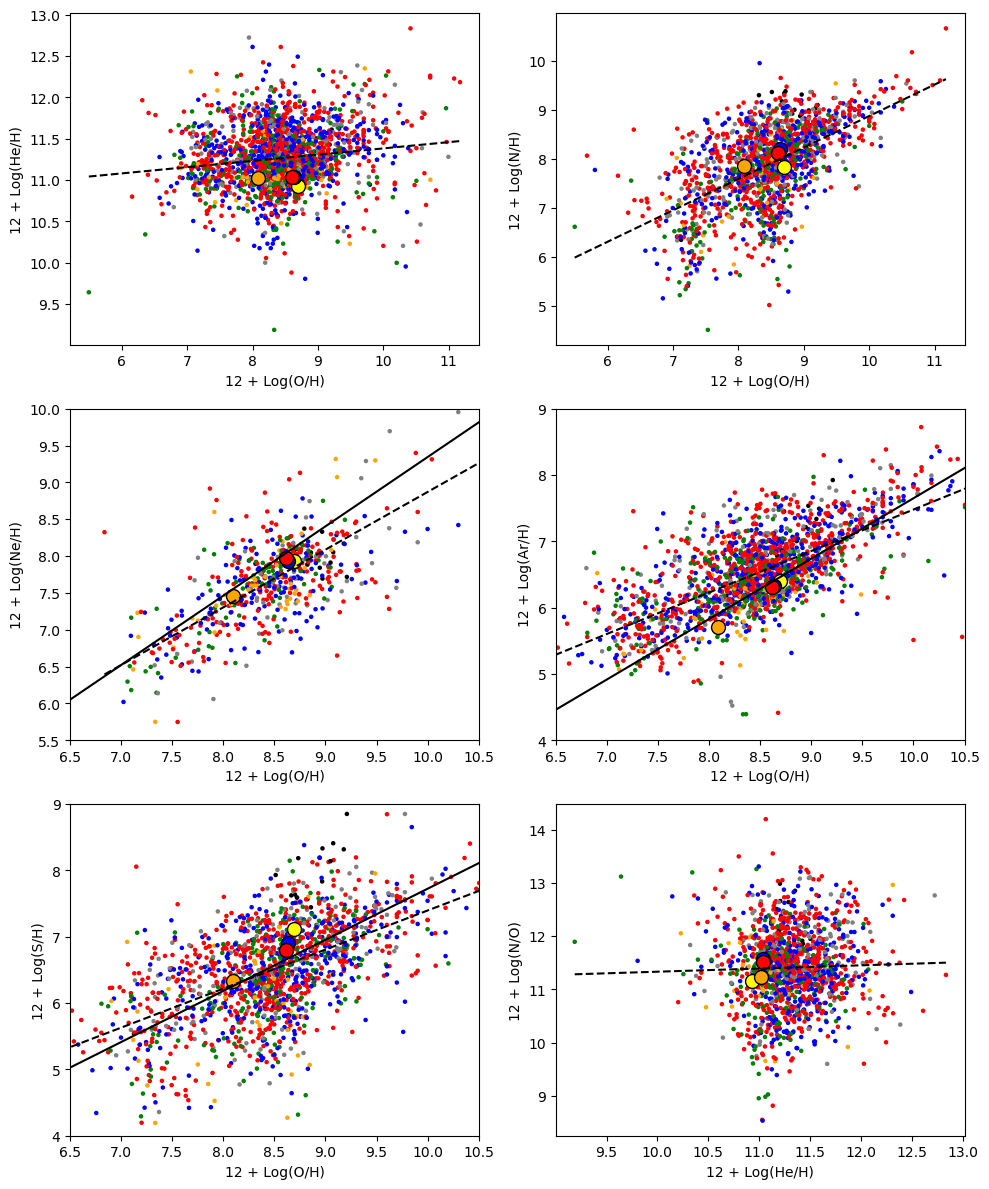

He vs O: y = (10.6264 ± 0.0181) + (0.0757 ± 0.0263)x, R^2 = 0.0202, n = 2135
N vs O: y = (2.4659 ± 0.0404) + (0.6410 ± 0.0549)x, R^2 = 0.3229, n = 1523
Ne vs O: y = (1.0464 ± 0.0467) + (0.7824 ± 0.0793)x, R^2 = 0.4775, n = 568
Ar vs O: y = (1.2339 ± 0.0246) + (0.6245 ± 0.0355)x, R^2 = 0.4787, n = 1797
S vs O: y = (1.5118 ± 0.0369) + (0.5884 ± 0.0508)x, R^2 = 0.3236, n = 1493
N/O vs He: y = (10.7338 ± 0.0445) + (0.0599 ± 0.1260)x, R^2 = 0.0009, n = 1405

Component-wise Trend Line Information:
He vs O (Bulge): y = (10.6108 ± 0.0340) + (0.0775 ± 0.0527)x, R^2 = 0.0188, n = 602
He vs O (Thin Disc): y = (10.5473 ± 0.0289) + (0.0878 ± 0.0392)x, R^2 = 0.0309, n = 840
He vs O (Thick Disk): y = (10.7048 ± 0.0446) + (0.0590 ± 0.0700)x, R^2 = 0.0106, n = 354
He vs O (Halo): y = (11.3507 ± 0.0737) + (-0.0256 ± 0.1222)x, R^2 = 0.0026, n = 92
He vs O (no distance): y = (10.9273 ± 0.0578) + (0.0471 ± 0.0782)x, R^2 = 0.0084, n = 228
He vs O (no data): y = (9.6445 ± 0.0909) + (0.1903 ± 0.3108)x, R^2 = 

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score
from scipy.stats import linregress

# Excel dosyasını oku
dosya_yolu = "/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/bilgiislem/deneme/total_abun.xlsx"
sayfa_adi = "Sayfa2"
data = pd.read_excel(dosya_yolu, sheet_name=sayfa_adi)

# Sütun başlıklarıyla birlikte verileri al
He_H = data["He/H"] + 12.0
N_H = data["N/H"] + 12.0
O_H = data["O/H"] + 12.0
Ne_H = data["Ne/H"] + 12.0
Ar_H = data["Ar/H"] + 12.0
S_H = data["S/H"] + 12.0

# Solar, disk, bulge ve halo değerleri
sol = [-1.07, -4.17, -3.31, -4.07, -5.6, -4.88]
disk = [-0.96, -3.87, -3.39, -4.03, -5.69, -5.20]
bulge = [-0.96, -3.80, -3.37, -4.07, -5.68, -5.09]
halo = [-0.98, -4.15, -3.91, -4.54, -6.29, -5.66]

# Renk haritası oluştur
color_map = {
    'Bulge': 'blue',
    'Thin Disc': 'red',
    'Thick Disk': 'green',
    'Halo': 'orange',
    'no distance': 'grey',
    'no data': 'black'
}

# Veri noktaları için renkleri belirle
colors = data['Gbileşen'].map(color_map)

# Trend çizgisi ve R^2 değerlerini kaydetmek için liste
trend_info = []
component_trend_info = []

# Trend çizgisi eklemek için yardımcı fonksiyon
def add_trend_line(ax, x_data, y_data, label):
    mask = np.isfinite(x_data) & np.isfinite(y_data)
    x_data_clean = x_data[mask]
    y_data_clean = y_data[mask]
    
    if len(x_data_clean) > 1:
        # Linear regression with standard error
        slope, intercept, r_value, p_value, std_err = linregress(x_data_clean, y_data_clean)
        
        x_values = np.linspace(min(x_data_clean), max(x_data_clean), 100)
        y_values = slope * x_values + intercept
        ax.plot(x_values, y_values, color='black', linestyle='--')
        
        # Calculate confidence intervals
        n = len(x_data_clean)
        t = 2.306  # 95% confidence interval for large sample sizes (df > 30)
        slope_ci = t * std_err
        intercept_ci = t * std_err * np.sqrt(np.sum((x_data_clean - np.mean(x_data_clean))**2) / n)
        
        trend_info.append(f"{label}: y = ({intercept:.4f} ± {intercept_ci:.4f}) + ({slope:.4f} ± {slope_ci:.4f})x, R^2 = {r_value**2:.4f}, n = {n}")

# Her bileşen için trend çizgisi hesaplamak için yardımcı fonksiyon
def calculate_component_trend(x_data, y_data, component, label):
    mask = (data['Gbileşen'] == component) & np.isfinite(x_data) & np.isfinite(y_data)
    x_data_clean = x_data[mask]
    y_data_clean = y_data[mask]
    
    if len(x_data_clean) > 1:
        # Linear regression with standard error
        slope, intercept, r_value, p_value, std_err = linregress(x_data_clean, y_data_clean)
        
        # Calculate confidence intervals
        n = len(x_data_clean)
        t = 2.306  # 95% confidence interval for large sample sizes (df > 30)
        slope_ci = t * std_err
        intercept_ci = t * std_err * np.sqrt(np.sum((x_data_clean - np.mean(x_data_clean))**2) / n)
        
        component_trend_info.append(f"{label} ({component}): y = ({intercept:.4f} ± {intercept_ci:.4f}) + ({slope:.4f} ± {slope_ci:.4f})x, R^2 = {r_value**2:.4f}, n = {n}")

# Grafik oluştur
fig, axs = plt.subplots(3, 2, figsize=(10, 12))

#####################     He     #####################
axs[0, 0].scatter(O_H, He_H, color=colors, s=5)
axs[0, 0].set_xlabel('12 + Log(O/H)')
axs[0, 0].set_ylabel('12 + Log(He/H)')
axs[0, 0].scatter(sol[2] + 12.0, sol[0] + 12.0, color='yellow', edgecolors='black', linewidths=1, s=100)
axs[0, 0].scatter(bulge[2] + 12.0, bulge[0] + 12.0, color='blue', edgecolors='black', linewidths=1, s=100)
axs[0, 0].scatter(disk[2] + 12.0, disk[0] + 12.0, color='red', edgecolors='black', linewidths=1, s=100)
axs[0, 0].scatter(halo[2] + 12.0, halo[0] + 12.0, color='orange', edgecolors='black', linewidths=1, s=100)
add_trend_line(axs[0, 0], O_H, He_H, 'He vs O')
for component in color_map.keys():
    calculate_component_trend(O_H, He_H, component, 'He vs O')

#####################     N     #####################
axs[0, 1].scatter(O_H, N_H, color=colors, s=5)
axs[0, 1].set_xlabel('12 + Log(O/H)')
axs[0, 1].set_ylabel('12 + Log(N/H)')
axs[0, 1].scatter(sol[2] + 12.0, sol[1] + 12.0, color='yellow', edgecolors='black', linewidths=1, s=100)
axs[0, 1].scatter(bulge[2] + 12.0, bulge[1] + 12.0, color='blue', edgecolors='black', linewidths=1, s=100)
axs[0, 1].scatter(disk[2] + 12.0, disk[1] + 12.0, color='red', edgecolors='black', linewidths=1, s=100)
axs[0, 1].scatter(halo[2] + 12.0, halo[1] + 12.0, color='orange', edgecolors='black', linewidths=1, s=100)
add_trend_line(axs[0, 1], O_H, N_H, 'N vs O')
for component in color_map.keys():
    calculate_component_trend(O_H, N_H, component, 'N vs O')

#####################     Ne     #####################
m = 0.94
b = -0.056
x_values = np.linspace(6.5, 10.5, 100)
y_values = m * x_values + b
axs[1, 0].plot(x_values, y_values, color='black', linestyle='solid')
axs[1, 0].scatter(O_H, Ne_H, color=colors, s=5)
axs[1, 0].set_xlabel('12 + Log(O/H)')
axs[1, 0].set_ylabel('12 + Log(Ne/H)')
axs[1, 0].set_ylim(5.5, 10.0)
axs[1, 0].set_xlim(6.5, 10.5)
axs[1, 0].scatter(sol[2] + 12.0, sol[3] + 12.0, color='yellow', edgecolors='black', linewidths=1, s=100)
axs[1, 0].scatter(bulge[2] + 12.0, bulge[3] + 12.0, color='blue', edgecolors='black', linewidths=1, s=100)
axs[1, 0].scatter(disk[2] + 12.0, disk[3] + 12.0, color='red', edgecolors='black', linewidths=1, s=100)
axs[1, 0].scatter(halo[2] + 12.0, halo[3] + 12.0, color='orange', edgecolors='black', linewidths=1, s=100)
add_trend_line(axs[1, 0], O_H, Ne_H, 'Ne vs O')
for component in color_map.keys():
    calculate_component_trend(O_H, Ne_H, component, 'Ne vs O')

#####################     Ar     #####################
m = 0.91
b = -1.45
x_values = np.linspace(6.5, 10.5, 100)
y_values = m * x_values + b
axs[1, 1].plot(x_values, y_values, color='black', linestyle='solid')
axs[1, 1].scatter(O_H, Ar_H, color=colors, s=5)
axs[1, 1].set_xlabel('12 + Log(O/H)')
axs[1, 1].set_ylabel('12 + Log(Ar/H)')
axs[1, 1].set_ylim(4, 9.0)
axs[1, 1].set_xlim(6.5, 10.5)
axs[1, 1].scatter(sol[2] + 12.0, sol[4] + 12.0, color='yellow', edgecolors='black', linewidths=1, s=100)
axs[1, 1].scatter(bulge[2] + 12.0, bulge[4] + 12.0, color='blue', edgecolors='black', linewidths=1, s=100)
axs[1, 1].scatter(disk[2] + 12.0, disk[4] + 12.0, color='red', edgecolors='black', linewidths=1, s=100)
axs[1, 1].scatter(halo[2] + 12.0, halo[4] + 12.0, color='orange', edgecolors='black', linewidths=1, s=100)
add_trend_line(axs[1, 1], O_H, Ar_H, 'Ar vs O')
for component in color_map.keys():
    calculate_component_trend(O_H, Ar_H, component, 'Ar vs O')

#####################     S     #####################
m = 0.77
b = 0.024
x_values = np.linspace(6.5, 10.5, 100)
y_values = m * x_values + b
axs[2, 0].plot(x_values, y_values, color='black', linestyle='solid')
axs[2, 0].scatter(O_H, S_H, color=colors, s=5)
axs[2, 0].set_xlabel('12 + Log(O/H)')
axs[2, 0].set_ylabel('12 + Log(S/H)')
axs[2, 0].set_ylim(4, 9.0)
axs[2, 0].set_xlim(6.5, 10.5)
axs[2, 0].scatter(sol[2] + 12.0, sol[5] + 12.0, color='yellow', edgecolors='black', linewidths=1, s=100)
axs[2, 0].scatter(bulge[2] + 12.0, bulge[5] + 12.0, color='blue', edgecolors='black', linewidths=1, s=100)
axs[2, 0].scatter(disk[2] + 12.0, disk[5] + 12.0, color='red', edgecolors='black', linewidths=1, s=100)
axs[2, 0].scatter(halo[2] + 12.0, halo[5] + 12.0, color='orange', edgecolors='black', linewidths=1, s=100)
add_trend_line(axs[2, 0], O_H, S_H, 'S vs O')
for component in color_map.keys():
    calculate_component_trend(O_H, S_H, component, 'S vs O')

#####################     NO     #####################     
N_O = pd.Series([N_H_val - O_H_val + 12.0 for N_H_val, O_H_val in zip(N_H, O_H)])
axs[2, 1].scatter(He_H, N_O, color=colors, s=5)
axs[2, 1].set_xlabel('12 + Log(He/H)')
axs[2, 1].set_ylabel('12 + Log(N/O)')
axs[2, 1].scatter(10.93, 12.0 - 0.85, color='yellow', edgecolors='black', linewidths=1, s=100)
axs[2, 1].scatter(bulge[0] + 12.0, 12.0 + bulge[1] - bulge[2], color='blue', edgecolors='black', linewidths=1, s=100)
axs[2, 1].scatter(disk[0] + 12.0, 12.0 + disk[1] - disk[2], color='red', edgecolors='black', linewidths=1, s=100)
axs[2, 1].scatter(halo[0] + 12.0, 12.0 + halo[1] - disk[2], color='orange', edgecolors='black', linewidths=1, s=100)
add_trend_line(axs[2, 1], He_H, N_O, 'N/O vs He')
for component in color_map.keys():
    calculate_component_trend(He_H, N_O, component, 'N/O vs He')

# Grafik ayarları
plt.tight_layout()
#plt.savefig('/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/bilgiislem/deneme/abun_deneme.pdf')   # save the figure to file
plt.show()

# Trend çizgisi bilgilerini yazdır
for info in trend_info:
    print(info)

print("\nComponent-wise Trend Line Information:")
for info in component_trend_info:
    print(info)

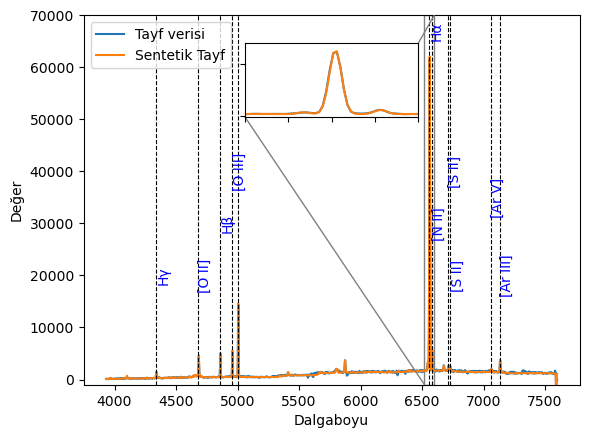

In [342]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

# Verileri yükle (burada örnek veri kullanıyorum)
filename_fit = '/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/fit/MASHI_PHR1753-3428_6D210803_id3191.fits_fit'

# Veriyi yüklemek için numpy kullanın
data = np.loadtxt(filename_fit)

# Ana grafik: İlk sütun x ekseni, y ekseni veri setinin kendisi
fig, ax = plt.subplots()
ax.plot(data[:, 0], data[:, 1], label='Tayf verisi')
ax.plot(data[:, 0], data[:, 2], label='Sentetik Tayf')

# X ekseni sınırlarını belirleyin
ax.set_ylim(-1000, 70000)

# Kesikli dikey çizgileri ve açıklamaları çizin
lines_labels = {
    4340: ('Hγ', 20000),
    4675: ('[O II]', 20000),
    4861: ('Hβ', 30000),
    4959: ('[O III]', 40000),
    5007: (' ', 50000),
    6558: ('Hα', 67000),
    6579: ('[N II]', 30000),
    6711: ('[S II]', 40000),
    6731: ('[S II]', 20000),
    7060: ('[Ar V]', 35000),
    7131: ('[Ar III]', 20000), 
}

for wavelength, (label, height) in lines_labels.items():
    ax.axvline(x=wavelength, color='k', linestyle='--', linewidth=0.8)
    ax.text(wavelength, height, label, color='b', rotation=90, verticalalignment='center')

# Grafik açıklamaları
ax.set_xlabel('Dalgaboyu')
ax.set_ylabel('Değer')
ax.legend(loc='upper left')

# Yakınlaştırılmış (inset) grafik ekle, üst tarafa yerleştir
ax_inset = inset_axes(ax, width="35%", height="20%", loc='upper center', borderpad=2)  # inset için boyut ve konum belirleme
ax_inset.plot(data[:, 0], data[:, 1], label='Tayf verisi')
ax_inset.plot(data[:, 0], data[:, 2], label='Sentetik Tayf')
ax_inset.set_xlim(6520, 6600)  # Yakınlaştırılmış bölge
ax_inset.set_ylim(-1000, 70000)
ax_inset.set_xticklabels([])  # inset eksen etiketlerini kaldırma (isteğe bağlı)
ax_inset.set_yticklabels([])

# Inset üzerinde de çizgileri ekle
for wavelength, (label, height) in lines_labels.items():
    if 5100 <= wavelength <= 6300:
        ax_inset.axvline(x=wavelength, color='k', linestyle='--', linewidth=0.8)
        ax_inset.text(wavelength, height, label, color='b', rotation=90, verticalalignment='center')

# Ana grafik ile inset arasında bir bağlantı (çizgi) çizme
mark_inset(ax, ax_inset, loc1=1, loc2=3, fc="none", ec="0.5")

# Grafiği kaydet
plt.savefig('/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/bilgiislem/8.34/alfaneat.pdf', dpi=300) 

# Grafiği göster
plt.show()


/var/folders/ry/6rcrw5vs4f33lx3wyt4f6m5w0000gn/T/ipykernel_2026/2670108869.py:30: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(y_min, y_max)


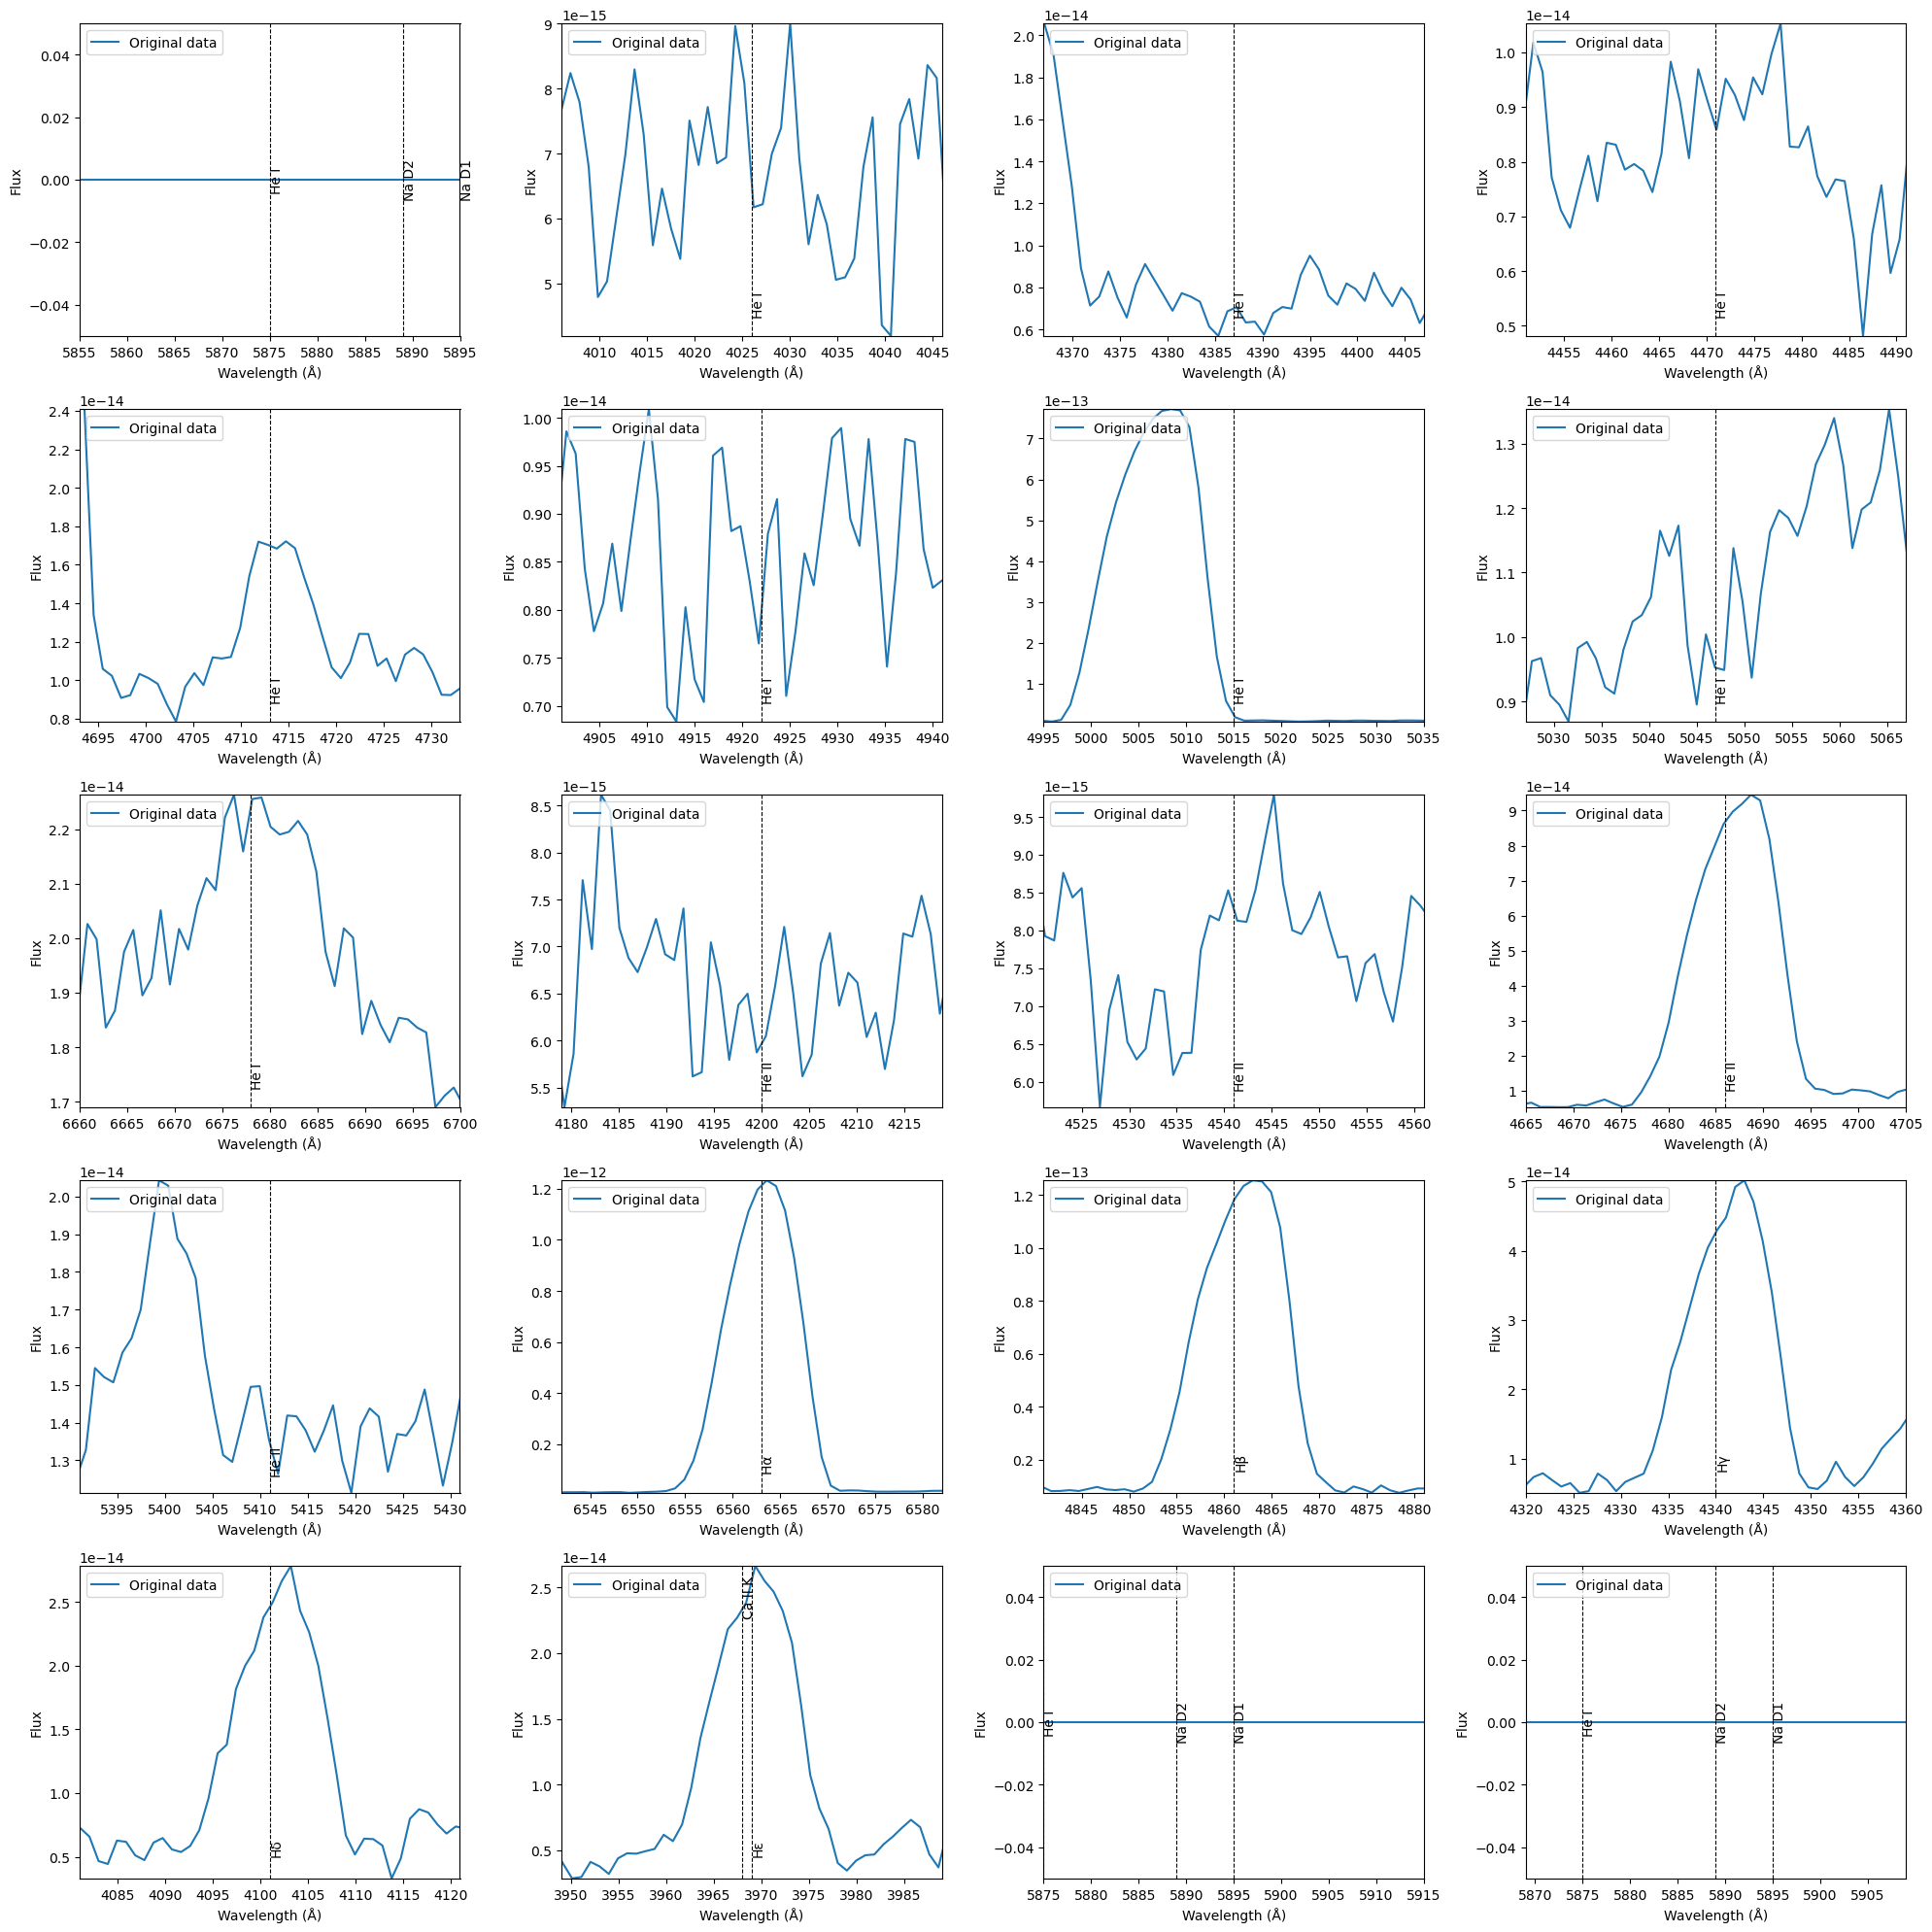

In [410]:
import numpy as np
import matplotlib.pyplot as plt

# Dosyayı yükleyin
data = np.loadtxt('/Users/nurullah/Desktop/true_PNe/dalgaboyudüzenlendi/alfa_girdi/png216.9-05.2.fits_fit')

# X aralıklarını belirleyin (3913, 3953) aralığı çıkarıldı
x_ranges = [
    (5855, 5895), (4006, 4046), (4367, 4407), (4451, 4491), (4693, 4733), (4901, 4941), (4995, 5035), 
    (5027, 5067), (6660, 6700), (4179, 4219), (4521, 4561), (4665, 4705), (5391, 5431), (6542, 6582), 
    (4841, 4881), (4320, 4360), (4081, 4121), (3949, 3989), (5875, 5915), (5869, 5909),
]

# Y aralıklarını otomatik olarak belirleyeceğiz
def get_y_limits(x_min, x_max, data):
    mask = (data[:, 0] >= x_min) & (data[:, 0] <= x_max)
    filtered_data = data[mask, 1]  # Y değerlerini filtreleyin
    return filtered_data.min(), filtered_data.max()

# 5'e 4'lük bir ızgara oluşturun
fig, axs = plt.subplots(5, 4, figsize=(20, 20))

# Her x aralığı için grafik çizin
for i, ((x_min, x_max), (y_min, y_max)) in enumerate(zip(x_ranges, [get_y_limits(x_min, x_max, data) for (x_min, x_max) in x_ranges])):
    ax = axs[i // 4, i % 4]  # Her subplot için doğru ekseni seçin
    ax.plot(data[:, 0], data[:, 1], label='Original data')
    
    # X ve Y ekseni sınırlarını belirleyin
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    
    # Kesikli dikey çizgileri ve açıklamaları çizin
    lines_labels = {5875: 'He I',4026: 'He I',4387: 'He I',4471: 'He I',4713: 'He I',4922: 'He I',5015: 'He I',
                    5047: 'He I',6678: 'He I',4200: 'He II',4541: 'He II',4686: 'He II',5411: 'He II',6563: 'Hα ',
                    4861: 'Hβ',4340: 'Hγ',4101: 'Hδ',3969: 'Hε',
                    5895: 'Na D1', 5889:'Na D2', 3993:'Ca II H', 3968:'Ca II K'
    }
    
    for wavelength, label in lines_labels.items():
        if x_min <= wavelength <= x_max:
            ax.axvline(x=wavelength, color='k', linestyle='--', linewidth=0.8)
            # 18. grafik için özel etiket konumlandırma
            if i == 17:  # 0 indeksli olduğu için 17. indeks, 18. grafiğe denk gelir
                if label == 'Hε':
                    ax.text(wavelength, y_max - (y_max - y_min) * 0.9, label, rotation=90, verticalalignment='center')
                elif label == 'Ca II K':
                    ax.text(wavelength, y_max - (y_max - y_min) * 0.1, label, rotation=90, verticalalignment='center')
                else:
                    ax.text(wavelength, y_max - (y_max - y_min) * 0.9, label, rotation=90, verticalalignment='center')
            else:
                ax.text(wavelength, y_max - (y_max - y_min) * 0.9, label, rotation=90, verticalalignment='center')
    
    # Eksenleri etiketleyin
    ax.set_xlabel('Wavelength (Å)')
    ax.set_ylabel('Flux')
    ax.legend(loc='upper left')
    #ax.set_title(f' {i+1}')

# Alt çizimlerin arasındaki boşlukları ayarlayın
plt.tight_layout()
plt.savefig('/Users/nurullah/Desktop/true_PNe/dalgaboyudüzenlendi/region/216.pdf') 
# Grafikleri gösterin
plt.show()

In [416]:
 import os
from astropy.io import fits

# FITS dosyalarının bulunduğu klasör yolu
fits_folder_path = '/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/bilgiislem/neat_out/'

# Dosya isimlerini al
fits_files = [file for file in os.listdir(fits_folder_path) if file.endswith('.fits')]

# Belirli satır indeksleri
row_indices = [83, 89, 95, 101, 106, 110, 115, 118]

# Her FITS dosyası için belirli satırlardaki değerleri al
for fits_file in fits_files:
    file_path = os.path.join(fits_folder_path, fits_file)
    
    # FITS dosyasını aç
    with fits.open(file_path) as hdul:
        # Verilerin bulunduğu tabloyu al (genellikle 'PRIMARY' veya 'TABLE')
        data = hdul[2].data
        
        # Belirli satırlardaki değerleri al
        selected_rows = data[row_indices]
        
        print(f"FITS dosyası: {fits_file}")
        for idx, row in enumerate(selected_rows):
            print(f"Satır {row_indices[idx]}: {row}")
        print("\n")


FITS dosyası: StenholmAcker_pn_g060_5-00_3_id499.fits_lines.fits
Satır 83: ('C/H', 0.0, 0.0, 0.0)
Satır 89: ('N/H', 0.000515, 0.000603, 0.000388)
Satır 95: ('O/H', 8.82e-05, 9.92e-05, 7.17e-05)
Satır 101: ('Ne/H', 0.0, 0.0, 0.0)
Satır 106: ('Ar/H', 2.57e-05, 2.94e-05, 2.15e-05)
Satır 110: ('S/H', 2.41e-05, 2.9e-05, 1.85e-05)
Satır 115: ('Cl/H', 2.87e-05, 3.29e-05, 2.32e-05)
Satır 118: ('He/H', 5.301, 5.917, 4.634)


FITS dosyası: IPHASGTC_Alves1_GT210816_id10960.fits_lines.fits
Satır 83: ('C/H', 0.0, 0.0, 0.0)
Satır 89: ('N/H', 0.0, 0.0, 0.0)
Satır 95: ('O/H', 7.37e-05, 7.67e-05, 7.05e-05)
Satır 101: ('Ne/H', 0.000826, 0.00098, 0.000672)
Satır 106: ('Ar/H', 1.61e-06, 1.85e-06, 1.37e-06)
Satır 110: ('S/H', 0.0, 0.0, 0.0)
Satır 115: ('Cl/H', 0.0, 0.0, 0.0)
Satır 118: ('He/H', 0.0, 0.0, 0.0)


FITS dosyası: MASHI_PPA1734-3817_6D210803_id3077.fits_lines.fits
Satır 83: ('C/H', 0.0, 0.0, 0.0)
Satır 89: ('N/H', 4.33e-06, 5.11e-06, 3.38e-06)
Satır 95: ('O/H', 0.000158, 0.000162, 0.000154)
Satı

Satır 83: ('C/H', 0.0, 0.0, 0.0)
Satır 89: ('N/H', 0.0, 0.0, 0.0)
Satır 95: ('O/H', 0.000202, 0.000227, 0.000173)
Satır 101: ('Ne/H', 3.99e-05, 4.57e-05, 3.31e-05)
Satır 106: ('Ar/H', 3.81e-07, 4.31e-07, 3.24e-07)
Satır 110: ('S/H', 0.0, 0.0, 0.0)
Satır 115: ('Cl/H', 1.58e-07, 1.81e-07, 1.31e-07)
Satır 118: ('He/H', 0.091, 0.094, 0.088)


FITS dosyası: AAOmega_bulge_PNG355.40-03.09_BLUEx_2dF270307_id3166.fits_lines.fits
Satır 83: ('C/H', 0.0, 0.0, 0.0)
Satır 89: ('N/H', 0.0, 0.0, 0.0)
Satır 95: ('O/H', 0.000195, 0.000198, 0.000192)
Satır 101: ('Ne/H', 0.0, 0.0, 0.0)
Satır 106: ('Ar/H', 0.0, 0.0, 0.0)
Satır 110: ('S/H', 0.0, 0.0, 0.0)
Satır 115: ('Cl/H', 0.0, 0.0, 0.0)
Satır 118: ('He/H', 0.0, 0.0, 0.0)


FITS dosyası: MASHI_PPA1814-2220_6D110804BR_id2311.fits_lines.fits
Satır 83: ('C/H', 0.0, 0.0, 0.0)
Satır 89: ('N/H', 2.39e-06, 2.72e-06, 2.05e-06)
Satır 95: ('O/H', 0.000247, 0.00025, 0.000244)
Satır 101: ('Ne/H', 0.0, 0.0, 0.0)
Satır 106: ('Ar/H', 5.07e-07, 5.58e-07, 4.5e-07)
Satır 1

FITS dosyası: SAAO201308_SP1807-2641_SA180813_id31812.fits_lines.fits
Satır 83: ('C/H', 0.0, 0.0, 0.0)
Satır 89: ('N/H', 1.07e-05, 1.32e-05, 7.9e-06)
Satır 95: ('O/H', 0.00027, 0.000277, 0.000263)
Satır 101: ('Ne/H', 0.0, 0.0, 0.0)
Satır 106: ('Ar/H', 0.0, 0.0, 0.0)
Satır 110: ('S/H', 0.0, 0.0, 0.0)
Satır 115: ('Cl/H', 0.0, 0.0, 0.0)
Satır 118: ('He/H', 4.079, 4.826, 3.281)


FITS dosyası: StenholmAcker_pn_g299_8-01_3_id926.fits_lines.fits
Satır 83: ('C/H', 0.0, 0.0, 0.0)
Satır 89: ('N/H', 0.00138, 0.00151, 0.00124)
Satır 95: ('O/H', 0.00361, 0.00447, 0.00248)
Satır 101: ('Ne/H', 0.0, 0.0, 0.0)
Satır 106: ('Ar/H', 3.06e-05, 3.51e-05, 2.53e-05)
Satır 110: ('S/H', 6.15e-06, 6.88e-06, 5.33e-06)
Satır 115: ('Cl/H', 0.0, 0.0, 0.0)
Satır 118: ('He/H', 0.386, 0.413, 0.359)


FITS dosyası: MASHI_PHR1843+0002_MS010700B_id2478.fits_lines.fits
Satır 83: ('C/H', 0.0, 0.0, 0.0)
Satır 89: ('N/H', 0.0, 0.0, 0.0)
Satır 95: ('O/H', 0.000556, 0.00056, 0.000552)
Satır 101: ('Ne/H', 0.0, 0.0, 0.0)
Satır 1

FITS dosyası: MASHI_PHR1911-1546_MS290698_id2405.fits_lines.fits
Satır 83: ('C/H', 0.0, 0.0, 0.0)
Satır 89: ('N/H', 3.75e-06, 4.06e-06, 3.42e-06)
Satır 95: ('O/H', 2.31e-05, 2.32e-05, 2.3e-05)
Satır 101: ('Ne/H', 0.0, 0.0, 0.0)
Satır 106: ('Ar/H', 4.79e-07, 5.32e-07, 4.2e-07)
Satır 110: ('S/H', 3.31e-07, 3.74e-07, 2.81e-07)
Satır 115: ('Cl/H', 7.17e-07, 7.84e-07, 6.43e-07)
Satır 118: ('He/H', 0.37, 0.462, 0.235)


FITS dosyası: StenholmAcker_pn_g002_3-03_4_id93.fits_lines.fits
Satır 83: ('C/H', 0.0, 0.0, 0.0)
Satır 89: ('N/H', 0.000246, 0.000266, 0.000224)
Satır 95: ('O/H', 0.000464, 0.000473, 0.000455)
Satır 101: ('Ne/H', 0.0, 0.0, 0.0)
Satır 106: ('Ar/H', 4.39e-06, 4.75e-06, 4e-06)
Satır 110: ('S/H', 4.91e-06, 5.57e-06, 4.26e-06)
Satır 115: ('Cl/H', 0.0, 0.0, 0.0)
Satır 118: ('He/H', 0.204, 0.214, 0.194)


FITS dosyası: StenholmAcker_pn_g001_3-01_2_id62.fits_lines.fits
Satır 83: ('C/H', 0.0, 0.0, 0.0)
Satır 89: ('N/H', 3.12e-05, 3.99e-05, 1.92e-05)
Satır 95: ('O/H', 1.51e-05, 1.92e-0

FITS dosyası: StenholmAcker_pn_g008_8+05_2_id211.fits_lines.fits
Satır 83: ('C/H', 0.0, 0.0, 0.0)
Satır 89: ('N/H', 2.8e-05, 3.21e-05, 2.32e-05)
Satır 95: ('O/H', 0.000204, 0.000211, 0.000197)
Satır 101: ('Ne/H', 0.0, 0.0, 0.0)
Satır 106: ('Ar/H', 2.16e-06, 2.59e-06, 1.63e-06)
Satır 110: ('S/H', 1.04e-06, 1.23e-06, 8.1e-07)
Satır 115: ('Cl/H', 0.0, 0.0, 0.0)
Satır 118: ('He/H', 0.208, 0.236, 0.176)


FITS dosyası: MASHI_PHR1014-5811B_FL070100LD_id2652.fits_lines.fits
Satır 83: ('C/H', 0.0, 0.0, 0.0)
Satır 89: ('N/H', 0.000285, 0.000306, 0.000262)
Satır 95: ('O/H', 0.000107, 0.00011, 0.000104)
Satır 101: ('Ne/H', 0.0, 0.0, 0.0)
Satır 106: ('Ar/H', 1.11e-05, 1.21e-05, 1e-05)
Satır 110: ('S/H', 6.65e-06, 7.28e-06, 5.96e-06)
Satır 115: ('Cl/H', 0.0, 0.0, 0.0)
Satır 118: ('He/H', 0.31, 0.37, 0.248)


FITS dosyası: StenholmAcker_pn_g144_5+06_5_id676.fits_lines.fits
Satır 83: ('C/H', 0.0, 0.0, 0.0)
Satır 89: ('N/H', 0.0, 0.0, 0.0)
Satır 95: ('O/H', 0.000297, 0.000323, 0.000268)
Satır 101: ('N

FITS dosyası: StenholmAcker_pn_g285_7+01_2_id881.fits_lines.fits
Satır 83: ('C/H', 0.0, 0.0, 0.0)
Satır 89: ('N/H', 6.34e-05, 7.21e-05, 5.33e-05)
Satır 95: ('O/H', 0.00227, 0.00266, 0.00169)
Satır 101: ('Ne/H', 0.0, 0.0, 0.0)
Satır 106: ('Ar/H', 1.28e-05, 1.43e-05, 1.11e-05)
Satır 110: ('S/H', 0.0, 0.0, 0.0)
Satır 115: ('Cl/H', 7.5e-07, 8.74e-07, 6.01e-07)
Satır 118: ('He/H', 0.218, 0.227, 0.209)


FITS dosyası: StenholmAcker_pn_g337_4+01_6_id1076.fits_lines.fits
Satır 83: ('C/H', 0.0, 0.0, 0.0)
Satır 89: ('N/H', 0.000569, 0.000847, -0.000765)
Satır 95: ('O/H', 0.0017, 0.00266, -0.0055)
Satır 101: ('Ne/H', 0.0, 0.0, 0.0)
Satır 106: ('Ar/H', 1.05e-05, 1.4e-05, 5e-07)
Satır 110: ('S/H', 1.53e-05, 2.58e-05, -4.62e-05)
Satır 115: ('Cl/H', 0.0, 0.0, 0.0)
Satır 118: ('He/H', 0.098, 0.103, 0.093)


FITS dosyası: IPHAS_IPPN1900_0014_SA010711_id371.fits_lines.fits
Satır 83: ('C/H', 0.0, 0.0, 0.0)
Satır 89: ('N/H', 0.000118, 0.000131, 0.000104)
Satır 95: ('O/H', 0.000285, 0.000291, 0.000279)
Sat

Satır 83: ('C/H', 0.0, 0.0, 0.0)
Satır 89: ('N/H', 7.74e-06, 8.39e-06, 7.03e-06)
Satır 95: ('O/H', 0.000429, 0.000435, 0.000423)
Satır 101: ('Ne/H', 7.25e-05, 7.92e-05, 6.52e-05)
Satır 106: ('Ar/H', 1.14e-05, 1.21e-05, 1.07e-05)
Satır 110: ('S/H', 6.58e-07, 7.05e-07, 6.07e-07)
Satır 115: ('Cl/H', 0.0, 0.0, 0.0)
Satır 118: ('He/H', 0.102, 0.105, 0.099)


FITS dosyası: MASHI_PHR1624-4252_MS290698_id2997.fits_lines.fits
Satır 83: ('C/H', 0.0, 0.0, 0.0)
Satır 89: ('N/H', 7.26e-07, 7.87e-07, 6.59e-07)
Satır 95: ('O/H', 2.5e-05, 2.55e-05, 1.66e-05)
Satır 101: ('Ne/H', 0.0, 0.0, 0.0)
Satır 106: ('Ar/H', 3.41e-07, 3.86e-07, 2.58e-07)
Satır 110: ('S/H', 6.72e-08, 7.85e-08, 5.52e-08)
Satır 115: ('Cl/H', 0.0, 0.0, 0.0)
Satır 118: ('He/H', 0.105, 0.117, 0.092)


FITS dosyası: StenholmAcker_pn_g055_3+02_7_id473.fits_lines.fits
Satır 83: ('C/H', 0.0, 0.0, 0.0)
Satır 89: ('N/H', 0.000749, 0.000846, 0.000638)
Satır 95: ('O/H', 0.005, 0.006, 0.003)
Satır 101: ('Ne/H', 0.0, 0.0, 0.0)
Satır 106: ('Ar/H',

FITS dosyası: FRA_Ra24_CN190917_id10061.fits_lines.fits
Satır 83: ('C/H', 0.0, 0.0, 0.0)
Satır 89: ('N/H', 0.000231, 0.000275, 0.000177)
Satır 95: ('O/H', 0.000555, 0.000626, 0.000474)
Satır 101: ('Ne/H', 0.0, 0.0, 0.0)
Satır 106: ('Ar/H', 2.69e-06, 3.32e-06, 1.87e-06)
Satır 110: ('S/H', 0.0, 0.0, 0.0)
Satır 115: ('Cl/H', 1.8e-06, 2.04e-06, 1.52e-06)
Satır 118: ('He/H', 0.0, 0.0, 0.0)


FITS dosyası: SAAO2014_WRAY16-251_SA130914_id4999.fits_lines.fits
Satır 83: ('C/H', 0.0, 0.0, 0.0)
Satır 89: ('N/H', 0.0, 0.0, 0.0)
Satır 95: ('O/H', 0.0015, 0.00151, 0.00149)
Satır 101: ('Ne/H', 0.0, 0.0, 0.0)
Satır 106: ('Ar/H', 1.69e-05, 1.78e-05, 1.6e-05)
Satır 110: ('S/H', 3.39e-06, 3.84e-06, 2.94e-06)
Satır 115: ('Cl/H', 3.38e-06, 3.56e-06, 3.2e-06)
Satır 118: ('He/H', 0.576, 0.596, 0.556)


FITS dosyası: StenholmAcker_pn_g008_3-01_1_id206.fits_lines.fits
Satır 83: ('C/H', 0.0, 0.0, 0.0)
Satır 89: ('N/H', 0.00188, 0.00215, 0.00119)
Satır 95: ('O/H', 0.012, 0.014, 0.008)
Satır 101: ('Ne/H', 0.0, 0.

Satır 101: ('Ne/H', 0.0, 0.0, 0.0)
Satır 106: ('Ar/H', 5.02e-07, 5.47e-07, 4.58e-07)
Satır 110: ('S/H', 5.33e-08, 6.27e-08, 4.35e-08)
Satır 115: ('Cl/H', 0.0, 0.0, 0.0)
Satır 118: ('He/H', 0.126, 0.132, 0.12)


FITS dosyası: StenholmAcker_pn_g027_4-03_5_id336.fits_lines.fits
Satır 83: ('C/H', 0.0, 0.0, 0.0)
Satır 89: ('N/H', 9.28e-06, 1.106e-05, 7.41e-06)
Satır 95: ('O/H', 0.000302, 0.000352, 0.000243)
Satır 101: ('Ne/H', 4.87e-05, 5.67e-05, 3.9e-05)
Satır 106: ('Ar/H', 2.09e-06, 2.4e-06, 1.73e-06)
Satır 110: ('S/H', 0.0, 0.0, 0.0)
Satır 115: ('Cl/H', 9.07e-08, 1.027e-07, 7.69e-08)
Satır 118: ('He/H', 0.139, 0.146, 0.132)


FITS dosyası: MASHI_PHR1639-4516_MS290698_id2998.fits_lines.fits
Satır 83: ('C/H', 0.0, 0.0, 0.0)
Satır 89: ('N/H', 0.000162, 0.000168, 0.000154)
Satır 95: ('O/H', 1.49e-05, 1.53e-05, 1.45e-05)
Satır 101: ('Ne/H', 0.0, 0.0, 0.0)
Satır 106: ('Ar/H', 3.98e-07, 4.33e-07, 3.6e-07)
Satır 110: ('S/H', 2.83e-06, 2.93e-06, 2.71e-06)
Satır 115: ('Cl/H', 3.01e-07, 3.35e-07, 2

Satır 83: ('C/H', 0.0, 0.0, 0.0)
Satır 89: ('N/H', 0.0, 0.0, 0.0)
Satır 95: ('O/H', 0.000404, 0.000407, 0.000401)
Satır 101: ('Ne/H', 5.5e-05, 6.08e-05, 4.85e-05)
Satır 106: ('Ar/H', 1.74e-06, 1.88e-06, 1.6e-06)
Satır 110: ('S/H', 0.0, 0.0, 0.0)
Satır 115: ('Cl/H', 1.09e-06, 1.2e-06, 9.7e-07)
Satır 118: ('He/H', 0.203, 0.21, 0.196)


FITS dosyası: DSHWIYN_DSH_Pa8_WY070610_id4365.fits_lines.fits
Satır 83: ('C/H', 0.0, 0.0, 0.0)
Satır 89: ('N/H', 1.05e-05, 1.3e-05, 7.3e-06)
Satır 95: ('O/H', 2.17e-05, 2.64e-05, 1.57e-05)
Satır 101: ('Ne/H', 0.0, 0.0, 0.0)
Satır 106: ('Ar/H', 0.0, 0.0, 0.0)
Satır 110: ('S/H', 4.53e-07, 5.51e-07, 3.27e-07)
Satır 115: ('Cl/H', 2.85e-07, 3.56e-07, 1.91e-07)
Satır 118: ('He/H', 0.445, 0.524, 0.349)


FITS dosyası: StenholmAcker_pn_g026_6-01_5_id332.fits_lines.fits
Satır 83: ('C/H', 0.0, 0.0, 0.0)
Satır 89: ('N/H', 0.000285, 0.000338, 0.00022)
Satır 95: ('O/H', 0.000525, 0.000628, 0.000397)
Satır 101: ('Ne/H', 0.000106, 0.000133, 7e-05)
Satır 106: ('Ar/H', 6.9

FITS dosyası: SAAO2017_WRAY16-161_SA290517_id4965.fits_lines.fits
Satır 83: ('C/H', 0.0, 0.0, 0.0)
Satır 89: ('N/H', 0.00011, 0.000142, 7.1e-05)
Satır 95: ('O/H', 0.00144, 0.00197, 0.00069)
Satır 101: ('Ne/H', 3.32e-05, 4.4e-05, 1.91e-05)
Satır 106: ('Ar/H', 9.28e-06, 1.132e-05, 6.93e-06)
Satır 110: ('S/H', 5.18e-05, 6.36e-05, 3.79e-05)
Satır 115: ('Cl/H', 8.04e-07, 9.63e-07, 6.19e-07)
Satır 118: ('He/H', 0.519, 0.563, 0.471)


FITS dosyası: StenholmAcker_pn_g335_2-03_6_id1063.fits_lines.fits
Satır 83: ('C/H', 0.0, 0.0, 0.0)
Satır 89: ('N/H', 4.91e-06, 5.44e-06, 4.32e-06)
Satır 95: ('O/H', 0.000148, 0.000157, 0.000139)
Satır 101: ('Ne/H', 0.0, 0.0, 0.0)
Satır 106: ('Ar/H', 1.85e-06, 2.04e-06, 1.64e-06)
Satır 110: ('S/H', 5.09e-07, 5.66e-07, 4.53e-07)
Satır 115: ('Cl/H', 7.57e-07, 8.37e-07, 6.76e-07)
Satır 118: ('He/H', 0.248, 0.265, 0.23)


FITS dosyası: SAAO2016_Sa2-4_SA031116_id4551.fits_lines.fits
Satır 83: ('C/H', 0.0, 0.0, 0.0)
Satır 89: ('N/H', 0.0, 0.0, 0.0)
Satır 95: ('O/H', 0.

FITS dosyası: StenholmAcker_pn_g345_0+04_3_id1118.fits_lines.fits
Satır 83: ('C/H', 0.0, 0.0, 0.0)
Satır 89: ('N/H', 5.76e-05, 6.18e-05, 5.34e-05)
Satır 95: ('O/H', 0.00131, 0.00132, 0.0013)
Satır 101: ('Ne/H', 0.0, 0.0, 0.0)
Satır 106: ('Ar/H', 0.0, 0.0, 0.0)
Satır 110: ('S/H', 1.26e-06, 1.43e-06, 1.09e-06)
Satır 115: ('Cl/H', 1.09e-06, 1.25e-06, 9.4e-07)
Satır 118: ('He/H', 0.0, 0.0, 0.0)


FITS dosyası: StenholmAcker_pn_g122_1-04_9_id647.fits_lines.fits
Satır 83: ('C/H', 0.0, 0.0, 0.0)
Satır 89: ('N/H', 0.0, 0.0, 0.0)
Satır 95: ('O/H', 0.000415, 0.000451, 0.000376)
Satır 101: ('Ne/H', 0.0, 0.0, 0.0)
Satır 106: ('Ar/H', 0.0, 0.0, 0.0)
Satır 110: ('S/H', 0.0, 0.0, 0.0)
Satır 115: ('Cl/H', 3.05e-06, 3.55e-06, 2.52e-06)
Satır 118: ('He/H', 0.042, 0.046, 0.038)


FITS dosyası: MASHI_PHR1213-6344_FL110898B_id2733.fits_lines.fits
Satır 83: ('C/H', 0.0, 0.0, 0.0)
Satır 89: ('N/H', 0.0, 0.0, 0.0)
Satır 95: ('O/H', 0.0, 0.0, 0.0)
Satır 101: ('Ne/H', 0.0, 0.0, 0.0)
Satır 106: ('Ar/H', 0.0, 0.0

FITS dosyası: MASHI_PHR1337-6908_SA160501_id2784.fits_lines.fits
Satır 83: ('C/H', 0.0, 0.0, 0.0)
Satır 89: ('N/H', 0.00013, 0.000147, 0.000119)
Satır 95: ('O/H', 9.5e-05, 0.0001011, 8.89e-05)
Satır 101: ('Ne/H', 0.0, 0.0, 0.0)
Satır 106: ('Ar/H', 0.0, 0.0, 0.0)
Satır 110: ('S/H', 0.0, 0.0, 0.0)
Satır 115: ('Cl/H', 0.0, 0.0, 0.0)
Satır 118: ('He/H', 0.435, 0.504, 0.367)


FITS dosyası: Kwitter_NGC7354_KP300603_id623.fits_lines.fits
Satır 83: ('C/H', 0.0, 0.0, 0.0)
Satır 89: ('N/H', 0.000751, 0.000828, 0.000666)
Satır 95: ('O/H', 0.000879, 0.000922, 0.000836)
Satır 101: ('Ne/H', 6.95e-05, 7.3e-05, 6.58e-05)
Satır 106: ('Ar/H', 1.64e-05, 1.74e-05, 1.53e-05)
Satır 110: ('S/H', 0.000155, 0.00017, 0.000139)
Satır 115: ('Cl/H', 9.81e-07, 1.015e-06, 9.47e-07)
Satır 118: ('He/H', 0.221, 0.225, 0.217)


FITS dosyası: MASHI_PHR0654-1045_SA280103_id2524.fits_lines.fits
Satır 83: ('C/H', 0.0, 0.0, 0.0)
Satır 89: ('N/H', 0.0, 0.0, 0.0)
Satır 95: ('O/H', 1.88e-05, 1.91e-05, 1.85e-05)
Satır 101: ('Ne

FITS dosyası: MASHI_PHR0705-1419_SA290103_id2535.fits_lines.fits
Satır 83: ('C/H', 0.0, 0.0, 0.0)
Satır 89: ('N/H', 0.000101, 0.000109, 9.2e-05)
Satır 95: ('O/H', 0.000326, 0.000331, 0.000321)
Satır 101: ('Ne/H', 2.88e-05, 3.29e-05, 2.46e-05)
Satır 106: ('Ar/H', 4.23e-06, 4.65e-06, 3.76e-06)
Satır 110: ('S/H', 3.2e-06, 3.45e-06, 2.93e-06)
Satır 115: ('Cl/H', 0.0, 0.0, 0.0)
Satır 118: ('He/H', 0.494, 0.526, 0.46)


FITS dosyası: StenholmAcker_pn_g002_2-02_5_id89.fits_lines.fits
Satır 83: ('C/H', 0.0, 0.0, 0.0)
Satır 89: ('N/H', 6.32e-06, 7.44e-06, 5.21e-06)
Satır 95: ('O/H', 0.000362, 0.000382, 0.000342)
Satır 101: ('Ne/H', 0.0, 0.0, 0.0)
Satır 106: ('Ar/H', 2.54e-06, 2.91e-06, 2.17e-06)
Satır 110: ('S/H', 0.0, 0.0, 0.0)
Satır 115: ('Cl/H', 2.32e-06, 2.77e-06, 1.86e-06)
Satır 118: ('He/H', 0.078, 0.085, 0.071)


FITS dosyası: AAOmega_bulge_mystery1_BLUEx_2dF160308_id2056.fits_lines.fits
Satır 83: ('C/H', 0.0, 0.0, 0.0)
Satır 89: ('N/H', 0.0, 0.0, 0.0)
Satır 95: ('O/H', 0.000254, 0.00026

FITS dosyası: SAAO201808_DeHt10_SA100818_id241.fits_lines.fits
Satır 83: ('C/H', 0.0, 0.0, 0.0)
Satır 89: ('N/H', 0.0, 0.0, 0.0)
Satır 95: ('O/H', 0.000496, 0.000535, 0.000454)
Satır 101: ('Ne/H', 0.0, 0.0, 0.0)
Satır 106: ('Ar/H', 2.78e-06, 3.03e-06, 2.51e-06)
Satır 110: ('S/H', 4.31e-06, 5.1e-06, 3.29e-06)
Satır 115: ('Cl/H', 0.0, 0.0, 0.0)
Satır 118: ('He/H', 0.2, 0.21, 0.19)


FITS dosyası: StenholmAcker_pn_g068_6+01_1_id524.fits_lines.fits
Satır 83: ('C/H', 0.0, 0.0, 0.0)
Satır 89: ('N/H', 0.000187, 0.000241, 0.000112)
Satır 95: ('O/H', 0.004, 0.006, 0.001)
Satır 101: ('Ne/H', 2.8e-05, 3.82e-05, 1.18e-05)
Satır 106: ('Ar/H', 1.99e-05, 2.63e-05, 1.04e-05)
Satır 110: ('S/H', 1.02e-05, 1.25e-05, 7.2e-06)
Satır 115: ('Cl/H', 1.79e-06, 2.31e-06, 1.03e-06)
Satır 118: ('He/H', 0.222, 0.241, 0.201)


FITS dosyası: MASHI_PHR1800-2904_6D200701LD_id2100.fits_lines.fits
Satır 83: ('C/H', 0.0, 0.0, 0.0)
Satır 89: ('N/H', 0.0, 0.0, 0.0)
Satır 95: ('O/H', 0.000851, 0.000988, 0.000665)
Satır 101:

FITS dosyası: MASHI_PHR1234-5843_SA160199_id2747.fits_lines.fits
Satır 83: ('C/H', 0.0, 0.0, 0.0)
Satır 89: ('N/H', 0.000129, 0.000149, 0.000106)
Satır 95: ('O/H', 0.000282, 0.000356, 0.00017)
Satır 101: ('Ne/H', 6.64e-06, 8.44e-06, 4.04e-06)
Satır 106: ('Ar/H', 3.72e-06, 4.26e-06, 3.07e-06)
Satır 110: ('S/H', 9.7e-06, 1.101e-05, 8.17e-06)
Satır 115: ('Cl/H', 0.0, 0.0, 0.0)
Satır 118: ('He/H', 0.244, 0.258, 0.23)


FITS dosyası: MASHI_PHR1351-5429_SA150501_id2812.fits_lines.fits
Satır 83: ('C/H', 0.0, 0.0, 0.0)
Satır 89: ('N/H', 0.0, 0.0, 0.0)
Satır 95: ('O/H', 0.000186, 0.000193, 0.000179)
Satır 101: ('Ne/H', 0.0, 0.0, 0.0)
Satır 106: ('Ar/H', 6.94e-07, 8.26e-07, 5.31e-07)
Satır 110: ('S/H', 0.0, 0.0, 0.0)
Satır 115: ('Cl/H', 0.0, 0.0, 0.0)
Satır 118: ('He/H', 0.181, 0.206, 0.156)


FITS dosyası: SAAO2014_CbF3_SA130914_id4154.fits_lines.fits
Satır 83: ('C/H', 0.0, 0.0, 0.0)
Satır 89: ('N/H', 2.49e-05, 2.96e-05, 1.91e-05)
Satır 95: ('O/H', 1.68e-05, 2.03e-05, 1.18e-05)
Satır 101: ('Ne/

FITS dosyası: IPHASGTC_We2-5_GT260816_id655.fits_lines.fits
Satır 83: ('C/H', 0.0, 0.0, 0.0)
Satır 89: ('N/H', 0.000314, 0.000353, 0.000269)
Satır 95: ('O/H', 5.83e-05, 6.35e-05, 5.26e-05)
Satır 101: ('Ne/H', 0.0, 0.0, 0.0)
Satır 106: ('Ar/H', 1.51e-06, 1.73e-06, 1.25e-06)
Satır 110: ('S/H', 2.49e-06, 2.82e-06, 2.11e-06)
Satır 115: ('Cl/H', 0.0, 0.0, 0.0)
Satır 118: ('He/H', 0.176, 0.191, 0.16)


FITS dosyası: StenholmAcker_pn_g291_6-04_8_id902.fits_lines.fits
Satır 83: ('C/H', 0.0, 0.0, 0.0)
Satır 89: ('N/H', 0.000235, 0.000262, 0.000192)
Satır 95: ('O/H', 0.000741, 0.000801, 0.000492)
Satır 101: ('Ne/H', 0.0, 0.0, 0.0)
Satır 106: ('Ar/H', 7.16e-06, 7.52e-06, 6.78e-06)
Satır 110: ('S/H', 4.97e-06, 6.53e-06, 8e-08)
Satır 115: ('Cl/H', 1.39e-07, 1.54e-07, 1.23e-07)
Satır 118: ('He/H', 0.124, 0.127, 0.121)


FITS dosyası: AAOmega_bulge_PNG358.02+01.62_2dF260307_id3246.fits_lines.fits
Satır 83: ('C/H', 0.0, 0.0, 0.0)
Satır 89: ('N/H', 5.96e-05, 6.96e-05, 4.76e-05)
Satır 95: ('O/H', 0.0002

Satır 83: ('C/H', 0.0, 0.0, 0.0)
Satır 89: ('N/H', 0.0, 0.0, 0.0)
Satır 95: ('O/H', 0.0, 0.0, 0.0)
Satır 101: ('Ne/H', 0.0, 0.0, 0.0)
Satır 106: ('Ar/H', 0.0, 0.0, 0.0)
Satır 110: ('S/H', 0.0, 0.0, 0.0)
Satır 115: ('Cl/H', 0.0, 0.0, 0.0)
Satır 118: ('He/H', 0.0, 0.0, 0.0)


FITS dosyası: MASHI_PHR1758-2852_FL090799LD_id2101.fits_lines.fits
Satır 83: ('C/H', 0.0, 0.0, 0.0)
Satır 89: ('N/H', 0.0, 0.0, 0.0)
Satır 95: ('O/H', 0.0, 0.0, 0.0)
Satır 101: ('Ne/H', 0.0, 0.0, 0.0)
Satır 106: ('Ar/H', 0.0, 0.0, 0.0)
Satır 110: ('S/H', 0.0, 0.0, 0.0)
Satır 115: ('Cl/H', 0.0, 0.0, 0.0)
Satır 118: ('He/H', 0.0, 0.0, 0.0)


FITS dosyası: MASHI_PHR1820-2510_MS090702B_id2276.fits_lines.fits
Satır 83: ('C/H', 0.0, 0.0, 0.0)
Satır 89: ('N/H', 0.0, 0.0, 0.0)
Satır 95: ('O/H', 0.000322, 0.000325, 0.000319)
Satır 101: ('Ne/H', 0.0, 0.0, 0.0)
Satır 106: ('Ar/H', 0.0, 0.0, 0.0)
Satır 110: ('S/H', 0.0, 0.0, 0.0)
Satır 115: ('Cl/H', 0.0, 0.0, 0.0)
Satır 118: ('He/H', 0.0, 0.0, 0.0)


FITS dosyası: SAAO201808_PH

FITS dosyası: StenholmAcker_pn_g069_7+00_0_id534.fits_lines.fits
Satır 83: ('C/H', 0.0, 0.0, 0.0)
Satır 89: ('N/H', 0.00212, 0.0027, 0.0014)
Satır 95: ('O/H', 0.052, 0.073, 0.017)
Satır 101: ('Ne/H', 0.0, 0.0, 0.0)
Satır 106: ('Ar/H', 0.000155, 0.000191, 0.000104)
Satır 110: ('S/H', 9.96e-05, 0.0001201, 7.33e-05)
Satır 115: ('Cl/H', 1.31e-06, 1.59e-06, 8.7e-07)
Satır 118: ('He/H', 1.741, 2.11, 1.272)


FITS dosyası: MASHI_PHR1742-1256N_MS130604B_id2357.fits_lines.fits
Satır 83: ('C/H', 0.0, 0.0, 0.0)
Satır 89: ('N/H', 0.0, 0.0, 0.0)
Satır 95: ('O/H', 0.000155, 0.000159, 0.000151)
Satır 101: ('Ne/H', 0.0, 0.0, 0.0)
Satır 106: ('Ar/H', 0.0, 0.0, 0.0)
Satır 110: ('S/H', 0.0, 0.0, 0.0)
Satır 115: ('Cl/H', 0.0, 0.0, 0.0)
Satır 118: ('He/H', 0.0, 0.0, 0.0)


FITS dosyası: SAAO199901_PHR1134-5243_SA180199_id2689.fits_lines.fits
Satır 83: ('C/H', 0.0, 0.0, 0.0)
Satır 89: ('N/H', 0.000105, 0.000112, 9.8e-05)
Satır 95: ('O/H', 1.14e-05, 1.28e-05, 9.8e-06)
Satır 101: ('Ne/H', 0.0, 0.0, 0.0)
Satır

Satır 83: ('C/H', 0.0, 0.0, 0.0)
Satır 89: ('N/H', 3.43e-05, 4.18e-05, 2.38e-05)
Satır 95: ('O/H', 3.8e-05, 4.79e-05, 2.38e-05)
Satır 101: ('Ne/H', 0.0, 0.0, 0.0)
Satır 106: ('Ar/H', 6.74e-07, 8.27e-07, 4.79e-07)
Satır 110: ('S/H', 1.28e-06, 1.6e-06, 8.4e-07)
Satır 115: ('Cl/H', 0.0, 0.0, 0.0)
Satır 118: ('He/H', 0.167, 0.214, 0.102)


FITS dosyası: MASHI_PHR1848-0912_SA150501_id2425.fits_lines.fits
Satır 83: ('C/H', 0.0, 0.0, 0.0)
Satır 89: ('N/H', 0.0012, 0.00133, 0.00106)
Satır 95: ('O/H', 0.000566, 0.000634, 0.000488)
Satır 101: ('Ne/H', 0.0, 0.0, 0.0)
Satır 106: ('Ar/H', 4.54e-05, 5.03e-05, 4e-05)
Satır 110: ('S/H', 3.39e-05, 3.74e-05, 3e-05)
Satır 115: ('Cl/H', 0.0, 0.0, 0.0)
Satır 118: ('He/H', 0.556, 0.622, 0.481)


FITS dosyası: MASHI_PHR1554-5651_SA180501_id2903.fits_lines.fits
Satır 83: ('C/H', 0.0, 0.0, 0.0)
Satır 89: ('N/H', 0.000482, 0.000508, 0.000455)
Satır 95: ('O/H', 0.000689, 0.000706, 0.000672)
Satır 101: ('Ne/H', 0.0, 0.0, 0.0)
Satır 106: ('Ar/H', 2.24e-05, 2.41e-0

FITS dosyası: AAOmega_bulge_KFL1_BLUEx_300508_id30.fits_lines.fits
Satır 83: ('C/H', 0.0, 0.0, 0.0)
Satır 89: ('N/H', 0.0, 0.0, 0.0)
Satır 95: ('O/H', 0.000171, 0.000173, 0.000169)
Satır 101: ('Ne/H', 3.8e-05, 4.22e-05, 3.33e-05)
Satır 106: ('Ar/H', 0.0, 0.0, 0.0)
Satır 110: ('S/H', 0.0, 0.0, 0.0)
Satır 115: ('Cl/H', 0.0, 0.0, 0.0)
Satır 118: ('He/H', 0.211, 0.24, 0.178)


FITS dosyası: AAOmega_bulge_M3-43_BLUEx_2dF290508_id11.fits_lines.fits
Satır 83: ('C/H', 0.0, 0.0, 0.0)
Satır 89: ('N/H', 0.0, 0.0, 0.0)
Satır 95: ('O/H', 0.00057, 0.000641, 0.000489)
Satır 101: ('Ne/H', 7.57e-06, 9.05e-06, 5.72e-06)
Satır 106: ('Ar/H', 3.98e-06, 4.5e-06, 3.32e-06)
Satır 110: ('S/H', 0.0, 0.0, 0.0)
Satır 115: ('Cl/H', 2.18e-06, 2.47e-06, 1.79e-06)
Satır 118: ('He/H', 0.086, 0.088, 0.084)


FITS dosyası: StenholmAcker_pn_g038_1-25_4_id391.fits_lines.fits
Satır 83: ('C/H', 0.0, 0.0, 0.0)
Satır 89: ('N/H', 8.48e-05, 0.000106, 5.65e-05)
Satır 95: ('O/H', 0.000265, 0.000289, 0.000239)
Satır 101: ('Ne/H', 

FITS dosyası: StenholmAcker_pn_g118_8-74_7_id639.fits_lines.fits
Satır 83: ('C/H', 0.0, 0.0, 0.0)
Satır 89: ('N/H', 0.0, 0.0, 0.0)
Satır 95: ('O/H', 0.00019, 0.000208, 0.00017)
Satır 101: ('Ne/H', 0.0, 0.0, 0.0)
Satır 106: ('Ar/H', 0.0, 0.0, 0.0)
Satır 110: ('S/H', 0.0, 0.0, 0.0)
Satır 115: ('Cl/H', 0.0, 0.0, 0.0)
Satır 118: ('He/H', 0.062, 0.066, 0.058)


FITS dosyası: SAAO201403_MPA0954-5026_SA070314_id2635.fits_lines.fits
Satır 83: ('C/H', 0.0, 0.0, 0.0)
Satır 89: ('N/H', 0.0, 0.0, 0.0)
Satır 95: ('O/H', 0.000276, 0.00028, 0.000272)
Satır 101: ('Ne/H', 0.0, 0.0, 0.0)
Satır 106: ('Ar/H', 2.15e-06, 2.37e-06, 1.91e-06)
Satır 110: ('S/H', 0.0, 0.0, 0.0)
Satır 115: ('Cl/H', 2.43e-06, 2.64e-06, 2.2e-06)
Satır 118: ('He/H', 0.091, 0.096, 0.086)


FITS dosyası: MASHI_PHR1824-2144_MSSSO_220506B_id2330.fits_lines.fits
Satır 83: ('C/H', 0.0, 0.0, 0.0)
Satır 89: ('N/H', 0.0, 0.0, 0.0)
Satır 95: ('O/H', 8.85e-05, 9.43e-05, 8.23e-05)
Satır 101: ('Ne/H', 0.0, 0.0, 0.0)
Satır 106: ('Ar/H', 0.0, 0.0

FITS dosyası: FRA_CaVa1_KO311017_id31915.fits_lines.fits
Satır 83: ('C/H', 0.0, 0.0, 0.0)
Satır 89: ('N/H', 1.16e-05, 1.22e-05, 1.1e-05)
Satır 95: ('O/H', 6.42e-05, 6.49e-05, 6.34e-05)
Satır 101: ('Ne/H', 0.0, 0.0, 0.0)
Satır 106: ('Ar/H', 2e-06, 2.08e-06, 1.92e-06)
Satır 110: ('S/H', 6.42e-07, 7.57e-07, 5.26e-07)
Satır 115: ('Cl/H', 1.37e-06, 1.41e-06, 1.33e-06)
Satır 118: ('He/H', 0.747, 0.804, 0.69)


FITS dosyası: MASHI_PHR1743-3749_MS280698_id3096.fits_lines.fits
Satır 83: ('C/H', 0.0, 0.0, 0.0)
Satır 89: ('N/H', 1.17e-05, 1.33e-05, 9.9e-06)
Satır 95: ('O/H', 0.000105, 0.000109, 1e-04)
Satır 101: ('Ne/H', 3.55e-06, 3.95e-06, 3.1e-06)
Satır 106: ('Ar/H', 2.78e-06, 2.97e-06, 2.58e-06)
Satır 110: ('S/H', 5.64e-07, 6.28e-07, 4.92e-07)
Satır 115: ('Cl/H', 3.14e-07, 3.67e-07, 2.6e-07)
Satır 118: ('He/H', 0.097, 0.1, 0.094)


FITS dosyası: StenholmAcker_pn_g357_1-06_1_id1238.fits_lines.fits
Satır 83: ('C/H', 0.0, 0.0, 0.0)
Satır 89: ('N/H', 1.2e-05, 1.45e-05, 8.8e-06)
Satır 95: ('O/H', 2

Satır 83: ('C/H', 0.0, 0.0, 0.0)
Satır 89: ('N/H', 0.000251, 0.000288, 0.000199)
Satır 95: ('O/H', 0.000674, 0.000809, 0.00048)
Satır 101: ('Ne/H', 0.0, 0.0, 0.0)
Satır 106: ('Ar/H', 4.75e-06, 5.4e-06, 3.96e-06)
Satır 110: ('S/H', 1.11e-05, 1.37e-05, 6.8e-06)
Satır 115: ('Cl/H', 1.93e-07, 2.28e-07, 1.48e-07)
Satır 118: ('He/H', 0.177, 0.186, 0.168)


FITS dosyası: FRA_Li1_AQ030916_id15557.fits_lines.fits
Satır 83: ('C/H', 0.0, 0.0, 0.0)
Satır 89: ('N/H', 0.000575, 0.000622, 0.000528)
Satır 95: ('O/H', 0.000472, 0.00049, 0.000454)
Satır 101: ('Ne/H', 0.0, 0.0, 0.0)
Satır 106: ('Ar/H', 2.6e-08, 3.07e-08, 2.14e-08)
Satır 110: ('S/H', 4.64e-06, 5.26e-06, 4.03e-06)
Satır 115: ('Cl/H', 1.77e-06, 2.08e-06, 1.46e-06)
Satır 118: ('He/H', 0.385, 0.404, 0.366)


FITS dosyası: MASHI_PPA1753-3428_6D150804BR_id3191.fits_lines.fits
Satır 83: ('C/H', 0.0, 0.0, 0.0)
Satır 89: ('N/H', 9.7e-06, 1.048e-05, 8.86e-06)
Satır 95: ('O/H', 0.000159, 0.000182, 0.00013)
Satır 101: ('Ne/H', 0.0, 0.0, 0.0)
Satır 10

FITS dosyası: DBS_Feb2007_MPA0717-1334_MS200207_id2537.fits_lines.fits
Satır 83: ('C/H', 0.0, 0.0, 0.0)
Satır 89: ('N/H', 0.0, 0.0, 0.0)
Satır 95: ('O/H', 0.0, 0.0, 0.0)
Satır 101: ('Ne/H', 0.0, 0.0, 0.0)
Satır 106: ('Ar/H', 0.0, 0.0, 0.0)
Satır 110: ('S/H', 0.0, 0.0, 0.0)
Satır 115: ('Cl/H', 0.0, 0.0, 0.0)
Satır 118: ('He/H', 0.0, 0.0, 0.0)


FITS dosyası: MASHI_PHR1718-3315_6D190803_id3109.fits_lines.fits
Satır 83: ('C/H', 0.0, 0.0, 0.0)
Satır 89: ('N/H', 3.78e-05, 3.98e-05, 3.58e-05)
Satır 95: ('O/H', 0.000285, 0.000298, 0.000272)
Satır 101: ('Ne/H', 0.0, 0.0, 0.0)
Satır 106: ('Ar/H', 1.67e-06, 1.81e-06, 1.52e-06)
Satır 110: ('S/H', 1.74e-06, 1.99e-06, 1.49e-06)
Satır 115: ('Cl/H', 0.0, 0.0, 0.0)
Satır 118: ('He/H', 0.078, 0.089, 0.067)


FITS dosyası: DBS_Feb2007_MPA1121-6146_MS220207_id2699.fits_lines.fits
Satır 83: ('C/H', 0.0, 0.0, 0.0)
Satır 89: ('N/H', 4.48e-05, 4.74e-05, 4.2e-05)
Satır 95: ('O/H', 0.000615, 0.000624, 0.000606)
Satır 101: ('Ne/H', 0.0, 0.0, 0.0)
Satır 106: ('A

Satır 83: ('C/H', 0.0, 0.0, 0.0)
Satır 89: ('N/H', 8.06e-06, 9.49e-06, 6.33e-06)
Satır 95: ('O/H', 2.88e-05, 3.42e-05, 2.2e-05)
Satır 101: ('Ne/H', 0.0, 0.0, 0.0)
Satır 106: ('Ar/H', 0.0, 0.0, 0.0)
Satır 110: ('S/H', 4.34e-07, 5.03e-07, 3.52e-07)
Satır 115: ('Cl/H', 1.44e-07, 1.75e-07, 1.05e-07)
Satır 118: ('He/H', 0.201, 0.232, 0.169)


FITS dosyası: StenholmAcker_pn_g278_1-05_9_id858.fits_lines.fits
Satır 83: ('C/H', 0.0, 0.0, 0.0)
Satır 89: ('N/H', 0.000108, 0.000122, 9.3e-05)
Satır 95: ('O/H', 0.000769, 0.000826, 0.000706)
Satır 101: ('Ne/H', 0.0, 0.0, 0.0)
Satır 106: ('Ar/H', 2.28e-06, 2.48e-06, 2.06e-06)
Satır 110: ('S/H', 5.39e-06, 6.44e-06, 3.72e-06)
Satır 115: ('Cl/H', 1.64e-07, 1.77e-07, 1.5e-07)
Satır 118: ('He/H', 0.117, 0.119, 0.115)


FITS dosyası: StenholmAcker_pn_g291_7+03_7_id903.fits_lines.fits
Satır 83: ('C/H', 0.0, 0.0, 0.0)
Satır 89: ('N/H', 7.15e-05, 8.35e-05, 5.54e-05)
Satır 95: ('O/H', 0.000116, 0.000157, 3.5e-05)
Satır 101: ('Ne/H', 0.0, 0.0, 0.0)
Satır 106: ('

FITS dosyası: StenholmAcker_pn_g357_6+01_7_id1254.fits_lines.fits
Satır 83: ('C/H', 0.0, 0.0, 0.0)
Satır 89: ('N/H', 0.000136, 0.000146, 0.000126)
Satır 95: ('O/H', 0.00158, 0.00162, 0.00154)
Satır 101: ('Ne/H', 0.0, 0.0, 0.0)
Satır 106: ('Ar/H', 2.34e-05, 2.52e-05, 2.15e-05)
Satır 110: ('S/H', 7.56e-06, 8.27e-06, 6.85e-06)
Satır 115: ('Cl/H', 1.69e-06, 2e-06, 1.37e-06)
Satır 118: ('He/H', 0.719, 0.762, 0.673)


FITS dosyası: AAOmega_bulge_JaSt75_BLUEx_2dF290508_id4215.fits_lines.fits
Satır 83: ('C/H', 0.0, 0.0, 0.0)
Satır 89: ('N/H', 0.0, 0.0, 0.0)
Satır 95: ('O/H', 0.000372, 0.000376, 0.000368)
Satır 101: ('Ne/H', 0.0, 0.0, 0.0)
Satır 106: ('Ar/H', 0.0, 0.0, 0.0)
Satır 110: ('S/H', 0.0, 0.0, 0.0)
Satır 115: ('Cl/H', 0.0, 0.0, 0.0)
Satır 118: ('He/H', 0.0, 0.0, 0.0)


FITS dosyası: StenholmAcker_pn_g006_8+04_1_id4109.fits_lines.fits
Satır 83: ('C/H', 0.0, 0.0, 0.0)
Satır 89: ('N/H', 0.000115, 0.000142, 2.8e-05)
Satır 95: ('O/H', 0.000523, 0.000675, 1e-05)
Satır 101: ('Ne/H', 0.0, 0.0,

FITS dosyası: DSHWIYN_DSH_Kn2_WY110909_id4377.fits_lines.fits
Satır 83: ('C/H', 0.0, 0.0, 0.0)
Satır 89: ('N/H', 0.0, 0.0, 0.0)
Satır 95: ('O/H', 0.000142, 0.000145, 0.000139)
Satır 101: ('Ne/H', 0.0, 0.0, 0.0)
Satır 106: ('Ar/H', 0.0, 0.0, 0.0)
Satır 110: ('S/H', 0.0, 0.0, 0.0)
Satır 115: ('Cl/H', 0.0, 0.0, 0.0)
Satır 118: ('He/H', 0.305, 0.322, 0.286)


FITS dosyası: StenholmAcker_pn_g069_6-03_9_id533.fits_lines.fits
Satır 83: ('C/H', 0.0, 0.0, 0.0)
Satır 89: ('N/H', 0.000716, 0.00101, 0.000218)
Satır 95: ('O/H', 0.000158, 0.000197, 0.000106)
Satır 101: ('Ne/H', 0.0, 0.0, 0.0)
Satır 106: ('Ar/H', 2.27e-06, 2.86e-06, 1.48e-06)
Satır 110: ('S/H', 7.17e-06, 9.97e-06, 2.58e-06)
Satır 115: ('Cl/H', 0.0, 0.0, 0.0)
Satır 118: ('He/H', 0.104, 0.117, 0.089)


FITS dosyası: StenholmAcker_pn_g359_3-01_8_id1312.fits_lines.fits
Satır 83: ('C/H', 0.0, 0.0, 0.0)
Satır 89: ('N/H', 0.000593, 0.00063, 0.000554)
Satır 95: ('O/H', 0.0, 0.0, 0.0)
Satır 101: ('Ne/H', 0.0, 0.0, 0.0)
Satır 106: ('Ar/H', 0.0

In [17]:
import os
import pandas as pd
from astropy.io import fits

# FITS dosyalarının bulunduğu klasör yolu
fits_folder_path = '/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/bilgiislem/neat_out/'
excel_output_path = '/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/bilgiislem/8.34/elementelabundance.xlsx'

# Dosya isimlerini al
fits_files = [file for file in os.listdir(fits_folder_path) if file.endswith('.fits')]

# Belirli satır indeksleri ve isimleri
row_indices = [83, 89, 95, 101, 106, 110, 115, 118]
row_names = ['C_H', 'N_H', 'O_H', 'Ne_H', 'Ar_H', 'S_H', 'Cl_H', 'He_H']

# DataFrame oluşturmak için boş bir liste
data_list = []

# Her FITS dosyası için belirli satırlardaki değerleri al
for fits_file in fits_files:
    file_path = os.path.join(fits_folder_path, fits_file)
    
    # FITS dosyasını aç
    with fits.open(file_path) as hdul:
        # Verilerin bulunduğu tabloyu al (genellikle 'PRIMARY' veya 'TABLE')
        data = hdul[2].data
        
        # Belirli satırlardaki değerleri al
        selected_rows = data[row_indices]
        
        # Her satırdaki 4 sütundan 3'ünü seç (ilk sütun her zaman aynı olduğundan)
        row_data = [fits_file]  # İlk sütuna FITS dosyasının ismini ekle
        for row in selected_rows:
            row_data.extend(list(row[1:4]))  # İlk sütun hariç diğer 3 sütunu ekle
        
        data_list.append(row_data)

# Sütun isimlerini oluştur
columns = ['FITS_File']
for name in row_names:
    columns.extend([f'{name}_Value', f'{name}_UpperValue', f'{name}_LowerValue'])

# DataFrame oluştur
df = pd.DataFrame(data_list, columns=columns)

# Excel dosyasına yaz
df.to_excel(excel_output_path, index=False)

print(f"FITS dosyası: {excel_output_path}")

FITS dosyası: /Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/bilgiislem/8.34/elementelabundance.xlsx


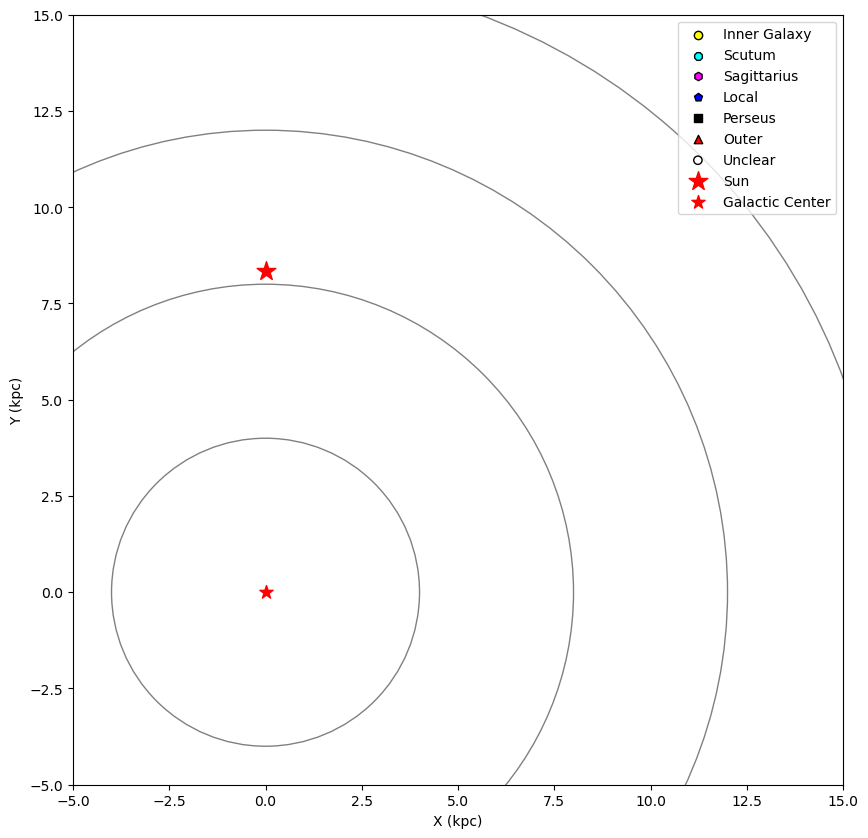

In [422]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Excel dosyasını ve sayfasını okuyun
file_path = '/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/08122023_output.xlsx'
sheet_name = 'Sayfa11'
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Longitude, latitude ve uzaklık verilerini alın
glon = pd.to_numeric(df['Glon'], errors='coerce')
glat = pd.to_numeric(df['Glat'], errors='coerce')
rgeo = pd.to_numeric(df['rgeo'], errors='coerce') / 1000  # parsec'leri kiloparsec'e çevirin
gbilesen = df['Gbileşen']

# Galaktik koordinatları düzlem koordinatlarına dönüştürün
x = rgeo * np.cos(np.radians(glon))
y = rgeo * np.sin(np.radians(glon))

# Spiral kolları ve Güneş'i çizmek için veriler
sun_x, sun_y = 0, 8.34  # Güneş'in konumu
gc_x, gc_y = 0, 0  # Galaktik merkez
spiral_arms = {
    'Inner Galaxy': {'color': 'yellow', 'marker': 'o'},
    'Scutum': {'color': 'cyan', 'marker': '8'},
    'Sagittarius': {'color': 'magenta', 'marker': 'h'},
    'Local': {'color': 'blue', 'marker': 'p'},
    'Perseus': {'color': 'black', 'marker': 's'},
    'Outer': {'color': 'red', 'marker': '^'},
    'Unclear': {'color': 'none', 'marker': 'o'}
}

# Grafiği oluşturun
fig, ax = plt.subplots(figsize=(10, 10))

# Spiral kolları çizin
for arm, prop in spiral_arms.items():
    indices = gbilesen == arm
    ax.scatter(x[indices], y[indices], c=prop['color'], marker=prop['marker'], label=arm, edgecolor='black')

# Güneş ve Galaktik Merkezi Çizin
ax.scatter(sun_x, sun_y, c='red', marker='*', s=200, label='Sun')
ax.scatter(gc_x, gc_y, c='red', marker='*', s=100, label='Galactic Center')

# Galaktik bar ve spiral kolları çizin
radii = [4, 8, 12, 16]  # Gri dairelerin yarıçapları
for radius in radii:
    ax.add_patch(plt.Circle((0, 0), radius, color='gray', fill=False))

# Eksenleri ayarlayın ve etiketleri ekleyin
ax.set_xlim(-5, 15)
ax.set_ylim(-5, 15)
ax.set_xlabel('X (kpc)')
ax.set_ylabel('Y (kpc)')
ax.set_aspect('equal', 'box')
ax.legend()

plt.show()

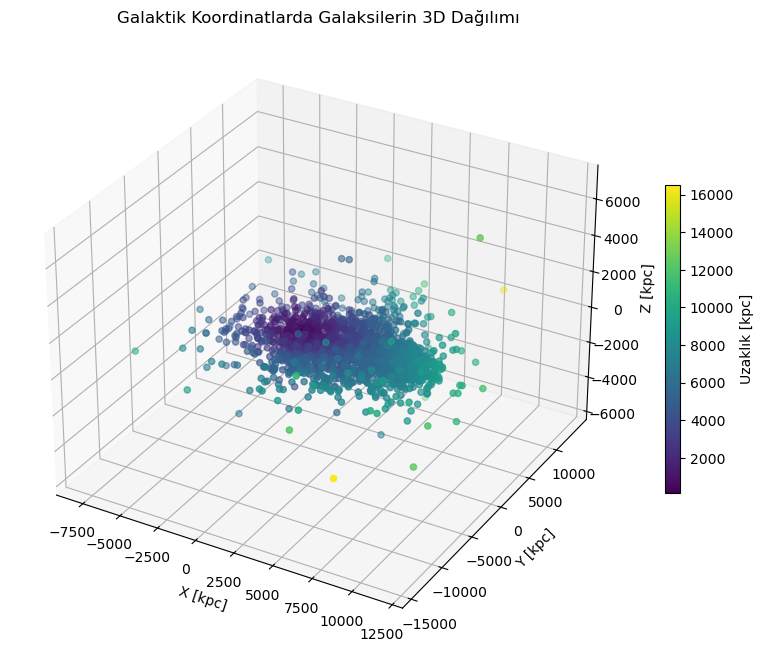

In [430]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Excel dosyasını ve sayfasını okuyun
file_path = '/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/08122023_output.xlsx'
sheet_name = 'Sayfa11'
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Glon, Glat ve rgeo verilerini alın
glon = pd.to_numeric(df['Glon'], errors='coerce')
glat = pd.to_numeric(df['Glat'], errors='coerce')
rgeo = pd.to_numeric(df['rgeo'], errors='coerce')

# Galaktik koordinatları kartesyen koordinatlara çevirme
x = rgeo * np.cos(np.radians(glat)) * np.cos(np.radians(glon))
y = rgeo * np.cos(np.radians(glat)) * np.sin(np.radians(glon))
z = rgeo * np.sin(np.radians(glat))

# 3D grafik oluşturma
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(x, y, z, c=rgeo, cmap='viridis', marker='o')

# Eksen etiketleri ve başlık
ax.set_xlabel('X [kpc]')
ax.set_ylabel('Y [kpc]')
ax.set_zlabel('Z [kpc]')
ax.set_title('Galaktik Koordinatlarda Galaksilerin 3D Dağılımı')

# Renk skalası
cbar = plt.colorbar(sc, ax=ax, shrink=0.5)
cbar.set_label('Uzaklık [kpc]')

plt.show()


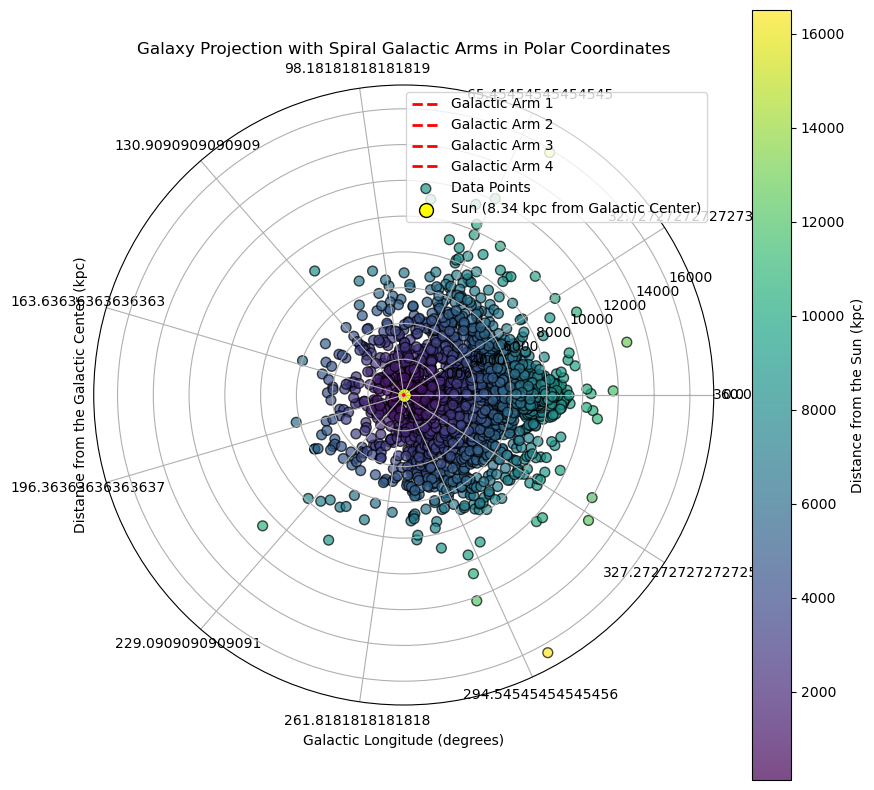

In [445]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Excel dosyasını ve sayfasını okuyun
file_path = '/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/08122023_output.xlsx'
sheet_name = 'Sayfa11'
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Glon, Glat ve rgeo verilerini alın
glon = pd.to_numeric(df['Glon'], errors='coerce')
glat = pd.to_numeric(df['Glat'], errors='coerce')
rgeo = pd.to_numeric(df['rgeo'], errors='coerce')

# Verileri filtrele ve temizle
valid_data = df.dropna(subset=['Glon', 'Glat', 'rgeo'])
glon = valid_data['Glon']
glat = valid_data['Glat']
rgeo = valid_data['rgeo']

# Galaktik kolların uzaklık aralıklarını tanımlayın
num_arms = 4  # Galaktik kolların sayısı
r_max = 15    # Maksimum uzaklık (kpc)
theta = np.linspace(0, 360, 100)  # Derece aralığı

# Polar projeksiyon oluşturun
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(10, 10))

# Spiral galaktik kolları temsili
for arm in range(num_arms):
    arm_theta = np.linspace(0, 360, 100) + (360 / num_arms) * arm  # Her bir kol için açısal kaydırma
    arm_theta = np.deg2rad(arm_theta)  # Dereceleri radianlara çevir
    r_values = np.linspace(0, r_max, 100)  # Spiral uzaklık değerleri
    ax.plot(arm_theta, r_values, color='red', linestyle='--', linewidth=2, label=f'Galactic Arm {arm + 1}')

# Verileri polar koordinat sisteminde plot etme
r = rgeo
theta = np.deg2rad(glon)  # Galaktik uzunlukları radiana çeviriyoruz

# Verilerin görselleştirilmesi
sc = ax.scatter(theta, r, c=r, cmap='viridis', s=50, alpha=0.7, edgecolor='k', label='Data Points')

# Güneş'in konumunu belirleme (yaklaşık 8.34 kpc uzaklıkta, 0 açıda)
sun_distance = 8.34
ax.scatter(0, sun_distance, color='yellow', s=100, edgecolor='k', label='Sun (8.34 kpc from Galactic Center)')

# Eksen etiketleri ve başlık
ax.set_xlabel('Galactic Longitude (degrees)')
ax.set_ylabel('Distance from the Galactic Center (kpc)')
ax.set_title('Galaxy Projection with Spiral Galactic Arms in Polar Coordinates')

# Derece cinsinden etiketler ekleme
ax.set_xticks(np.deg2rad(np.linspace(0, 360, 12)))  # 12 derece aralığında etiket
ax.set_xticklabels(np.linspace(0, 360, 12))  # Etiketleri derece olarak ayarla

# Renk çubuğu ekleme
plt.colorbar(sc, ax=ax, label='Distance from the Sun (kpc)')

# Grid ve açıklamalar
ax.grid(True)
ax.legend(loc='upper right')

plt.show()


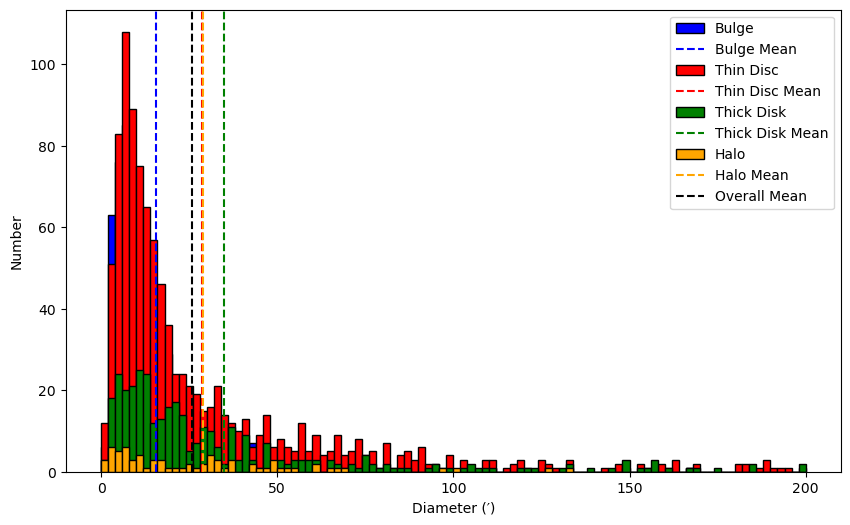

In [523]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from openpyxl import load_workbook

# Excel dosyasını oku
excel_yolu = "/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/08122023_output.xlsx"
renklendirilmis_df = pd.read_excel(excel_yolu, sheet_name='Sayfa11')

# Kullanılacak sütunları seç
rgeo_sutunu = renklendirilmis_df['MajDiam']
gbilesen_sutunu = renklendirilmis_df['Gbileşen']

# Verileri sayısal değerlere dönüştür
rgeo_sutunu = pd.to_numeric(rgeo_sutunu, errors='coerce')

# Filtreleme işlemi: MajDiam değeri 200 ve altında olanları seç
filtered_df = renklendirilmis_df[rgeo_sutunu <= 200]
filtered_rgeo_sutunu = filtered_df['MajDiam']
filtered_gbilesen_sutunu = filtered_df['Gbileşen']

# Renklerin ve etiketlerin belirlenmesi
renk_etiketleri = {
    'Bulge': 'blue',          # Bulge ise mavi
    'Thin Disc': 'red',       # Thin Disc ise kırmızı
    'Thick Disk': 'green',    # Thick Disk ise yeşil
    'Halo': 'orange',         # Halo ise turuncu
}

bins = np.arange(0, 201, 2)  # Histogram aralığı 0'dan 200'e kadar

# Ortalama değerleri saklayacak bir sözlük oluştur
ortalama_degerler = {}

# Histogram verilerini saklayacak bir liste oluştur
hist_data = []

# Her bileşen için histogram verilerini hesapla ve sakla
for component, color in renk_etiketleri.items():
    component_values = filtered_rgeo_sutunu[filtered_gbilesen_sutunu == component]
    counts, bins = np.histogram(component_values, bins=bins)
    hist_data.append((component, counts, bins, color))

    # Ortalama değeri hesapla ve sakla
    mean_value = component_values.mean()
    ortalama_degerler[component] = mean_value

# Verileri sayıya göre sırala: En küçük bin sayısına sahip histogram en önde olacak şekilde
hist_data.sort(key=lambda x: np.min(x[1]))  # En küçük bin sayısına göre sırala

# Tek bir histogram üzerinde tüm bileşenleri çiz
plt.figure(figsize=(10, 6))

for component, counts, bins, color in hist_data:
    plt.hist(bins[:-1], bins=bins, weights=counts, label=component, color=color, edgecolor='black')

    # Ortalama çizgisini ekle (dikey çizgi)
    mean_value = ortalama_degerler[component]
    plt.axvline(x=mean_value, color=color, linestyle='--', label=f'{component} Mean')

# Tüm verilerin ortalamasını hesapla ve çiz
all_mean_value = filtered_rgeo_sutunu.mean()
plt.axvline(x=all_mean_value, color='black', linestyle='--', label='Overall Mean')

# X eksenindeki etiketleri özelleştir
plt.xticks(np.arange(0, 201, 50))  # 0'dan 200'e kadar 50'şer artışlarla

plt.xlabel('Diameter (′)')
plt.ylabel('Number')
plt.legend(title='')

# Grafik dosyası yolunu belirle
#save_path = "/Users/nurullah/Desktop/galaxy_abundance/Uzak_Pc/sigma_5/bilgiislem/deneme/neat_to_excel/MajDiameter.png"
plt.savefig(save_path)

# Grafiği göster
plt.show()

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from matplotlib.backends.backend_pdf import PdfPages

# Excel dosyasını oku
excel_yolu = "/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/bilgiislem/8.34/Disc_Region.xlsx"
neat_result_df = pd.read_excel(excel_yolu, sheet_name='neat_result')
renklendirilmis_df = pd.read_excel(excel_yolu, sheet_name='Sayfa2')

# Renklendirme fonksiyonu
def get_color(component):
    if component == 'Bulge':
        return 'blue'
    elif component == 'Thin Disc':
        return 'red'
    elif component == 'Thick Disk':
        return 'green'
    elif component == 'Halo':
        return 'orange'
    else:
        return None

# Renklendirme bilgilerini ekle
renklendirilmis_df['color'] = renklendirilmis_df['Gbileşen'].apply(get_color)
renk_dict = renklendirilmis_df.set_index('idPNMain')['color'].to_dict()

# Histogramlar için klasör oluştur
klasor_yolu = "/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/bilgiislem/8.34/histogramlar/ort/"
if not os.path.exists(klasor_yolu):
    os.makedirs(klasor_yolu)

# Histogram parametreleri
histogram_parametreleri = {
    'He/H': {'bins': 50, 'range': (0, 0.5)},
    'N/H': {'bins': 50, 'range': (0, 1e-3)},
    'O/H': {'bins': 50, 'range': (0, 3e-3)},
    'Ne/H': {'bins': 50, 'range': (0, 3e-3)},
    'S/H': {'bins': 50, 'range': (0, 3e-5)},
    'Cl/H': {'bins': 50, 'range': (0, 0.6e-5)},
    'Ar/H': {'bins': 50, 'range': (0, 175e-7)}
}

# Renklere karşılık gelen etiketler
renk_etiketleri = {
    'red': 'Thin Disc',
    'green': 'Thick Disc',
    'blue': 'Bulge',
    'orange': 'Halo'
}

# Söz konusu sütunlar
sütunlar = ['He/H', 'N/H', 'O/H', 'Ne/H', 'S/H', 'Cl/H', 'Ar/H']

# PDF dosyasının yolunu belirle
pdf_dosyasi_yolu = os.path.join(klasor_yolu, "total_elementsss.pdf")

# PDF dosyası oluştur
with PdfPages(pdf_dosyasi_yolu) as pdf:
    fig, axs = plt.subplots(4, 2, figsize=(12, 12))  # 3x3 grid
    axs = axs.flatten()

    # Histogramları oluştur ve ekle
    for i, başlık in enumerate(sütunlar):
        ax = axs[i]
        bins = histogram_parametreleri[başlık]['bins']
        range_ = histogram_parametreleri[başlık]['range']
        ortalamalar = {}

        for color, etiket in renk_etiketleri.items():
            filtreli_veri = neat_result_df[neat_result_df['idPNMain'].map(renk_dict) == color][başlık]
            filtreli_veri = filtreli_veri[(filtreli_veri != 0) & (filtreli_veri != 35000)]

            if not filtreli_veri.empty:
                ax.hist(filtreli_veri, bins=bins, range=range_, edgecolor='black', color=color, label=etiket)
                ortalama = filtreli_veri.mean()
                ortalamalar[etiket] = ortalama

        # Ortalama değerleri kesikli çizgilerle göster
        for etiket, ortalama in ortalamalar.items():
            if range_[0] <= ortalama <= range_[1]:
                color = [k for k, v in renk_etiketleri.items() if v == etiket][0]
                ax.axvline(ortalama, color=color, linestyle='dashed', linewidth=1)

        # Plot ayarları
        if başlık in ['c(Hb) (Ha/Hb)', 'c(Hb) (Hg/Hb)', 'c(Hb) (Hd/Hb)']:
            ax.set_xlabel("cH(β)")
        else:
            ax.set_xlabel(başlık)

        ax.set_ylabel("Number")
        ax.legend()

    # Boş olan alt grafikleri kaldır
    for j in range(len(sütunlar), len(axs)):
        fig.delaxes(axs[j])

    # 'Ar/H' histogramını ortada yerleştir
    axs[3], axs[1] = axs[1], axs[3]

    plt.tight_layout()
    pdf.savefig(fig)
    plt.close(fig)

# Kontrol etmek için dosya yolu yazdır
if os.path.exists(pdf_dosyasi_yolu):
    print(f"PDF dosyası başarıyla kaydedildi: {pdf_dosyasi_yolu}")
else:
    print(f"PDF dosyası kaydedilemedi: {pdf_dosyasi_yolu}")


PDF dosyası başarıyla kaydedildi: /Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/bilgiislem/8.34/histogramlar/ort/total_elementsss.pdf


Halo için bin sayıları: [3. 6. 5. 6. 3. 4. 1. 3. 3. 1. 1. 1. 2. 1. 2. 4. 3. 1. 3. 0. 0. 2. 1. 1.
 3. 1. 1. 1. 0. 0. 2. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
Thick Disk için bin sayıları: [ 3. 18. 24. 20. 21. 25. 24. 12. 13. 16. 17. 14.  5.  7. 11. 10.  6.  2.
 11.  3.  9.  3.  1.  7.  1.  3.  2.  3.  3.  3.  3.  0.  3.  2.  1.  2.
  1.  4.  2.  1.  2.  1.  1.  1.  0.  0.  1.  2.  1.  1.  0.  1.  2.  1.
  1.  1.  0.  0.  0.  1.  1.  1.  0.  1.  0.  1.  2.  0.  0.  1.  0.  0.
  1.  0.  3.  0.  1.  1.  3.  0.  1.  0.  0.  1.  1.  0.  0.  1.  0.  0.
  0.  0.  2.  0.  0.  0.  0.  0.  0.  2.]
Bulge için bin sayıları: [ 6. 63. 76. 85. 72. 61. 41. 35. 30. 29. 23. 18. 18. 12.  9.  5.  7. 10.
  8.  3.  3.  7.  5.  3.  5.  1.  0.  1.  3.  0.  0.  1.  1.  0.  2.  1.
  0.  1.  1.  0.  0.  0.  0.  2.  0.  0.  1.  0.  0.  0.  0.  

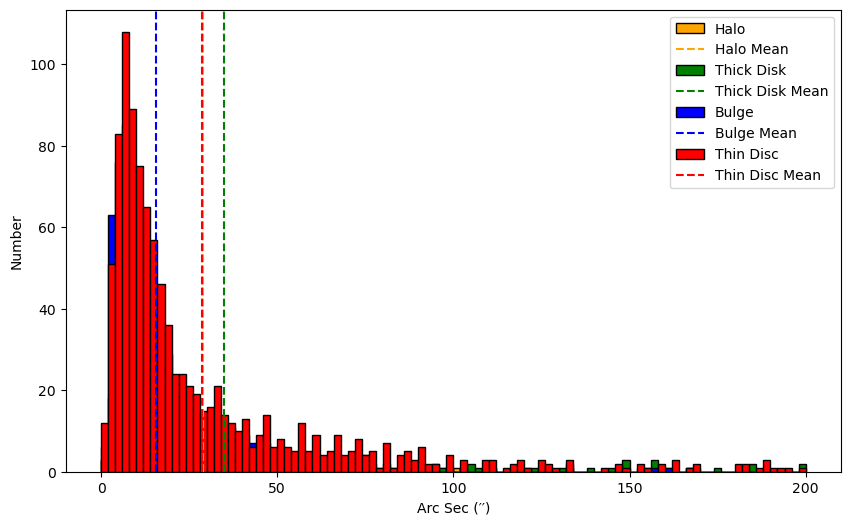

In [512]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from openpyxl import load_workbook

# Excel dosyasını oku
excel_yolu = "/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/08122023_output.xlsx"
renklendirilmis_df = pd.read_excel(excel_yolu, sheet_name='Sayfa11')

# Kullanılacak sütunları seç
rgeo_sutunu = renklendirilmis_df['MajDiam']
gbilesen_sutunu = renklendirilmis_df['Gbileşen']

# Verileri sayısal değerlere dönüştür
rgeo_sutunu = pd.to_numeric(rgeo_sutunu, errors='coerce')

# Filtreleme işlemi: MajDiam değeri 200 ve altında olanları seç
filtered_df = renklendirilmis_df[rgeo_sutunu <= 200]
filtered_rgeo_sutunu = filtered_df['MajDiam']
filtered_gbilesen_sutunu = filtered_df['Gbileşen']

# Renklerin ve etiketlerin belirlenmesi
renk_etiketleri = {
    'Bulge': 'blue',          # Bulge ise mavi
    'Thin Disc': 'red',       # Thin Disc ise kırmızı
    'Thick Disk': 'green',    # Thick Disk ise yeşil
    'Halo': 'orange',         # Halo ise turuncu
}

bins = np.arange(0, 201, 2)  # Histogram aralığı 0'dan 200'e kadar

# Bileşenleri veri sayısına göre sıralama
sorted_components = sorted(renk_etiketleri.keys(), key=lambda x: (filtered_gbilesen_sutunu == x).sum())

# Tek bir histogram üzerinde tüm bileşenleri çiz
plt.figure(figsize=(10, 6))

# Ortalama değerleri saklayacak bir sözlük oluştur
ortalama_degerler = {}

for component in sorted_components:
    color = renk_etiketleri[component]
    component_values = filtered_rgeo_sutunu[filtered_gbilesen_sutunu == component]
    counts, bins, patches = plt.hist(component_values, bins=bins, label=component, color=color, edgecolor='black')
    
    # Ortalama değeri hesapla ve sakla
    mean_value = component_values.mean()
    ortalama_degerler[component] = mean_value
    
    # Ortalama çizgisini ekle (dikey çizgi)
    plt.axvline(x=mean_value, color=color, linestyle='--', label=f'{component} Mean')

    print(f"{component} için bin sayıları: {counts}")

# X eksenindeki etiketleri özelleştir
plt.xticks(np.arange(0, 201, 50))  # 0'dan 200'e kadar 50'şer artışlarla

plt.xlabel('Arc Sec (′′)')
plt.ylabel('Number')
plt.legend(title='')

# Grafik dosyası yolunu belirle
save_path = "/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/bilgiislem/8.34/MajDiameter.png"
plt.savefig(save_path)

# Grafiği göster
plt.show()


In [517]:
from astropy.io import fits

# Specify the path to your FITS file
fits_file_path = '/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/bilgiislem/neat_out/SAAO202005_St58_SA140520_id32346.fits_lines.fits'

# Open the FITS file
with fits.open(fits_file_path) as hdul:
    # You can access the data in the FITS file
    # For example, printing the information about the FITS file:
    hdul.info()
    
    # You can access different HDU (Header Data Unit) in the FITS file
    # For example, to access the primary HDU (usually the first one):
    primary_hdu = hdul[2]

    # You can access the data and header of the primary HDU
    data = primary_hdu.data
    header = primary_hdu.header

    # You can also print the header and data to see the details
    print("Header:")
    print(repr(header))
    print("Data:")
    print(data)

Filename: /Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/bilgiislem/neat_out/SAAO202005_St58_SA140520_id32346.fits_lines.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       9   ()      
  1  LINES         1 BinTableHDU     51   43R x 18C   [1E, 1E, 1E, 1E, 1E, 1E, 16A, 16A, 16A, 16A, 1I, 1I, 1E, 1E, 1E, 1E, 1E, 1E]   
  2  RESULTS       1 BinTableHDU     21   166R x 4C   [40A, 1E, 1E, 1E]   
  3  QC            1 BinTableHDU     13   1R x 2C   [1L, 1L]   
Header:
XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                   52 / width of table in bytes                        
NAXIS2  =                  166 / number of rows in table                        
PCOUNT  =                    0 / size of special data area        

In [514]:
import numpy as np
from astropy.io import fits
import os

# FITS dosyalarının bulunduğu dizin
directory_path = '/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/bilgiislem/neat_out/'

# Analiz yapmak istediğin sütun adı
column_name = 'DereddenedFlux'

# Tüm FITS dosyalarını işle
min_value = float('inf')
max_value = float('-inf')

for file_name in os.listdir(directory_path):
    if file_name.endswith('.fits'):
        file_path = os.path.join(directory_path, file_name)
        with fits.open(file_path) as hdul:
            data = hdul[1].data
            
            if column_name in data.names:
                column_data = data[column_name]
                
                # Dosya bazında min ve max değerleri bul
                file_min = np.min(column_data)
                file_max = np.max(column_data)
                
                # Genel min ve max değerleri güncelle
                if file_min < min_value:
                    min_value = file_min
                    min_file = file_name
                if file_max > max_value:
                    max_value = file_max
                    max_file = file_name

print(f"Tüm dosyalar arasındaki en küçük değer: {min_value}, Dosya: {min_file}")
print(f"Tüm dosyalar arasındaki en büyük değer: {max_value}, Dosya: {max_file}")

Tüm dosyalar arasındaki en küçük değer: 0.0, Dosya: StenholmAcker_pn_g060_5-00_3_id499.fits_lines.fits
Tüm dosyalar arasındaki en büyük değer: 23400.0, Dosya: SAAO202005_St58_SA140520_id32346.fits_lines.fits


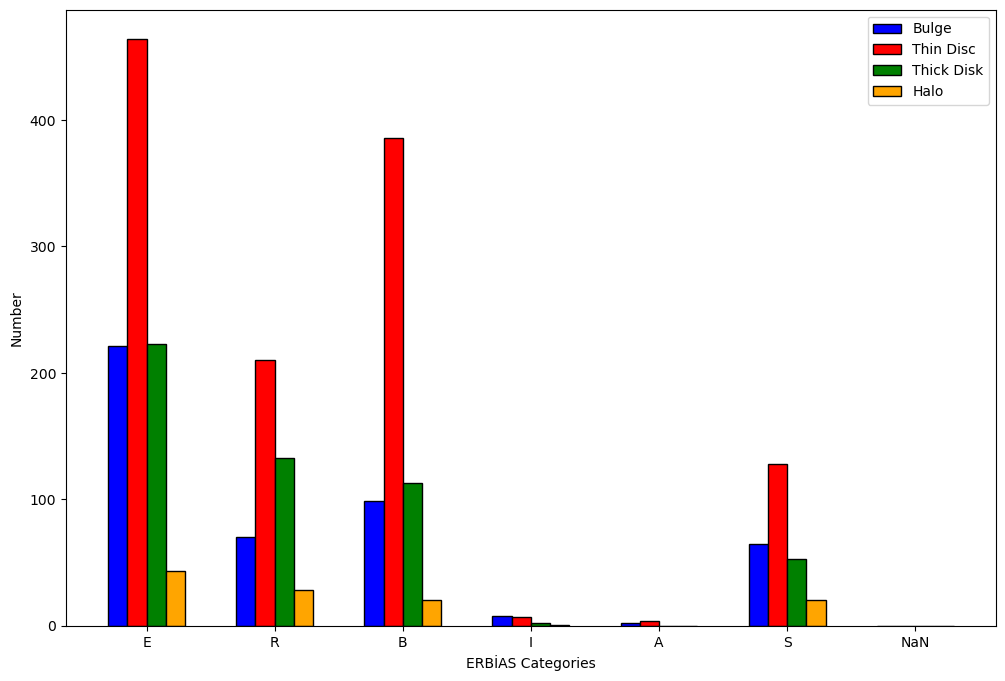

In [535]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Excel dosyasını oku
excel_yolu = "/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/bilgiislem/8.34/Disc_Region.xlsx"
df = pd.read_excel(excel_yolu, sheet_name='düşeyara')

# Kullanılacak sütunları seç
erbias_sutunu = df['ERBİAS']
gbilesen_sutunu = df['Gbileşen']

# '0' olan değerleri 'NaN' ile değiştir
erbias_sutunu.replace(0, np.nan, inplace=True)

# Kategori renklerini tanımla
renk_etiketleri = {
    'Bulge': 'blue',          # Bulge ise mavi
    'Thin Disc': 'red',       # Thin Disc ise kırmızı
    'Thick Disk': 'green',    # Thick Disk ise yeşil
    'Halo': 'orange',         # Halo ise turuncu
}

# E, R, B, İ, A, S kategorilerini ve NaN (eski 0) için histogram oluştur
categories = ['E', 'R', 'B', 'I', 'A', 'S', np.nan]
category_names = ['E', 'R', 'B', 'I', 'A', 'S', 'NaN']

# Histogramın genel özellikleri
bar_width = 0.15  # Her bir bileşen için sütun genişliği
x_positions = np.arange(len(categories))  # Her kategori için x eksenindeki pozisyonlar
offset = np.zeros_like(x_positions, dtype=float)  # Her kategori için başlangıçta kaydırma 0

plt.figure(figsize=(12, 8))

# Her bileşen için sütunları çiz
for component, color in renk_etiketleri.items():
    counts = []
    
    for category in categories:
        filtered_gbilesen_sutunu = gbilesen_sutunu[erbias_sutunu == category]
        component_count = filtered_gbilesen_sutunu[filtered_gbilesen_sutunu == component].count()
        counts.append(component_count)
    
    # Sütunları çiz
    plt.bar(x_positions + offset, counts, bar_width, color=color, edgecolor='black', label=component)
    offset += bar_width  # Sonraki bileşen için kaydırmayı artır

# X eksenini özelleştir
plt.xticks(x_positions + bar_width * 1.5, category_names)  # Kategorileri ortalamak için kaydırma
plt.xlabel('ERBİAS Categories')
plt.ylabel('Number')
plt.legend(loc='upper right')

# Grafik dosyası yolunu belirle
#save_path = "/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/bilgiislem/8.34/ERBIAS_Gbilesen_BarChart.png"
plt.savefig(save_path, bbox_inches='tight')

# Grafiği göster
plt.show()


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (7,) and arg 1 with shape (6,).

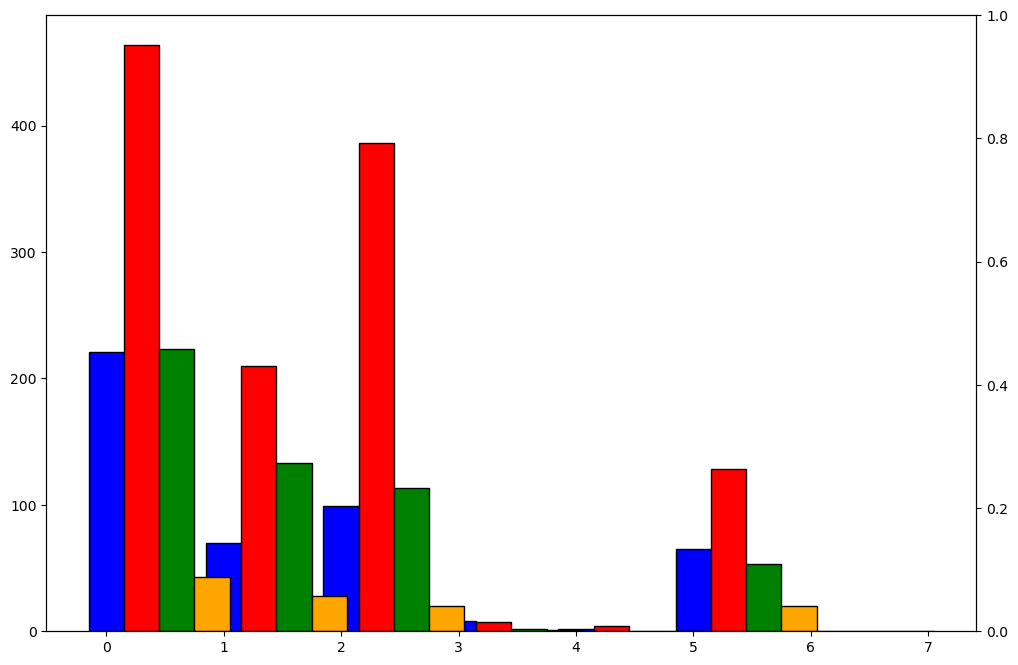

In [537]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Excel dosyasını oku
excel_yolu = "/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/bilgiislem/8.34/Disc_Region.xlsx"
df = pd.read_excel(excel_yolu, sheet_name='düşeyara')

# Kullanılacak sütunları seç
erbias_sutunu = df['ERBİAS']
sparm_sutunu = df['SPARM']
gbilesen_sutunu = df['Gbileşen']

# '0' olan değerleri 'NaN' ile değiştir
erbias_sutunu.replace(0, np.nan, inplace=True)
sparm_sutunu.replace(0, np.nan, inplace=True)

# Kategori renklerini tanımla
renk_etiketleri = {
    'Bulge': 'blue',          # Bulge için mavi
    'Thin Disc': 'red',       # Thin Disc için kırmızı
    'Thick Disk': 'green',    # Thick Disk için yeşil
    'Halo': 'orange',         # Halo için turuncu
}

# E, R, B, I, A, S kategorilerini ve NaN (eski 0) için histogram oluştur
erbias_categories = ['E', 'R', 'B', 'I', 'A', 'S', np.nan]
sparm_categories = ['s', 'p', 'a', 'r', 'm', np.nan]
erbias_category_names = ['E', 'R', 'B', 'I', 'A', 'S', 'NaN']
sparm_category_names = ['s', 'p', 'a', 'r', 'm', 'NaN']

# Histogramın genel özellikleri
bar_width = 0.3  # Her bir bileşen için sütun genişliği
x_positions = np.arange(len(erbias_categories))  # Her kategori için x eksenindeki pozisyonlar

# Yeni bir şekil oluştur ve iki tane subplot (üst üste) ekle
fig, ax1 = plt.subplots(figsize=(12, 8))
ax2 = ax1.twinx()  # Aynı x ekseni için ikinci y ekseni

# İlk histogram: ERBİAS verileri
offset1 = np.zeros_like(x_positions, dtype=float)

for component, color in renk_etiketleri.items():
    counts = []
    
    for category in erbias_categories:
        filtered_gbilesen_sutunu = gbilesen_sutunu[erbias_sutunu == category]
        component_count = filtered_gbilesen_sutunu[filtered_gbilesen_sutunu == component].count()
        counts.append(component_count)
    
    # Sütunları çiz
    ax1.bar(x_positions + offset1, counts, bar_width, color=color, edgecolor='black', label=f'ERBİAS - {component}')
    offset1 += bar_width  # Sonraki bileşen için kaydırmayı artır

# İkinci histogram: SPARM verileri
offset2 = np.zeros_like(x_positions, dtype=float)

for component, color in renk_etiketleri.items():
    counts = []
    
    for category in sparm_categories:
        filtered_gbilesen_sutunu = gbilesen_sutunu[sparm_sutunu == category]
        component_count = filtered_gbilesen_sutunu[filtered_gbilesen_sutunu == component].count()
        counts.append(component_count)
    
    # Sütunları çiz
    ax2.bar(x_positions + offset2, counts, bar_width, color=color, edgecolor='black', alpha=0.6, label=f'SPARM - {component}')
    offset2 += bar_width  # Sonraki bileşen için kaydırmayı artır

# X eksenini özelleştir
ax1.set_xticks(x_positions + bar_width * 1.5)  # Kategorileri ortalamak için kaydırma
ax1.set_xticklabels(erbias_category_names + sparm_category_names)
ax1.set_xlabel('Categories')

# Y eksenlerini etiketle
ax1.set_ylabel('ERBİAS Count')
ax2.set_ylabel('SPARM Count')

# Legend ekle
ax1.legend(loc='upper right')
ax2.legend(loc='lower right')

# Grafik dosyası yolunu belirle
#save_path = "/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/bilgiislem/8.34/combined_ERBIAS_SPARM.png"
plt.savefig(save_path, bbox_inches='tight')

# Grafiği göster
plt.show()


ValueError: The number of FixedLocator locations (7), usually from a call to set_ticks, does not match the number of labels (14).

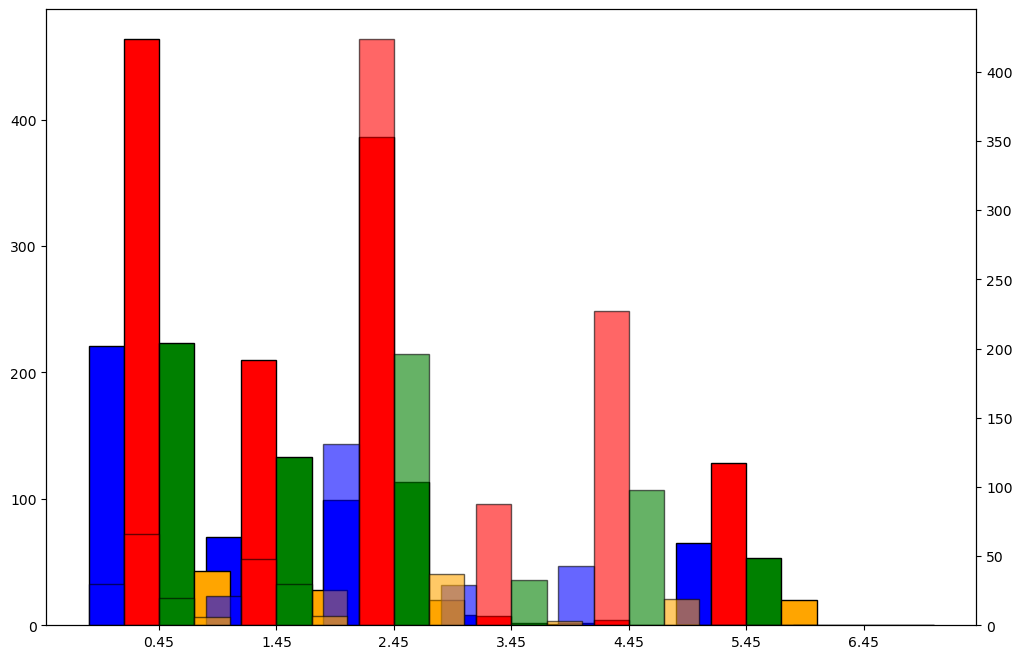

In [538]:
### ERBIAS sparm birleştirmeye çalıştım

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Excel dosyasını oku
excel_yolu = "/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/bilgiislem/8.34/Disc_Region.xlsx"
df = pd.read_excel(excel_yolu, sheet_name='düşeyara')

# Kullanılacak sütunları seç
erbias_sutunu = df['ERBİAS']
sparm_sutunu = df['SPARM']
gbilesen_sutunu = df['Gbileşen']

# '0' olan değerleri 'NaN' ile değiştir
erbias_sutunu.replace(0, np.nan, inplace=True)
sparm_sutunu.replace(0, np.nan, inplace=True)

# Kategori renklerini tanımla
renk_etiketleri = {
    'Bulge': 'blue',          # Bulge için mavi
    'Thin Disc': 'red',       # Thin Disc için kırmızı
    'Thick Disk': 'green',    # Thick Disk için yeşil
    'Halo': 'orange',         # Halo için turuncu
}

# E, R, B, I, A, S kategorilerini ve NaN (eski 0) için histogram oluştur
erbias_categories = ['E', 'R', 'B', 'I', 'A', 'S', np.nan]
sparm_categories = ['s', 'p', 'a', 'r', 'm', None, np.nan]  # SPARM kategorisine bir tane boş kategori ekliyoruz
erbias_category_names = ['E', 'R', 'B', 'I', 'A', 'S', 'NaN']
sparm_category_names = ['s', 'p', 'a', 'r', 'm', '', 'NaN']  # Boş kategori için boş bir ad ekliyoruz

# Histogramın genel özellikleri
bar_width = 0.3  # Her bir bileşen için sütun genişliği
x_positions = np.arange(len(erbias_categories))  # Her kategori için x eksenindeki pozisyonlar

# Yeni bir şekil oluştur ve iki tane subplot (üst üste) ekle
fig, ax1 = plt.subplots(figsize=(12, 8))
ax2 = ax1.twinx()  # Aynı x ekseni için ikinci y ekseni

# İlk histogram: ERBİAS verileri
offset1 = np.zeros_like(x_positions, dtype=float)

for component, color in renk_etiketleri.items():
    counts = []
    
    for category in erbias_categories:
        filtered_gbilesen_sutunu = gbilesen_sutunu[erbias_sutunu == category]
        component_count = filtered_gbilesen_sutunu[filtered_gbilesen_sutunu == component].count()
        counts.append(component_count)
    
    # Sütunları çiz
    ax1.bar(x_positions + offset1, counts, bar_width, color=color, edgecolor='black', label=f'ERBİAS - {component}')
    offset1 += bar_width  # Sonraki bileşen için kaydırmayı artır

# İkinci histogram: SPARM verileri
offset2 = np.zeros_like(x_positions, dtype=float)

for component, color in renk_etiketleri.items():
    counts = []
    
    for category in sparm_categories:
        filtered_gbilesen_sutunu = gbilesen_sutunu[sparm_sutunu == category]
        component_count = filtered_gbilesen_sutunu[filtered_gbilesen_sutunu == component].count()
        counts.append(component_count)
    
    # Sütunları çiz
    ax2.bar(x_positions + offset2, counts, bar_width, color=color, edgecolor='black', alpha=0.6, label=f'SPARM - {component}')
    offset2 += bar_width  # Sonraki bileşen için kaydırmayı artır

# X eksenini özelleştir
ax1.set_xticks(x_positions + bar_width * 1.5)  # Kategorileri ortalamak için kaydırma
ax1.set_xticklabels(erbias_category_names + sparm_category_names)
ax1.set_xlabel('Categories')

# Y eksenlerini etiketle
ax1.set_ylabel('ERBİAS Count')
ax2.set_ylabel('SPARM Count')

# Legend ekle
ax1.legend(loc='upper right')
ax2.legend(loc='lower right')

# Grafik dosyası yolunu belirle
#save_path = "/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/bilgiislem/8.34/combined_ERBIAS_SPARM.png"
plt.savefig(save_path, bbox_inches='tight')

# Grafiği göster
plt.show()


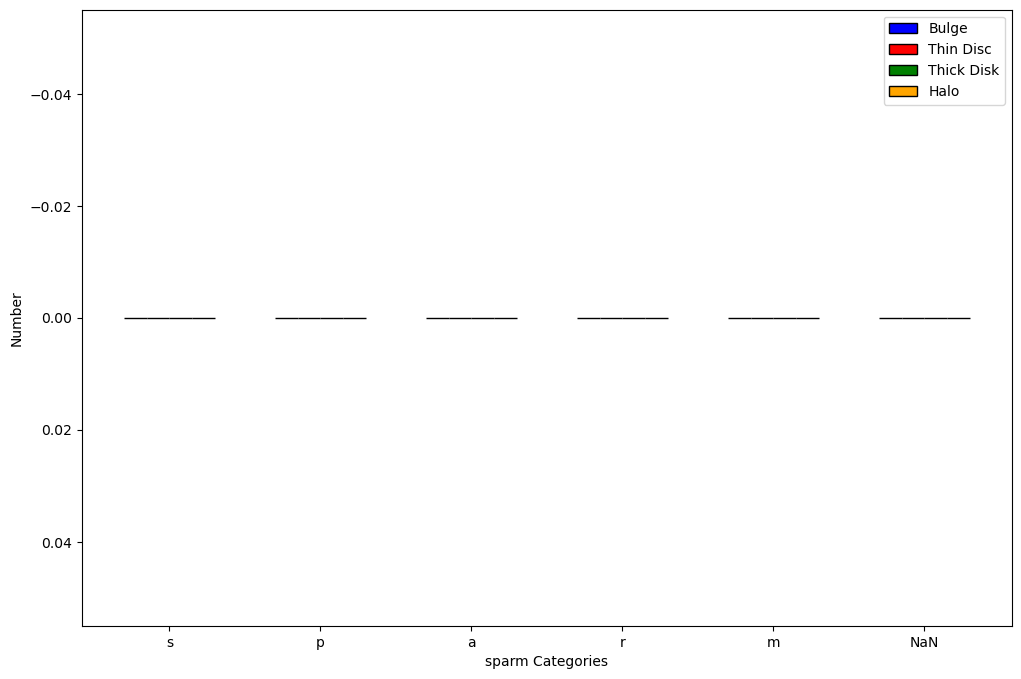

In [171]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages

# Excel dosyasını oku
excel_yolu = "/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/bilgiislem/8.34/Disc_Region.xlsx"
renklendirilmis_df = pd.read_excel(excel_yolu, sheet_name='düşeyara')

# Kullanılacak sütunları seç
rgeo_sutunu = renklendirilmis_df['MajDiam']
gbilesen_sutunu = renklendirilmis_df['Gbileşen']

# Verileri sayısal değerlere dönüştür
rgeo_sutunu = pd.to_numeric(rgeo_sutunu, errors='coerce')

# Filtreleme işlemi: MajDiam değeri 200 ve altında olanları seç
filtered_df = renklendirilmis_df[rgeo_sutunu <= 200]
filtered_rgeo_sutunu = filtered_df['MajDiam']
filtered_gbilesen_sutunu = filtered_df['Gbileşen']

# Renklerin ve etiketlerin belirlenmesi
renk_etiketleri = {
    'Bulge': 'blue',          # Bulge ise mavi
    'Thin Disc': 'red',       # Thin Disc ise kırmızı
    'Thick Disk': 'green',    # Thick Disk ise yeşil
    'Halo': 'orange',         # Halo ise turuncu
}

bins = np.arange(0, 201, 2)  # Histogram aralığı 0'dan 200'e kadar

# Histogram verilerini saklayacak bir liste oluştur
hist_data = []

# Her bileşen için histogram verilerini hesapla ve sakla
for component, color in renk_etiketleri.items():
    component_values = filtered_rgeo_sutunu[filtered_gbilesen_sutunu == component]
    counts, _ = np.histogram(component_values, bins=bins)
    hist_data.append((component, counts, color))

# Her bins değeri için bileşenlerin toplam sayısına göre sıralama yaparak çizim işlemi
pdf_path = "/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/bilgiislem/8.34/histogramlar/ort/Sssorted_Histogram.pdf"
with PdfPages(pdf_path) as pdf:

    plt.figure(figsize=(10, 6))

    for i in range(len(bins) - 1):
        # Her bins değeri için bileşenleri toplam sayıya göre sıralıyoruz
        sorted_components = sorted(hist_data, key=lambda x: x[1][i])
        bottom = np.zeros(len(bins) - 1)

        for component, counts, color in sorted_components:
            plt.bar(bins[i], counts[i], width=bins[1] - bins[0], color=color, edgecolor='black', bottom=bottom[i])

            # Mevcut histogram değerini alt tabana ekle (birikim için)
            bottom[i] += counts[i]

    # X eksenindeki etiketleri özelleştir
    plt.xticks(np.arange(0, 201, 50))  # 0'dan 200'e kadar 50'şer artışlarla

    plt.xlabel('Diameter (′′)')
    plt.ylabel('Number')
    plt.legend([component for component, _, _ in hist_data], title='Components')

    # Sayfayı PDF dosyasına kaydet
    pdf.savefig()
    plt.close()

print(f"Sorted histogram saved to {pdf_path}")

Sorted histogram saved to /Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/bilgiislem/8.34/histogramlar/ort/Sssorted_Histogram.pdf


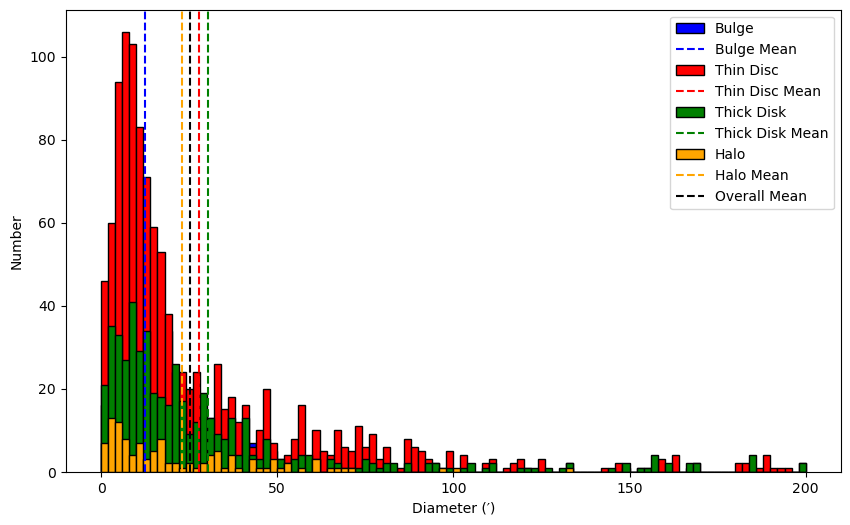

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Excel dosyasını oku
excel_yolu = "/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/bilgiislem/8.34/Disc_Region.xlsx"
renklendirilmis_df = pd.read_excel(excel_yolu, sheet_name='düşeyara')

# Kullanılacak sütunları seç
rgeo_sutunu = renklendirilmis_df['MajDiam']
gbilesen_sutunu = renklendirilmis_df['Gbileşen']

# Verileri sayısal değerlere dönüştür
rgeo_sutunu = pd.to_numeric(rgeo_sutunu, errors='coerce')

# Filtreleme işlemi: MajDiam değeri 200 ve altında olanları seç
filtered_df = renklendirilmis_df[rgeo_sutunu <= 200]
filtered_rgeo_sutunu = filtered_df['MajDiam']
filtered_gbilesen_sutunu = filtered_df['Gbileşen']

# Renklerin ve etiketlerin belirlenmesi
renk_etiketleri = {
    'Bulge': 'blue',          # Bulge ise mavi
    'Thin Disc': 'red',       # Thin Disc ise kırmızı
    'Thick Disk': 'green',    # Thick Disk ise yeşil
    'Halo': 'orange',         # Halo ise turuncu
}

bins = np.arange(0, 201, 2)  # Histogram aralığı 0'dan 200'e kadar

# Ortalama değerleri saklayacak bir sözlük oluştur
ortalama_degerler = {}

# Histogram verilerini saklayacak bir liste oluştur
hist_data = []

# Her bileşen için histogram verilerini hesapla ve sakla
for component, color in renk_etiketleri.items():
    component_values = filtered_rgeo_sutunu[filtered_gbilesen_sutunu == component]
    counts, bins = np.histogram(component_values, bins=bins)
    hist_data.append((component, counts, bins, color))

    # Ortalama değeri hesapla ve sakla
    mean_value = component_values.mean()
    ortalama_degerler[component] = mean_value

# Verileri bin sayısına göre sırala (en küçükten büyüğe)
hist_data.sort(key=lambda x: np.min(x[1]), reverse=True)  # En büyük bin sayısına göre sırala

# Tek bir histogram üzerinde tüm bileşenleri çiz
plt.figure(figsize=(10, 6))

for component, counts, bins, color in hist_data:
    plt.hist(bins[:-1], bins=bins, weights=counts, label=component, color=color, edgecolor='black')

    # Ortalama çizgisini ekle (dikey çizgi)
    mean_value = ortalama_degerler[component]
    plt.axvline(x=mean_value, color=color, linestyle='--', label=f'{component} Mean')

# Tüm verilerin ortalamasını hesapla ve çiz
all_mean_value = filtered_rgeo_sutunu.mean()
plt.axvline(x=all_mean_value, color='black', linestyle='--', label='Overall Mean')

# X eksenindeki etiketleri özelleştir
plt.xticks(np.arange(0, 201, 50))  # 0'dan 200'e kadar 50'şer artışlarla

plt.xlabel('Diameter (′)')
plt.ylabel('Number')
plt.legend(title='')

# Grafik dosyası yolunu belirle
save_path = "/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/bilgiislem/8.34/histogramlar/ort/MajDiameter.png"
plt.savefig(save_path)

# Grafiği göster
plt.show()


Bin 1 (0.0-0.1):
  Bulge: 115
  Thin Disc: 312
  Thick Disk: 125
  Halo: 34
  No Distance: 0

Bin 2 (0.1-0.2):
  Bulge: 69
  Thin Disc: 181
  Thick Disk: 91
  Halo: 26
  No Distance: 0

Bin 3 (0.2-0.30000000000000004):
  Bulge: 62
  Thin Disc: 153
  Thick Disk: 65
  Halo: 15
  No Distance: 0

Bin 4 (0.30000000000000004-0.4):
  Bulge: 56
  Thin Disc: 113
  Thick Disk: 37
  Halo: 5
  No Distance: 0

Bin 5 (0.4-0.5):
  Bulge: 26
  Thin Disc: 79
  Thick Disk: 39
  Halo: 5
  No Distance: 0

Bin 6 (0.5-0.6000000000000001):
  Bulge: 33
  Thin Disc: 57
  Thick Disk: 30
  Halo: 4
  No Distance: 0

Bin 7 (0.6000000000000001-0.7000000000000001):
  Bulge: 21
  Thin Disc: 34
  Thick Disk: 23
  Halo: 3
  No Distance: 0

Bin 8 (0.7000000000000001-0.8):
  Bulge: 19
  Thin Disc: 36
  Thick Disk: 14
  Halo: 4
  No Distance: 0

Bin 9 (0.8-0.9):
  Bulge: 8
  Thin Disc: 46
  Thick Disk: 17
  Halo: 2
  No Distance: 0

Bin 10 (0.9-1.0):
  Bulge: 7
  Thin Disc: 27
  Thick Disk: 15
  Halo: 2
  No Distance: 0



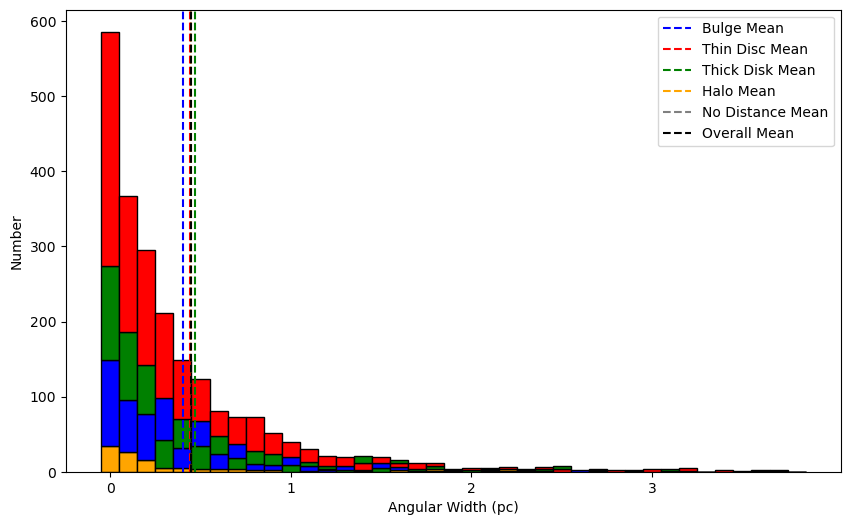

In [167]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Excel dosyasını oku
excel_yolu = "/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/bilgiislem/8.34/Disc_Region.xlsx"
renklendirilmis_df = pd.read_excel(excel_yolu, sheet_name='düşeyara')

# Kullanılacak sütunları seç
acisal_genislik_sutunu = renklendirilmis_df['Açısal_genişlik']
gbilesen_sutunu = renklendirilmis_df['Gbileşen']

# Verileri sayısal değerlere dönüştür
acisal_genislik_sutunu = pd.to_numeric(acisal_genislik_sutunu, errors='coerce')

# Filtreleme işlemi: Açısal_genişlik değeri 4'ten küçük olanları seç
filtered_df = renklendirilmis_df[acisal_genislik_sutunu < 4]
filtered_acisal_genislik_sutunu = filtered_df['Açısal_genişlik']
filtered_gbilesen_sutunu = filtered_df['Gbileşen']

# Renklerin ve etiketlerin belirlenmesi
renk_etiketleri = {
    'Bulge': 'blue',          # Bulge ise mavi
    'Thin Disc': 'red',       # Thin Disc ise kırmızı
    'Thick Disk': 'green',    # Thick Disk ise yeşil
    'Halo': 'orange',         # Halo ise turuncu
    'No Distance': 'gray'     # No Distance ise gri
}

# Histogram için bin aralıkları (0'dan 4'e kadar)
bins = np.arange(0, 4, 0.1)  # Histogram aralığı 0'dan 4'e kadar, 0.1 artışlarla

# Ortalama değerleri saklayacak bir sözlük oluştur
ortalama_degerler = {}

# Histogram verilerini saklayacak bir liste oluştur
hist_data = []

# Her bileşen için histogram verilerini hesapla ve sakla
for component, color in renk_etiketleri.items():
    component_values = filtered_acisal_genislik_sutunu[filtered_gbilesen_sutunu == component]
    counts, _ = np.histogram(component_values, bins=bins)
    hist_data.append((component, counts, bins, color))

    # Ortalama değeri hesapla ve sakla
    mean_value = component_values.mean()
    ortalama_degerler[component] = mean_value

# Tek bir histogram üzerinde tüm bileşenleri "sorted stacked" şekilde çiz
plt.figure(figsize=(10, 6))

# Binler arasında döngü yaparak her bir bileşeni en az sayıda olanı önde olacak şekilde çizdir
for i in range(len(bins) - 1):
    # Mevcut bin için tüm bileşenleri sırala (en küçükten en büyüğe)
    sorted_hist_data = sorted(hist_data, key=lambda x: x[1][i])
    bottom = np.zeros(len(bins) - 1)
    
    for component, counts, bins, color in sorted_hist_data:
        plt.bar(bins[:-1][i], counts[i], width=bins[i+1] - bins[i], color=color, edgecolor='black', bottom=bottom[i])
        bottom += counts

    # Her bin aralığında sayıları yazdır
    print(f"Bin {i+1} ({bins[i]}-{bins[i+1]}):")
    for component, counts, _, _ in hist_data:
        print(f"  {component}: {counts[i]}")
    print()

# Her bileşen için ortalama çizgisini ekle
for component, mean_value in ortalama_degerler.items():
    plt.axvline(x=mean_value, color=renk_etiketleri[component], linestyle='--', label=f'{component} Mean')

# Tüm verilerin ortalamasını hesapla ve çiz
all_mean_value = filtered_acisal_genislik_sutunu.mean()
plt.axvline(x=all_mean_value, color='black', linestyle='--', label='Overall Mean')

# X eksenindeki etiketleri özelleştir
plt.xticks(np.arange(0, 4, 1))  # 0'dan 4'e kadar 1'er artışlarla

plt.xlabel('Angular Width (pc)')
plt.ylabel('Number')
plt.legend(title='')

# Grafik dosyası yolunu belirle
save_path = "/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/bilgiislem/8.34/histogramlar/ort/AngularWidth.png"
plt.savefig(save_path)

# Grafiği göster
plt.show()


In [3]:
import pandas as pd

# Dosyayı satır satır okuyarak bir listeye alalım
file_path = '/Users/nurullah/Desktop/galaxy_abudance/vizier_distance.tsv'

# Verileri saklamak için boş liste
data = []

# Dosyayı açıp satır satır okuyalım
with open(file_path, 'r') as file:
    for line in file:
        # Her satırı ayırarak listeye ekle
        data.append(line.strip().split('\t'))

# DataFrame oluşturma
df = pd.DataFrame(data)

# Aranan üç satır
row1 = ['_r', '_RAJ2000', '_DEJ2000', 'Source', 'RA_ICRS', 'DE_ICRS', 'rgeo', 'b_rgeo', 'B_rgeo', 'rpgeo', 'b_rpgeo', 'B_rpgeo', 'Flag']
row2 = ['arcmin', 'deg', 'deg', '', 'deg', 'deg', 'pc', 'pc', 'pc', 'pc', 'pc', 'pc', '']
row3 = ['------', '-----------------', '-----------------', '-------------------', '---------------', '---------------', '---------------', '--------------', '--------------', '---------------', '--------------', '--------------', '-----']

# Sonuçları saklamak için liste
result_rows = []

# Dosyadaki satırları kontrol et
for i in range(len(df) - 3):
    if (df.iloc[i].tolist() == row1 and
        df.iloc[i + 1].tolist() == row2 and
        df.iloc[i + 2].tolist() == row3):
        # Eğer aranan üç satır bulunursa, dördüncü satırı ekle
        result_rows.append(df.iloc[i + 3])

# Seçilen satırları yeni bir DataFrame'e aktar
if result_rows:
    result_df = pd.DataFrame(result_rows)
    # Verileri Excel dosyasına kaydet
    output_file_path = '/Users/nurullah/Desktop/galaxy_abudance/output.xlsx'
    result_df.to_excel(output_file_path, index=False, header=False, sep=';')
    print(f"Veriler {output_file_path} dosyasına kaydedildi.")
else:
    print("Aranan satırlar bulunamadı.")

Aranan satırlar bulunamadı.


In [8]:
import os
import pandas as pd

# CSV dosyalarının bulunduğu klasör yolu
klasor_yolu = "/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/GPNE/CSV/"

# En fazla satıra sahip dosyayı ve satır sayısını tutmak için değişkenler
en_fazla_satir_sayisi = 0
en_fazla_satirli_dosya = ""

# Klasördeki her CSV dosyasını kontrol et
for dosya_adi in os.listdir(klasor_yolu):
    if dosya_adi.endswith(".csv"):
        dosya_yolu = os.path.join(klasor_yolu, dosya_adi)
        
        # CSV dosyasını oku ve satır sayısını al
        try:
            df = pd.read_csv(dosya_yolu, encoding="ISO-8859-1")  # Alternatif olarak "cp1252" kullanabilirsiniz.
            satir_sayisi = len(df)
        except UnicodeDecodeError:
            print(f"Dosya okunamadı: {dosya_adi}")
            continue
        
        # En fazla satıra sahip dosya ile karşılaştır
        if satir_sayisi > en_fazla_satir_sayisi:
            en_fazla_satir_sayisi = satir_sayisi
            en_fazla_satirli_dosya = dosya_adi

# Sonucu göster
print(f"En fazla satıra sahip dosya: {en_fazla_satirli_dosya}")
print(f"Toplam satır sayısı: {en_fazla_satir_sayisi}")


En fazla satıra sahip dosya: 3238.csv
Toplam satır sayısı: 43


In [10]:
import os

# txt dosyalarının bulunduğu klasör yolu
klasor_yolu = "/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/lines/"

# En fazla ve en az satıra sahip dosyaları ve satır sayılarını tutmak için değişkenler
en_fazla_satir_sayisi = 0
en_fazla_satirli_dosya = ""
en_az_satir_sayisi = float('inf')
en_az_satirli_dosya = ""

# Klasördeki her txt dosyasını kontrol et
for dosya_adi in os.listdir(klasor_yolu):
    if dosya_adi.endswith(""):
        dosya_yolu = os.path.join(klasor_yolu, dosya_adi)
        
        # txt dosyasını oku ve satır sayısını al
        try:
            with open(dosya_yolu, 'r', encoding="utf-8") as dosya:
                satir_sayisi = sum(1 for _ in dosya)
        except UnicodeDecodeError:
            print(f"Dosya okunamadı: {dosya_adi}")
            continue
        
        # En fazla satıra sahip dosya ile karşılaştır
        if satir_sayisi > en_fazla_satir_sayisi:
            en_fazla_satir_sayisi = satir_sayisi
            en_fazla_satirli_dosya = dosya_adi
        
        # En az satıra sahip dosya ile karşılaştır
        if satir_sayisi < en_az_satir_sayisi:
            en_az_satir_sayisi = satir_sayisi
            en_az_satirli_dosya = dosya_adi

# Sonucu göster
print(f"En fazla satıra sahip dosya: {en_fazla_satirli_dosya}")
print(f"Toplam satır sayısı: {en_fazla_satir_sayisi}")
print(f"En az satıra sahip dosya: {en_az_satirli_dosya}")
print(f"Toplam satır sayısı: {en_az_satir_sayisi}")

En fazla satıra sahip dosya: JaSt2004_PN0602_id4458.fits_lines
Toplam satır sayısı: 500
En az satıra sahip dosya: AAOmega_bulge_PNG357.73-04.87_BLUE_2df200409_id3238.fits_lines
Toplam satır sayısı: 3


In [14]:
import os

# txt dosyalarının bulunduğu klasör yolu
klasor_yolu = "/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/lines/"

# En fazla ve en az satıra sahip dosyaları tutacak değişkenler
en_fazla_satira_sahip_dosya = None
en_az_satira_sahip_dosya = None
max_satir_sayisi = 0
min_satir_sayisi = float('inf')

# Klasördeki her txt dosyasını kontrol et
for dosya_adi in os.listdir(klasor_yolu):
    if dosya_adi.endswith(""):
        dosya_yolu = os.path.join(klasor_yolu, dosya_adi)
        
        try:
            with open(dosya_yolu, 'r', encoding="utf-8") as dosya:
                satir_sayisi = 0
                for satir in dosya:
                    # Satırı virgülle ayırarak üçüncü sütunu al
                    sutunlar = satir.split()
                    if len(sutunlar) >= 3 and '*' not in sutunlar[2]:
                        satir_sayisi += 1
                
                # En fazla ve en az satıra sahip dosyayı güncelle
                if satir_sayisi > max_satir_sayisi:
                    max_satir_sayisi = satir_sayisi
                    en_fazla_satira_sahip_dosya = dosya_adi
                
                if satir_sayisi < min_satir_sayisi:
                    min_satir_sayisi = satir_sayisi
                    en_az_satira_sahip_dosya = dosya_adi
                    
        except UnicodeDecodeError:
            print(f"Dosya okunamadı: {dosya_adi}")

# Sonuçları yazdır
print(f"En fazla satıra sahip dosya: {en_fazla_satira_sahip_dosya}")
print(f"Toplam satır sayısı: {max_satir_sayisi}")
print(f"En az satıra sahip dosya: {en_az_satira_sahip_dosya}")
print(f"Toplam satır sayısı: {min_satir_sayisi}")

En fazla satıra sahip dosya: Kwitter_NGC7027_KP210596_id568.fits_lines
Toplam satır sayısı: 104
En az satıra sahip dosya: AAOmega_bulge_PNG357.73-04.87_BLUE_2df200409_id3238.fits_lines
Toplam satır sayısı: 3


In [16]:
import os

# txt dosyalarının bulunduğu klasör yolu
klasor_yolu = "/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/lines/"

# Satır sayısı için eşik değerleri
satir_eksen = {0: [], 1: [], 2: []}

# Klasördeki her txt dosyasını kontrol et
for dosya_adi in os.listdir(klasor_yolu):
    if dosya_adi.endswith(""):
        dosya_yolu = os.path.join(klasor_yolu, dosya_adi)
        
        try:
            with open(dosya_yolu, 'r', encoding="utf-8") as dosya:
                satir_sayisi = 0
                for satir in dosya:
                    # Eğer satır '#' işareti ile başlamıyorsa ve en az üç sütun içeriyorsa
                    if not satir.strip().startswith('#'):
                        sutunlar = satir.split()
                        if len(sutunlar) >= 3 and '*' not in sutunlar[2]:
                            satir_sayisi += 1
                
                # Belirtilen satır sayılarına sahip dosyaları listele
                if satir_sayisi in satir_eksen:
                    satir_eksen[satir_sayisi].append(dosya_adi)
                    
        except UnicodeDecodeError:
            print(f"Dosya okunamadı: {dosya_adi}")

# Sonuçları yazdır
for satir_sayisi in sorted(satir_eksen.keys()):
    print(f"\nEn az {satir_sayisi} satır olan dosyalar:")
    for dosya_adi in satir_eksen[satir_sayisi]:
        print(f" - {dosya_adi}")


En az 0 satır olan dosyalar:
 - AAOmega_bulge_JaSt2-19_BLUEx_2dF290508_id4241.fits_lines
 - AAOmega_bulge_PHR1803-2702_BLUEx_2dF290508_id2195.fits_lines
 - AAOmega_bulge_PNG356.05-04.20_BLUEx_2dF270307_id3191.fits_lines
 - AAOmega_bulge_PNG357.73-04.87_BLUE_2df200409_id3238.fits_lines
 - MASHI_PHR1752-2953_FL110799HD_id2055.fits_lines
 - MASHI_PNG020.4+00.6_MS090508_N_id298.fits_lines
 - AAOmega_bulge_PPA1725-3216_BLUEx_2dF300508_id3146.fits_lines
 - AAOmega_bulge_PNG356.11-03.39_BLUEx_2dF270307_id1212.fits_lines
 - AAOmega_bulge_JaFu1_BLUE_2dF300508_id85.fits_lines
 - AAOmega_bulge_PHR1757-2824_BLUEx_2dF290508_id2110.fits_lines
 - MASHI_PNG300.2+00.6_MS080508_N_id927.fits_lines
 - AAOmega_bulge_JaSt2-3_BLUE_2dF300508_id4182.fits_lines
 - AAOmega_bulge_PHR1808-2835_BLUEx_2dF290508_id2170.fits_lines
 - MASHI_PNG022.5+01.0_MS090508_N_id309.fits_lines
 - MASHI_MPA1852-0033_MS120508_N_id2484.fits_lines
 - MASHI_PNG300.5-01.1_MS080508_N_id929.fits_lines
 - AAOmega_bulge_PHR1805-2723_BLUEx_

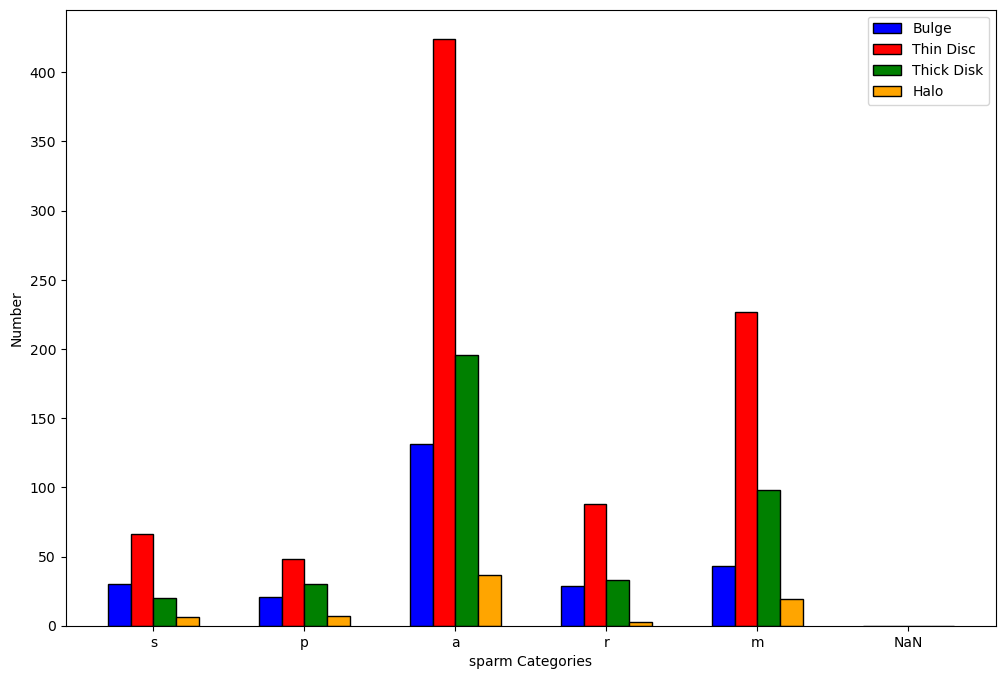

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Excel dosyasını oku
excel_yolu = "/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/bilgiislem/8.34/Disc_Region.xlsx"
df = pd.read_excel(excel_yolu, sheet_name='düşeyara')

# Kullanılacak sütunları seç
erbias_sutunu = df['SPARM']
gbilesen_sutunu = df['Gbileşen']

# '0' olan değerleri 'NaN' ile değiştir
erbias_sutunu.replace(0, np.nan, inplace=True)

# Kategori renklerini tanımla
renk_etiketleri = {
    'Bulge': 'blue',          # Bulge ise mavi
    'Thin Disc': 'red',       # Thin Disc ise kırmızı
    'Thick Disk': 'green',    # Thick Disk ise yeşil
    'Halo': 'orange',         # Halo ise turuncu
}

# E, R, B, İ, A, S kategorilerini ve NaN (eski 0) için histogram oluştur
categories = ['s', 'p', 'a', 'r', 'm', np.nan]
category_names = ['s', 'p', 'a', 'r', 'm', 'NaN']

# Histogramın genel özellikleri
bar_width = 0.15  # Her bir bileşen için sütun genişliği
x_positions = np.arange(len(categories))  # Her kategori için x eksenindeki pozisyonlar
offset = np.zeros_like(x_positions, dtype=float)  # Her kategori için başlangıçta kaydırma 0

plt.figure(figsize=(12, 8))

# Her bileşen için sütunları çiz
for component, color in renk_etiketleri.items():
    counts = []
    
    for category in categories:
        filtered_gbilesen_sutunu = gbilesen_sutunu[erbias_sutunu == category]
        component_count = filtered_gbilesen_sutunu[filtered_gbilesen_sutunu == component].count()
        counts.append(component_count)
    
    # Sütunları çiz
    plt.bar(x_positions + offset, counts, bar_width, color=color, edgecolor='black', label=component)
    offset += bar_width  # Sonraki bileşen için kaydırmayı artır

# X eksenini özelleştir
plt.xticks(x_positions + bar_width * 1.5, category_names)  # Kategorileri ortalamak için kaydırma
plt.xlabel('sparm Categories')
plt.ylabel('Number')
plt.legend(loc='upper right')

# Grafik dosyası yolunu belirle
#save_path = "/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/bilgiislem/8.34/sparm.png"
plt.savefig(save_path, bbox_inches='tight')

# Grafiği göster
plt.show()

In [29]:
def plot_histogram(ax, veri_sutunu, gbilesen_sutunu, bins, title, xlabel, ylabel):
    # Verileri sayısal değerlere dönüştür
    veri_sutunu = pd.to_numeric(veri_sutunu, errors='coerce')

    # Filtreleme işlemi
    filtered_df = df[veri_sutunu <= bins[-1]]
    filtered_veri_sutunu = filtered_df[veri_sutunu.name]
    filtered_gbilesen_sutunu = filtered_df[gbilesen_sutunu.name]

    # Histogram verilerini saklayacak bir liste oluştur
    hist_data = []
    ortalama_degerler = {}

    for component, color in renk_etiketleri.items():
        component_values = filtered_veri_sutunu[filtered_gbilesen_sutunu == component]
        counts, bins = np.histogram(component_values, bins=bins)
        hist_data.append((component, counts, bins, color))

        # Ortalama değeri hesapla ve sakla
        mean_value = component_values.mean()
        ortalama_degerler[component] = mean_value

    # Verileri sayıya göre sırala
    hist_data.sort(key=lambda x: np.min(x[1]))

    # Histogramları çiz
    for component, counts, bins, color in hist_data:
        ax.hist(bins[:-1], bins=bins, weights=counts, color=color, edgecolor='black', label=component)
        mean_value = ortalama_degerler[component]
        ax.axvline(x=mean_value, color=color, linestyle='--', label=f'{component} Mean')

    # Tüm verilerin ortalamasını hesapla ve çiz
    all_mean_value = filtered_veri_sutunu.mean()
    ax.axvline(x=all_mean_value, color='black', linestyle='--', label='Overall Mean')

    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend()


Bulge için bin sayıları: [16. 45. 48. 68. 52. 43. 26. 33. 23. 34. 16. 17.  9.  4.  2.  2.  6.  2.
  3.  0.  1.  7.  2.  0.  5.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
Thin Disc için bin sayıları: [ 46.  60.  94. 106. 103.  83.  71.  59.  53.  38.  24.  24.  20.  24.
  14.  13.  26.  15.  18.  12.  16.   6.  10.  20.   7.   3.   4.   8.
  16.   3.  10.   5.   4.  10.   6.   5.  11.   6.   9.   3.   6.   1.
   1.   8.   6.   5.   3.   2.   0.   5.   0.   4.   0.   0.   2.   3.
   0.   1.   2.   3.   1.   0.   3.   0.   0.   0.   2.   0.   0.   0.
   0.   1.   0.   2.   1.   0.   1.   1.   0.   3.   0.   4.   0.   1.
   2.   0.   0.   0.   0.   0.   2.   2.   0.   1.   4.   1.   1.   1.
   0.   2.]
Thick Disk için bin sayıları: 

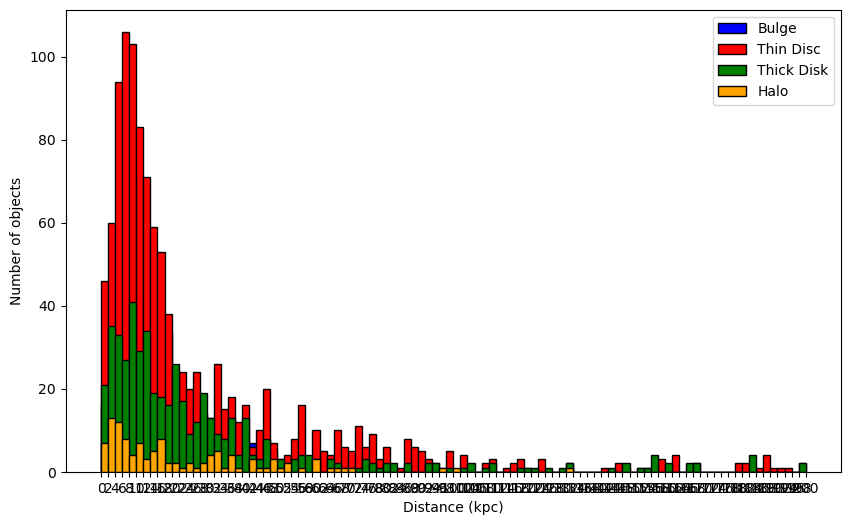

In [169]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages

# Excel dosyasını oku
excel_yolu = "/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/bilgiislem/8.34/Disc_Region.xlsx"
renklendirilmis_df = pd.read_excel(excel_yolu, sheet_name='düşeyara')

# Kullanılacak sütunları seç
rgeo_sutunu = renklendirilmis_df['MajDiam']
gbilesen_sutunu = renklendirilmis_df['Gbileşen']

# Verileri sayısal değerlere dönüştür
rgeo_sutunu = pd.to_numeric(rgeo_sutunu, errors='coerce')

# Filtreleme işlemi: MajDiam değeri 200 ve altında olanları seç
filtered_df = renklendirilmis_df[rgeo_sutunu <= 200]
filtered_rgeo_sutunu = filtered_df['MajDiam']
filtered_gbilesen_sutunu = filtered_df['Gbileşen']

# Renklerin ve etiketlerin belirlenmesi
renk_etiketleri = {
    'Bulge': 'blue',
    'Thin Disc': 'red',
    'Thick Disk': 'green',
    'Halo': 'orange',
}

bins = np.arange(0, 201, 2)  # Histogram aralığı 0'dan 200'e kadar

plt.figure(figsize=(10, 6))

for component, color in renk_etiketleri.items():
    component_values = rgeo_sutunu[gbilesen_sutunu == component]
    counts, bins, patches = plt.hist(component_values, bins=bins, label=component, color=color, edgecolor='black')
    print(f"{component} için bin sayıları: {counts}")

plt.xticks(bins)
plt.xlabel('Distance (kpc)')
plt.ylabel('Number of objects')
plt.legend(title='')

plt.show()



In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages
import os

# Excel dosyasını oku
excel_yolu = "/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/bilgiislem/8.34/Disc_Region.xlsx"
df = pd.read_excel(excel_yolu, sheet_name='düşeyara')

# ERBIAS ve SPARM sütunlarını seç
erbias_sutunu = df['ERBIAS']
sparm_sutunu = df['SPARM']
gbilesen_sutunu = df['Gbileşen']

# '0' olan değerleri 'NaN' ile değiştir
erbias_sutunu.replace(0, np.nan, inplace=True)
sparm_sutunu.replace(0, np.nan, inplace=True)

# Kategori renklerini tanımla
renk_etiketleri = {
    'Bulge': 'blue',          # Bulge ise mavi
    'Thin Disc': 'red',       # Thin Disc ise kırmızı
    'Thick Disk': 'green',    # Thick Disk ise yeşil
    'Halo': 'orange',         # Halo ise turuncu
}

# Histogramın genel özellikleri
bar_width = 0.15  # Her bir bileşen için sütun genişliği

# ERBIAS histogramını oluşturacak fonksiyon
def plot_erbias_histogram(ax):
    categories = ['E', 'R', 'B', 'I', 'A', 'S', np.nan]
    category_names = ['E', 'R', 'B', 'I', 'A', 'S', 'NaN']
    x_positions = np.arange(len(categories))  # Her kategori için x eksenindeki pozisyonlar
    offset = np.zeros_like(x_positions, dtype=float)  # Her kategori için başlangıçta kaydırma 0

    for component, color in renk_etiketleri.items():
        counts = []

        for category in categories:
            filtered_gbilesen_sutunu = gbilesen_sutunu[erbias_sutunu == category]
            component_count = filtered_gbilesen_sutunu[filtered_gbilesen_sutunu == component].count()
            counts.append(component_count)

        # Sütunları çiz
        ax.bar(x_positions + offset, counts, bar_width, color=color, edgecolor='black', linewidth=1.2, label=component)
        offset += bar_width  # Sonraki bileşen için kaydırmayı artır

    # X eksenini özelleştir
    ax.set_xticks(x_positions + bar_width * 1.5)
    ax.set_xticklabels(category_names)
    ax.set_xlabel('ERBIAS Categories')
    ax.set_ylabel('Number')
    ax.legend(loc='upper right')

# SPARM histogramını oluşturacak fonksiyon
def plot_sparm_histogram(ax):
    categoriess = ['s', 'p', 'a', 'r', 'm', np.nan]
    category_namess = ['s', 'p', 'a', 'r', 'm', 'NaN']
    x_positions = np.arange(len(categoriess))  # Her kategori için x eksenindeki pozisyonlar
    offset = np.zeros_like(x_positions, dtype=float)  # Her kategori için başlangıçta kaydırma 0

    for component, color in renk_etiketleri.items():
        counts = []

        for category in categoriess:
            filtered_gbilesen_sutunu = gbilesen_sutunu[sparm_sutunu == category]
            component_count = filtered_gbilesen_sutunu[filtered_gbilesen_sutunu == component].count()
            counts.append(component_count)

        # Sütunları çiz
        ax.bar(x_positions + offset, counts, bar_width, color=color, edgecolor='black', linewidth=1.2, label=component)
        offset += bar_width  # Sonraki bileşen için kaydırmayı artır

    # X eksenini özelleştir
    ax.set_xticks(x_positions + bar_width * 1.5)
    ax.set_xticklabels(category_namess)
    ax.set_xlabel('SPARM Categories')
    ax.set_ylabel('Number')
    ax.legend(loc='upper right')

# Diğer histogramları oluşturacak fonksiyonlar
def plot_histogram(ax, veri_sutunu, gbilesen_sutunu, bins, title, xlabel, ylabel, show_labels=False):
    veri_sutunu = pd.to_numeric(veri_sutunu, errors='coerce')
    filtered_df = df[veri_sutunu <= bins[-1]]
    filtered_veri_sutunu = filtered_df[veri_sutunu.name]
    filtered_gbilesen_sutunu = filtered_df[gbilesen_sutunu.name]

    hist_data = []
    ortalama_degerler = {}

    for component, color in renk_etiketleri.items():
        component_values = filtered_veri_sutunu[filtered_gbilesen_sutunu == component]
        counts, _ = np.histogram(component_values, bins=bins)
        hist_data.append((component, counts, color))
        mean_value = component_values.mean()
        ortalama_degerler[component] = mean_value

    # Her bin aralığında çubukları sıralayarak çiz
    bottom = np.zeros(len(bins) - 1)
    
    for i in range(len(bins) - 1):
        # Her bin için bileşenleri toplam sayıya göre sıralayın
        sorted_components = sorted(hist_data, key=lambda x: x[1][i])
        
        for component, counts, color in sorted_components:
            ax.bar(bins[i], counts[i], width=bins[1] - bins[0], color=color, edgecolor='black', linewidth=1.2, bottom=bottom[i])
            bottom[i] += counts[i]  # Mevcut histogram değerini alt tabana ekleyin

    # Ortalama değerlerin çizimi ve etiketleme
    for component, color in renk_etiketleri.items():
        mean_value = ortalama_degerler.get(component, np.nan)
        if not np.isnan(mean_value):
            ax.axvline(x=mean_value, color=color, linestyle='--', linewidth=2)

    # Tüm veri için genel ortalama çizgisi
    all_mean_value = filtered_veri_sutunu.mean()
    ax.axvline(x=all_mean_value, color='black', linestyle='--', linewidth=2)

    # Grafik başlıkları ve label ekleme
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

# PDF dosyasının yolunu belirle
pdf_dosyasi_yolu = "/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/bilgiislem/8.34/histogramlar/ort/deneme_HASH_Size_Morfo.pdf"

# PDF dosyası oluştur
with PdfPages(pdf_dosyasi_yolu) as pdf:
    fig, axs = plt.subplots(2, 2, figsize=(14, 12))  # 2x2 grid
    axs = axs.flatten()

    # Histogramları oluştur
    plot_histogram(axs[0], df['MajDiam'], df['Gbileşen'], np.arange(0, 201, 2), 'Diameter Histogram', 'Diameter (′′)', 'Number', show_labels=False)
    plot_histogram(axs[1], df['Açısal_genişlik'], df['Gbileşen'], np.arange(0, 4, 0.1), 'Angular Width Histogram', 'Angular Width (pc)', 'Number', show_labels=False)
    plot_erbias_histogram(axs[2])  # Eğer labelleri kaldırmanız gerekiyorsa buradaki fonksiyonu da düzenlemeniz gerekebilir
    plot_sparm_histogram(axs[3])  # Aynı şekilde buradaki fonksiyonu da düzenleyin

    plt.tight_layout()
    pdf.savefig(fig)
    plt.close(fig)

# PDF dosyasının kaydedildiği yeri kontrol et
if os.path.isfile(pdf_dosyasi_yolu):
    print(f"PDF dosyası başarıyla kaydedildi: {pdf_dosyasi_yolu}")
else:
    print(f"PDF dosyası kaydedilemedi: {pdf_dosyasi_yolu}")

PDF dosyası başarıyla kaydedildi: /Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/bilgiislem/8.34/histogramlar/ort/deneme_HASH_Size_Morfo.pdf


In [173]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages

# Excel dosyasını oku
excel_yolu = "/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/bilgiislem/8.34/Disc_Region.xlsx"
renklendirilmis_df = pd.read_excel(excel_yolu, sheet_name='düşeyara')

# Kullanılacak sütunları seç
rgeo_sutunu = renklendirilmis_df['MajDiam']
gbilesen_sutunu = renklendirilmis_df['Gbileşen']

# Verileri sayısal değerlere dönüştür
rgeo_sutunu = pd.to_numeric(rgeo_sutunu, errors='coerce')

# Filtreleme işlemi: MajDiam değeri 200 ve altında olanları seç
filtered_df = renklendirilmis_df[rgeo_sutunu <= 200]
filtered_rgeo_sutunu = filtered_df['MajDiam']
filtered_gbilesen_sutunu = filtered_df['Gbileşen']

# Renklerin ve etiketlerin belirlenmesi
renk_etiketleri = {
    'Bulge': 'blue',          # Bulge ise mavi
    'Thin Disc': 'red',       # Thin Disc ise kırmızı
    'Thick Disk': 'green',    # Thick Disk ise yeşil
    'Halo': 'orange',         # Halo ise turuncu
}

bins = np.arange(0, 201, 2)  # Histogram aralığı 0'dan 200'e kadar

# Tek bir PDF dosyası aç
pdf_path = "/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/bilgiislem/8.34/MajDiameter_histograms.pdf"
with PdfPages(pdf_path) as pdf:
    # Her bileşen için ayrı ayrı histogram oluştur ve PDF'e ekle
    for component, color in renk_etiketleri.items():
        # Sadece o bileşene ait verileri filtrele
        component_values = filtered_rgeo_sutunu[filtered_gbilesen_sutunu == component]
        
        # Histogramı oluştur
        plt.figure(figsize=(10, 6))
        plt.hist(component_values, bins=bins, color=color, edgecolor='black')

        # Ortalama çizgisini ekle (dikey çizgi)
        mean_value = component_values.mean()
        plt.axvline(x=mean_value, color='black', linestyle='--', label=f'{component} Mean')

        # Grafik ayarları
        plt.title(f'{component} Histogram')
        plt.xlabel('Diameter (′′)')
        plt.ylabel('Number')
        plt.legend()

        # Grafiği PDF'e kaydet
        pdf.savefig()
        
        # Grafiği kapat
        plt.close()

print(f"Histogramlar başarıyla {pdf_path} dosyasına kaydedildi.")


Histogramlar başarıyla /Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/bilgiislem/8.34/MajDiameter_histograms.pdf dosyasına kaydedildi.


In [178]:
import pandas as pd

# Excel dosyasını oku
excel_yolu = "/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/bilgiislem/8.34/Disc_Region.xlsx"
neat_result_df = pd.read_excel(excel_yolu, sheet_name='neat_result')
renklendirilmis_df = pd.read_excel(excel_yolu, sheet_name='Sayfa2')

# Renklendirme fonksiyonu
def get_color(component):
    if component == 'Bulge':
        return 'blue'
    elif component == 'Thin Disc':
        return 'red'
    elif component == 'Thick Disk':
        return 'green'
    elif component == 'Halo':
        return 'orange'
    else:
        return None

# Renklendirme bilgilerini ekle
renklendirilmis_df['color'] = renklendirilmis_df['Gbileşen'].apply(get_color)
renk_dict = renklendirilmis_df.set_index('idPNMain')['color'].to_dict()

# Renklere karşılık gelen etiketler ve sıralama
renk_etiketleri = {
    'orange': 'Halo',
    'green': 'Thick Disk',
    'blue': 'Bulge',
    'red': 'Thin Disc'
}

# Söz konusu sütunlar
sütunlar = ['[S II] Density', '[O III] Temperature', '[N II] temperature']

# Her sütun için verileri print etme
for başlık in sütunlar:
    print(f"\n{başlık} verileri:\n")
    
    for color, etiket in renk_etiketleri.items():
        filtreli_veri = neat_result_df[neat_result_df['idPNMain'].map(renk_dict) == color][başlık]
        filtreli_veri = filtreli_veri[(filtreli_veri != 0) & (filtreli_veri != 35000)]
        
        print(f"{etiket} ({color}) - Veri sayısı: {len(filtreli_veri)}")
        print(filtreli_veri.tolist())  # Sadece ilk birkaç veriyi göstermek için
        print("\n")

# Sonuçların tamamını görmek için, .head() yerine .tolist() veya direkt filtreli_veri'yi yazdırabilirsin.



[S II] Density verileri:

Halo (orange) - Veri sayısı: 45
[1420.0, 2470.0, 971.0, 1020.0, 1.0, 3860.0, 6440.0, 275.0, 100000.0, 5990.0, 6540.0, 5600.0, 2840.0, 6620.0, 1.0, 6450.0, 2450.0, 1320.0, 8900.0, 1.0, 1580.0, 646.0, 3150.0, 14200.0, 14500.0, 2710.0, 174.0, 100000.0, 1710.0, 1150.0, 3860.0, 3260.0, 1890.0, 3000.0, 1660.0, 758.0, 1.0, 255.0, 1.0, 1.0, 30900.0, 1.0, 453.0, 270.0, 1.0]


Thick Disk (green) - Veri sayısı: 294
[479.0, 8910.0, 646.0, 3820.0, 100000.0, 5360.0, 1760.0, 4700.0, 1800.0, 1740.0, 1680.0, 997.0, 2060.0, 3900.0, 6210.0, 2090.0, 585.0, 5130.0, 3700.0, 4870.0, 5940.0, 1480.0, 1160.0, 3750.0, 4960.0, 890.0, 1.0, 51100.0, 3610.0, 1900.0, 4730.0, 3970.0, 100000.0, 966.0, 4020.0, 4160.0, 7600.0, 2340.0, 738.0, 2290.0, 51.8, 100000.0, 2140.0, 1210.0, 5420.0, 43200.0, 1090.0, 1080.0, 799.0, 4840.0, 6910.0, 514.0, 2430.0, 6630.0, 34000.0, 367.0, 748.0, 12000.0, 100000.0, 1.0, 4600.0, 2840.0, 8680.0, 103.0, 11.2, 321.0, 92.4, 153.0, 1730.0, 1290.0, 1.0, 20200.0, 443.

In [210]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from matplotlib.backends.backend_pdf import PdfPages

# Excel dosyasını oku
excel_yolu = "/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/bilgiislem/8.34/Disc_Region.xlsx"
neat_result_df = pd.read_excel(excel_yolu, sheet_name='Sayfa4')
renklendirilmis_df = pd.read_excel(excel_yolu, sheet_name='Sayfa5')

# Renklendirme fonksiyonu
def get_color(component):
    if component == 'Bulge':
        return 'blue'
    elif component == 'Thin Disc':
        return 'red'
    elif component == 'Thick Disk':
        return 'green'
    elif component == 'Halo':
        return 'orange'
    else:
        return None

# Renklendirme bilgilerini ekle
renklendirilmis_df['color'] = renklendirilmis_df['Gbileşen'].apply(get_color)
renk_dict = renklendirilmis_df.set_index('idPNMain')['color'].to_dict()

# Histogramlar için klasör oluştur
klasor_yolu = "/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/bilgiislem/8.34/histogramlar/ort/"
if not os.path.exists(klasor_yolu):
    os.makedirs(klasor_yolu)

# Histogram parametreleri
histogram_parametreleri = {
    'He/H': {'bins': 50},
    'N/H': {'bins': 50},
    'O/H': {'bins': 50},
    'Ne/H': {'bins': 50},
    'S/H': {'bins': 50},
    'Cl/H': {'bins': 50},
    'Ar/H': {'bins': 50}
}

# Renklere karşılık gelen etiketler ve sıralama
renk_etiketleri = {
    'blue': 'Bulge',
    'red': 'Thin Disc',
    'green': 'Thick Disk',
    'orange': 'Halo'
}

# Söz konusu sütunlar
sütunlar = ['He/H', 'N/H', 'O/H', 'Ne/H', 'S/H', 'Cl/H', 'Ar/H']

# PDF dosyasının yolunu belirle
pdf_dosyasi_yolu = os.path.join(klasor_yolu, "total_elementttasdasdt.pdf")

# PDF dosyası oluştur
with PdfPages(pdf_dosyasi_yolu) as pdf:
    fig, axs = plt.subplots(len(sütunlar), len(renk_etiketleri), figsize=(15, 20))  # 7x4 grid
    axs = axs.flatten()

    # Histogramları oluştur ve ekle
    for i, başlık in enumerate(sütunlar):
        for j, (color, etiket) in enumerate(renk_etiketleri.items()):
            ax = axs[i * len(renk_etiketleri) + j]
            bins = histogram_parametreleri[başlık]['bins']
            range_ = (neat_result_df[başlık].min(), neat_result_df[başlık].max())
            filtreli_veri = neat_result_df[neat_result_df['idPNMain'].map(renk_dict) == color][başlık]
            filtreli_veri = filtreli_veri[(filtreli_veri != 0) & (filtreli_veri != '#SAYI!')]

            if not filtreli_veri.empty:
                ax.hist(filtreli_veri, bins=bins, range=range_, edgecolor='black', color=color, label=etiket)
                ortalama = filtreli_veri.mean()
                medyan = filtreli_veri.median()

                # Ortalama ve medyan çizgileri
                if range_[0] <= ortalama <= range_[1]:
                    ax.axvline(ortalama, color=color, linestyle='dashed', linewidth=1, label=f'{etiket} Mean')
                if range_[0] <= medyan <= range_[1]:
                    ax.axvline(medyan, color='black', linestyle='dashed', linewidth=1, label='Median')

                # Plot ayarları
                ax.set_xlabel(başlık, fontsize=10)
                ax.set_ylabel("Number", fontsize=10)
                ax.legend(loc='upper right', fontsize=8)

    # Boş olan alt grafikleri kaldır
    for j in range(len(sütunlar) * len(renk_etiketleri), len(axs)):
        fig.delaxes(axs[j])

    plt.tight_layout()
    pdf.savefig(fig)
    plt.close(fig)

# Kontrol etmek için dosya yolu yazdır
if os.path.exists(pdf_dosyasi_yolu):
    print(f"PDF dosyası başarıyla kaydedildi: {pdf_dosyasi_yolu}")
else:
    print(f"PDF dosyası kaydedilemedi: {pdf_dosyasi_yolu}")


PDF dosyası başarıyla kaydedildi: /Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/bilgiislem/8.34/histogramlar/ort/total_elementttasdasdt.pdf


In [218]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from matplotlib.backends.backend_pdf import PdfPages

# Excel dosyasını oku
excel_yolu = "/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/bilgiislem/8.34/Disc_Region.xlsx"
neat_result_df = pd.read_excel(excel_yolu, sheet_name='neat_result')
renklendirilmis_df = pd.read_excel(excel_yolu, sheet_name='Sayfa2')

# Histogramlar için klasör oluştur
klasor_yolu = "/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/bilgiislem/8.34/histogramlar/ort/median/ss"
if not os.path.exists(klasor_yolu):
    os.makedirs(klasor_yolu)

# Ortalamalar için dosya oluştur
ortalama_dosyasi_yolu = os.path.join(klasor_yolu, "ortalama_degerler.txt")

# Renklendirme fonksiyonu
def get_color(component):
    if component == 'Bulge':
        return 'blue'
    elif component == 'Thin Disc':
        return 'red'
    elif component == 'Thick Disk':
        return 'green'
    elif component == 'Halo':
        return 'orange'
    else:
        return None

# Renklendirme bilgilerini ekle
renklendirilmis_df['color'] = renklendirilmis_df['Gbileşen'].apply(get_color)
renk_dict = renklendirilmis_df.set_index('idPNMain')['color'].to_dict()

# Sütun başlıkları
sutun_basliklari = ['c(Hb) (Ha/Hb)', 'c(Hb) (Hg/Hb)', 'c(Hb) (Hd/Hb)', '[OII] density', '[S II] Density', '[ArIV] density', 
                    '[OII] temperature', '[S II] temperature', '[N II] temperature', 
                    '[OI] temperature', '[O III] Temperature', '[NeIII] temperature', 
                    '[ArIII] temperature', '[ArV] temperature', 'He I temperature (7281/6678)', 
                    'C/H', 'N/H', 'O/H', 'Ne/H', 'Ar/H', 'S/H', 'Cl/H', 'He/H']

# Histogram parametreleri
histogram_parametreleri = {
    'c(Hb) (Ha/Hb)': {'bins': 50, 'range': (0, 6)},
    'c(Hb) (Hg/Hb)': {'bins': 50, 'range': (0, 6)},
    'c(Hb) (Hd/Hb)': {'bins': 50, 'range': (0, 6)},
    '[OII] density': {'bins': 50, 'range': (0, 20000)},
    '[S II] Density': {'bins': 50, 'range': (0, 15000)},
    '[ArIV] density': {'bins': 50, 'range': (0, 70000)},
    '[OII] temperature': {'bins': 50, 'range': (5000, 35000)},
    '[S II] temperature': {'bins': 50, 'range': (0, 35000)},
    '[N II] temperature': {'bins': 100, 'range': (5000, 35000)},
    '[OI] temperature': {'bins': 50, 'range': (0, 35000)},
    '[O III] Temperature': {'bins': 50, 'range': (5000, 35000)},
    '[NeIII] temperature': {'bins': 50, 'range': (0, 35000)},
    '[ArIII] temperature': {'bins': 50, 'range': (5000, 35000)},
    '[ArV] temperature': {'bins': 50, 'range': (0, 35000)},
    'He I temperature (7281/6678)': {'bins': 50, 'range': (0, 4e5)},
    'C/H': {'bins': 50, 'range': (0, 1e-3)},
    'N/H': {'bins': 50, 'range': (0, 1e-3)},
    'O/H': {'bins': 50, 'range': (0, 3e-3)},
    'Ne/H': {'bins': 50, 'range': (0, 3e-3)},
    'Ar/H': {'bins': 50, 'range': (0, 175e-7)},
    'S/H': {'bins': 50, 'range': (0, 3e-5)},
    'Cl/H': {'bins': 50, 'range': (0, 0.6e-5)},
    'He/H': {'bins': 50, 'range': (0, 0.5)}
}

# Renklere karşılık gelen etiketler
renk_etiketleri = {
    'red': 'Thin Disc',
    'green': 'Thick Disc',
    'blue': 'Bulge',
    'orange': 'Halo'
}

# Ortalamaları yazmak için dosyayı aç
with open(ortalama_dosyasi_yolu, 'w') as f:
    # Belirli sütunlar için PDF oluşturma
    pdf_dosyasi_yolu = os.path.join(klasor_yolu, "selected_histograms.pdf")
    with PdfPages(pdf_dosyasi_yolu) as pdf:
        plt.figure(figsize=(8, 12))  # Tek bir sayfa için uygun boyut

        for i, baslik in enumerate(['[S II] Density', '[N II] temperature', '[O III] Temperature']):
            plt.subplot(3, 1, i + 1)  # 3 satır, 1 sütun
            bins = histogram_parametreleri[baslik]['bins']
            range_ = histogram_parametreleri[baslik]['range']
            ortalamalar = {}
            
            # 0 değerleri hariç tutarak tüm verilerin medyanını hesapla ve siyah kesikli çizgi olarak göster
            tum_veriler_median = neat_result_df[baslik][neat_result_df[baslik] != 0].median()
            plt.axvline(tum_veriler_median, color='black', linestyle='dashed', linewidth=1)
            print(f"{baslik} - Tüm Veriler Medyanı (0 hariç): {tum_veriler_median:.2e}")
            f.write(f"{baslik} - Tüm Veriler Medyanı (0 hariç): {tum_veriler_median:.2e}\n")
            
            for color, etiket in renk_etiketleri.items():
                filtreli_veri = neat_result_df[neat_result_df['idPNMain'].map(renk_dict) == color][baslik]
                filtreli_veri = filtreli_veri[(filtreli_veri != 0) & (filtreli_veri != 35000)]
                
                if not filtreli_veri.empty:
                    plt.hist(filtreli_veri, bins=bins, range=range_, edgecolor='black', color=color, label=etiket)
                    medyan = filtreli_veri.median()
                    ortalamalar[etiket] = medyan
            
            # Medyan değerleri kesikli çizgilerle göster
            for etiket, medyan in ortalamalar.items():
                color = [k for k, v in renk_etiketleri.items() if v == etiket][0]
                plt.axvline(medyan, color=color, linestyle='dashed', linewidth=1)
                print(f"{baslik} - {etiket} Medyan (0 hariç): {medyan:.2e}")
                f.write(f"{baslik} - {etiket} Medyan (0 hariç): {medyan:.2e}\n")
            
            # Plot ayarları
            if baslik in ['c(Hb) (Ha/Hb)', 'c(Hb) (Hg/Hb)', 'c(Hb) (Hd/Hb)']:
                plt.xlabel("cH(β)")
            else:
                plt.xlabel(baslik)
            
            plt.ylabel("Number")
            plt.legend(fontsize=12)
        
        # PDF dosyasına ekle
        pdf.savefig()
        plt.close()

print("Belirli sütunlar için tek sayfada üç histogram başarıyla oluşturuldu ve PDF'ye kaydedildi.")


[S II] Density - Tüm Veriler Medyanı (0 hariç): 1.09e+03
[S II] Density - Thin Disc Medyan (0 hariç): 1.04e+03
[S II] Density - Thick Disc Medyan (0 hariç): 1.16e+03
[S II] Density - Bulge Medyan (0 hariç): 1.51e+03
[S II] Density - Halo Medyan (0 hariç): 1.71e+03
[N II] temperature - Tüm Veriler Medyanı (0 hariç): 1.18e+04
[N II] temperature - Thin Disc Medyan (0 hariç): 1.06e+04
[N II] temperature - Thick Disc Medyan (0 hariç): 1.07e+04
[N II] temperature - Bulge Medyan (0 hariç): 9.86e+03
[N II] temperature - Halo Medyan (0 hariç): 1.08e+04
[O III] Temperature - Tüm Veriler Medyanı (0 hariç): 1.10e+04
[O III] Temperature - Thin Disc Medyan (0 hariç): 1.05e+04
[O III] Temperature - Thick Disc Medyan (0 hariç): 1.06e+04
[O III] Temperature - Bulge Medyan (0 hariç): 1.16e+04
[O III] Temperature - Halo Medyan (0 hariç): 9.76e+03
Belirli sütunlar için tek sayfada üç histogram başarıyla oluşturuldu ve PDF'ye kaydedildi.


In [251]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from matplotlib.backends.backend_pdf import PdfPages

# Excel dosyasını oku
excel_yolu = "/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/bilgiislem/8.34/Disc_Region.xlsx"
neat_result_df = pd.read_excel(excel_yolu, sheet_name='neat_result')
renklendirilmis_df = pd.read_excel(excel_yolu, sheet_name='Sayfa2')

# Histogramlar için klasör oluştur
klasor_yolu = "/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/bilgiislem/8.34/histogramlar/ort/median/ss/deneme/"
if not os.path.exists(klasor_yolu):
    os.makedirs(klasor_yolu)

# Ortalamalar için dosya oluştur
ortalama_dosyasi_yolu = os.path.join(klasor_yolu, "ortalama_degerler.txt")

# Renklendirme fonksiyonu
def get_color(component):
    if component == 'Bulge':
        return 'blue'
    elif component == 'Thin Disc':
        return 'red'
    elif component == 'Thick Disk':
        return 'green'
    elif component == 'Halo':
        return 'orange'
    else:
        return None

# Renklendirme bilgilerini ekle
renklendirilmis_df['color'] = renklendirilmis_df['Gbileşen'].apply(get_color)
renk_dict = renklendirilmis_df.set_index('idPNMain')['color'].to_dict()

# Sütun başlıkları
sutun_basliklari = ['c(Hb) (Ha/Hb)', 'c(Hb) (Hg/Hb)', 'c(Hb) (Hd/Hb)', '[OII] density', '[S II] Density', '[ArIV] density', 
                    '[OII] temperature', '[S II] temperature', '[N II] temperature', 
                    '[OI] temperature', '[O III] Temperature', '[NeIII] temperature', 
                    '[ArIII] temperature', '[ArV] temperature', 'He I temperature (7281/6678)', 
                    'C/H', 'N/H', 'O/H', 'Ne/H', 'Ar/H', 'S/H', 'Cl/H', 'He/H', 'Diameter', 'Angular Width',
                    'ERBIAS', 'SPARM']

# Histogram parametreleri
histogram_parametreleri = {
    'c(Hb) (Ha/Hb)': {'bins': 50, 'range': (0, 6)},
    'c(Hb) (Hg/Hb)': {'bins': 50, 'range': (0, 6)},
    'c(Hb) (Hd/Hb)': {'bins': 50, 'range': (0, 6)},
    '[OII] density': {'bins': 50, 'range': (0, 20000)},
    '[S II] Density': {'bins': 50, 'range': (0, 15000)},
    '[ArIV] density': {'bins': 50, 'range': (0, 70000)},
    '[OII] temperature': {'bins': 50, 'range': (5000, 35000)},
    '[S II] temperature': {'bins': 50, 'range': (0, 35000)},
    '[N II] temperature': {'bins': 100, 'range': (5000, 35000)},
    '[OI] temperature': {'bins': 50, 'range': (0, 35000)},
    '[O III] Temperature': {'bins': 50, 'range': (5000, 35000)},
    '[NeIII] temperature': {'bins': 50, 'range': (0, 35000)},
    '[ArIII] temperature': {'bins': 50, 'range': (5000, 35000)},
    '[ArV] temperature': {'bins': 50, 'range': (0, 35000)},
    'He I temperature (7281/6678)': {'bins': 50, 'range': (0, 4e5)},
    'C/H': {'bins': 50, 'range': (0, 1e-3)},
    'N/H': {'bins': 50, 'range': (0, 1e-3)},
    'O/H': {'bins': 50, 'range': (0, 3e-3)},
    'Ne/H': {'bins': 50, 'range': (0, 3e-3)},
    'Ar/H': {'bins': 50, 'range': (0, 175e-7)},
    'S/H': {'bins': 50, 'range': (0, 3e-5)},
    'Cl/H': {'bins': 50, 'range': (0, 0.6e-5)},
    'He/H': {'bins': 50, 'range': (0, 0.5)},
    'Diameter': {'bins': 50, 'range': (0, 200)},
    'Angular Width': {'bins': 50, 'range': (0, 4)},
    'ERBIAS': {'bins': 50, 'range': (0, 0.5)},
    'SPARM': {'bins': 50, 'range': (0, 0.5)}
}

# Renklere karşılık gelen etiketler
renk_etiketleri = {
    'red': 'Thin Disc',
    'green': 'Thick Disc',
    'blue': 'Bulge',
    'orange': 'Halo'
}

# Ortalamaları yazmak için dosyayı aç
with open(ortalama_dosyasi_yolu, 'w') as f:
    # Her sütun için histogram oluştur
    for baslik in sutun_basliklari:
        plt.figure()
        bins = histogram_parametreleri[baslik]['bins']
        range_ = histogram_parametreleri[baslik]['range']
        ortalamalar = {}
        
        # 0 değerleri hariç tutarak tüm verilerin medyanını hesapla ve siyah kesikli çizgi olarak göster
        tum_veriler_median = neat_result_df[baslik][neat_result_df[baslik] != 0].median()
        plt.axvline(tum_veriler_median, color='black', linestyle='dashed', linewidth=1)
        print(f"{baslik} - Tüm Veriler Medyanı (0 hariç): {tum_veriler_median:.2e}")
        f.write(f"{baslik} - Tüm Veriler Medyanı (0 hariç): {tum_veriler_median:.2e}\n")
        
        for color, etiket in renk_etiketleri.items():
            filtreli_veri = neat_result_df[neat_result_df['idPNMain'].map(renk_dict) == color][baslik]
            filtreli_veri = filtreli_veri[(filtreli_veri != 0) & (filtreli_veri != 35000)]
            
            if not filtreli_veri.empty:
                plt.hist(filtreli_veri, bins=bins, range=range_, edgecolor='black', color=color, label=etiket)
                medyan = filtreli_veri.median()
                ortalamalar[etiket] = medyan
        
        # Medyan değerleri kesikli çizgilerle göster
        for etiket, medyan in ortalamalar.items():
            color = [k for k, v in renk_etiketleri.items() if v == etiket][0]
            plt.axvline(medyan, color=color, linestyle='dashed', linewidth=1)
            print(f"{baslik} - {etiket} Medyan (0 hariç): {medyan:.2e}")
            f.write(f"{baslik} - {etiket} Medyan (0 hariç): {medyan:.2e}\n")
        
        # Plot ayarları
        if baslik in ['c(Hb) (Ha/Hb)', 'c(Hb) (Hg/Hb)', 'c(Hb) (Hd/Hb)']:
            plt.xlabel("cH(β)")
        else:
            plt.xlabel(baslik)
        
        plt.ylabel("Number")
        plt.legend(fontsize=12)
        
        # Histogramı kaydet
        kaydet_yolu = os.path.join(klasor_yolu, f"{baslik.replace('/', '_')}.png")
        plt.savefig(kaydet_yolu, dpi=300)
        
        # Plot'u temizle
        plt.clf()

print("Histogramlar başarıyla oluşturuldu ve medyanlar listeye yazıldı.")

# PDF dosyası yolu
pdf_dosyasi_yolu = "/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/bilgiislem/8.34/histogramlar/ort/median/ss/selected_histograms.pdf"

# Histogram başlıkları
basliklar = ['[S II] Density', '[N II] temperature', '[O III] Temperature']

# PDF ile grafik oluşturma
with PdfPages(pdf_dosyasi_yolu) as pdf:
    plt.figure(figsize=(12, 12))  # Şekil boyutunu ayarlayın

    for i, baslik in enumerate(basliklar):
        plt.subplot(len(basliklar), 1, i + 1)  # 1 satır, len(basliklar) sütunlu alt grafikleri oluşturur
        bins = histogram_parametreleri[baslik]['bins']
        print(bins)
        range_ = histogram_parametreleri[baslik]['range']
        ortalamalar = {}
        
        # 0 değerleri hariç tutarak tüm verilerin medyanını hesapla ve siyah kesikli çizgi olarak göster
        tum_veriler_median = neat_result_df[baslik][neat_result_df[baslik] != 0].median()
        plt.axvline(tum_veriler_median, color='black', linestyle='dashed', linewidth=1)
        
        for color, etiket in renk_etiketleri.items():
            filtreli_veri = neat_result_df[neat_result_df['idPNMain'].map(renk_dict) == color][baslik]
            filtreli_veri = filtreli_veri[(filtreli_veri != 0) & (filtreli_veri != 35000)]
            
            if not filtreli_veri.empty:
                plt.hist(filtreli_veri, bins=bins, range=range_, edgecolor='black', color=color, label=etiket)
                medyan = filtreli_veri.median()
                ortalamalar[etiket] = medyan
        
        for etiket, medyan in ortalamalar.items():
            color = [k for k, v in renk_etiketleri.items() if v == etiket][0]
            plt.axvline(medyan, color=color, linestyle='dashed', linewidth=1)
        
        plt.xlabel(baslik)
        plt.ylabel("Number")
        plt.legend(fontsize=12)
        plt.tight_layout()  # Alt grafiklerin sıkışmaması için düzenler

    pdf.savefig()  # Tek bir sayfaya tüm alt grafiklerle birlikte kaydeder
    plt.clf()
       
# Kimyasal bolluklar için ayrı bir PDF dosyası oluşturma
bolluk_pdf_dosyasi_yolu = "/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/bilgiislem/8.34/histogramlar/ort/median/ss/deneme/abundances_histograms.pdf"

# Histogram başlıkları
basliklar = ['He/H', 'N/H', 'O/H', 'Ne/H', 'S/H', 'Cl/H', 'Ar/H']

# PDF ile grafik oluşturma
with PdfPages(bolluk_pdf_dosyasi_yolu) as pdf:
    plt.figure(figsize=(12, 12))  # Şekil boyutunu ayarlayın

    for i, baslik in enumerate(basliklar):
        plt.subplot(4, 2, i + 1)  # 4 satır, 2 sütunlu alt grafikleri oluşturur
        bins = histogram_parametreleri[baslik]['bins']
        # range_ parametresini kaldırarak otomatik aralıkları kullanacağız
        ortalamalar = {}

        # Verilerin logaritmasını al (0 değerlerini hariç tut)
        log_veriler = np.log10(neat_result_df[baslik][neat_result_df[baslik] > 0])
        tum_veriler_median = log_veriler.median()
        plt.axvline(tum_veriler_median, color='black', linestyle='dashed', linewidth=1)

        for color, etiket in renk_etiketleri.items():
            filtreli_veri = neat_result_df[neat_result_df['idPNMain'].map(renk_dict) == color][baslik]
            filtreli_veri = filtreli_veri[(filtreli_veri != 0) & (filtreli_veri != 35000)]
            
            if not filtreli_veri.empty:
                log_filtreli_veri = np.log10(filtreli_veri)
                plt.hist(log_filtreli_veri, bins=bins, edgecolor='black', color=color, label=etiket)
                medyan = log_filtreli_veri.median()
                ortalamalar[etiket] = medyan

        for etiket, medyan in ortalamalar.items():
            color = [k for k, v in renk_etiketleri.items() if v == etiket][0]
            plt.axvline(medyan, color=color, linestyle='dashed', linewidth=1)
        
        plt.xlabel(baslik)
        plt.ylabel("Number")
        plt.legend(fontsize=12)
        plt.tight_layout()  # Alt grafiklerin sıkışmaması için düzenler

    pdf.savefig()  # Tek bir sayfaya tüm alt grafiklerle birlikte kaydeder
    plt.clf()  # Şekli temizler

# ERBIAS histogramı oluşturma
def plot_erbias_histogram(ax):
    categories = ['E', 'R', 'B', 'I', 'A', 'S', np.nan]
    category_names = ['E', 'R', 'B', 'I', 'A', 'S', 'NaN']
    x_positions = np.arange(len(categories))  # Her kategori için x eksenindeki pozisyonlar
    offset = np.zeros_like(x_positions, dtype=float)  # Her kategori için başlangıçta kaydırma 0

    erbias_sutunu = neat_result_df['ERBIAS']
    gbilesen_sutunu = neat_result_df['Gbileşen']
    bar_width = 0.2  # Sütun genişliği

    for component, color in renk_etiketleri.items():
        counts = []

        for category in categories:
            filtered_gbilesen_sutunu = gbilesen_sutunu[erbias_sutunu == category]
            component_count = filtered_gbilesen_sutunu[filtered_gbilesen_sutunu == component].count()
            counts.append(component_count)

        # Sütunları çiz
        ax.bar(x_positions + offset, counts, bar_width, color=color, edgecolor='black', label=component)
        offset += bar_width  # Sonraki bileşen için kaydırmayı artır

    # X eksenini özelleştir
    ax.set_xticks(x_positions + bar_width * 1.5)
    ax.set_xticklabels(category_names)
    ax.set_xlabel('ERBIAS Categories')
    ax.set_ylabel('Number')
    ax.legend(loc='upper right')

# SPARM histogramı oluşturma
def plot_sparm_histogram(ax):
    categoriess = ['s', 'p', 'a', 'r', 'm', np.nan]
    category_namess = ['s', 'p', 'a', 'r', 'm', 'NaN']
    x_positions = np.arange(len(categoriess))  # Her kategori için x eksenindeki pozisyonlar
    offset = np.zeros_like(x_positions, dtype=float)  # Her kategori için başlangıçta kaydırma 0

    sparm_sutunu = neat_result_df['SPARM']
    gbilesen_sutunu = neat_result_df['Gbileşen']
    bar_width = 0.2  # Sütun genişliği

    for component, color in renk_etiketleri.items():
        counts = []

        for category in categoriess:
            filtered_gbilesen_sutunu = gbilesen_sutunu[sparm_sutunu == category]
            component_count = filtered_gbilesen_sutunu[filtered_gbilesen_sutunu == component].count()
            counts.append(component_count)

        # Sütunları çiz
        ax.bar(x_positions + offset, counts, bar_width, color=color, edgecolor='black', label=component)
        offset += bar_width  # Sonraki bileşen için kaydırmayı artır

    # X eksenini özelleştir
    ax.set_xticks(x_positions + bar_width * 1.5)
    ax.set_xticklabels(category_namess)
    ax.set_xlabel('SPARM Categories')
    ax.set_ylabel('Number')
    ax.legend(loc='upper right')

    pdf.savefig()  # Tek bir sayfaya tüm alt grafiklerle birlikte kaydeder
    plt.clf()  # Şekli temizler

# ERBIAS ve SPARM histogramlarını oluşturacak PDF dosyasını oluşturma
pdf_dosyasi_yolu = "/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/bilgiislem/8.34/histogramlar/ort/median/ss/deneme/ERBIAS_SPARM_histograms.pdf"

with PdfPages(pdf_dosyasi_yolu) as pdf:
    fig, ax = plt.subplots(figsize=(12, 6))
    plot_erbias_histogram(ax)
    pdf.savefig()
    plt.clf()

    fig, ax = plt.subplots(figsize=(12, 6))
    plot_sparm_histogram(ax)
    pdf.savefig()
    plt.clf()

c(Hb) (Ha/Hb) - Tüm Veriler Medyanı (0 hariç): 1.34e+00
c(Hb) (Ha/Hb) - Thin Disc Medyan (0 hariç): 1.54e+00
c(Hb) (Ha/Hb) - Thick Disc Medyan (0 hariç): 9.25e-01
c(Hb) (Ha/Hb) - Bulge Medyan (0 hariç): 1.67e+00
c(Hb) (Ha/Hb) - Halo Medyan (0 hariç): 4.64e-01
c(Hb) (Hg/Hb) - Tüm Veriler Medyanı (0 hariç): 3.15e+00
c(Hb) (Hg/Hb) - Thin Disc Medyan (0 hariç): 3.02e+00
c(Hb) (Hg/Hb) - Thick Disc Medyan (0 hariç): 1.93e+00
c(Hb) (Hg/Hb) - Bulge Medyan (0 hariç): 3.58e+00
c(Hb) (Hg/Hb) - Halo Medyan (0 hariç): 2.46e+00
c(Hb) (Hd/Hb) - Tüm Veriler Medyanı (0 hariç): 1.50e+00
c(Hb) (Hd/Hb) - Thin Disc Medyan (0 hariç): 1.52e+00
c(Hb) (Hd/Hb) - Thick Disc Medyan (0 hariç): 1.17e+00
c(Hb) (Hd/Hb) - Bulge Medyan (0 hariç): 2.12e+00
c(Hb) (Hd/Hb) - Halo Medyan (0 hariç): 9.19e-01
[OII] density - Tüm Veriler Medyanı (0 hariç): 5.90e+02
[OII] density - Thin Disc Medyan (0 hariç): 5.40e+02
[OII] density - Thick Disc Medyan (0 hariç): 2.14e+02
[OII] density - Bulge Medyan (0 hariç): 2.13e+01
[OII] de

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[S II] temperature - Tüm Veriler Medyanı (0 hariç): nan
[N II] temperature - Tüm Veriler Medyanı (0 hariç): 1.18e+04
[N II] temperature - Thin Disc Medyan (0 hariç): 1.06e+04
[N II] temperature - Thick Disc Medyan (0 hariç): 1.07e+04
[N II] temperature - Bulge Medyan (0 hariç): 9.86e+03
[N II] temperature - Halo Medyan (0 hariç): 1.08e+04


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[OI] temperature - Tüm Veriler Medyanı (0 hariç): nan
[O III] Temperature - Tüm Veriler Medyanı (0 hariç): 1.10e+04
[O III] Temperature - Thin Disc Medyan (0 hariç): 1.05e+04
[O III] Temperature - Thick Disc Medyan (0 hariç): 1.06e+04
[O III] Temperature - Bulge Medyan (0 hariç): 1.16e+04
[O III] Temperature - Halo Medyan (0 hariç): 9.76e+03


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[NeIII] temperature - Tüm Veriler Medyanı (0 hariç): nan
[ArIII] temperature - Tüm Veriler Medyanı (0 hariç): 3.50e+04
[ArIII] temperature - Thin Disc Medyan (0 hariç): 1.40e+04
[ArIII] temperature - Thick Disc Medyan (0 hariç): 1.34e+04
[ArIII] temperature - Bulge Medyan (0 hariç): 1.58e+04
[ArIII] temperature - Halo Medyan (0 hariç): 1.41e+04


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[ArV] temperature - Tüm Veriler Medyanı (0 hariç): nan
He I temperature (7281/6678) - Tüm Veriler Medyanı (0 hariç): 8.12e+04
He I temperature (7281/6678) - Thin Disc Medyan (0 hariç): 1.03e+05
He I temperature (7281/6678) - Thick Disc Medyan (0 hariç): 6.38e+04
He I temperature (7281/6678) - Bulge Medyan (0 hariç): 1.77e+05
He I temperature (7281/6678) - Halo Medyan (0 hariç): 3.30e+04


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


C/H - Tüm Veriler Medyanı (0 hariç): nan
N/H - Tüm Veriler Medyanı (0 hariç): 8.97e-05
N/H - Thin Disc Medyan (0 hariç): 1.03e-04
N/H - Thick Disc Medyan (0 hariç): 5.83e-05
N/H - Bulge Medyan (0 hariç): 8.36e-05
N/H - Halo Medyan (0 hariç): 4.10e-05
O/H - Tüm Veriler Medyanı (0 hariç): 2.37e-04
O/H - Thin Disc Medyan (0 hariç): 2.52e-04
O/H - Thick Disc Medyan (0 hariç): 2.29e-04
O/H - Bulge Medyan (0 hariç): 2.02e-04
O/H - Halo Medyan (0 hariç): 2.09e-04
Ne/H - Tüm Veriler Medyanı (0 hariç): 4.24e-05
Ne/H - Thin Disc Medyan (0 hariç): 4.31e-05
Ne/H - Thick Disc Medyan (0 hariç): 4.93e-05
Ne/H - Bulge Medyan (0 hariç): 2.21e-05
Ne/H - Halo Medyan (0 hariç): 4.34e-05
Ar/H - Tüm Veriler Medyanı (0 hariç): 3.22e-06
Ar/H - Thin Disc Medyan (0 hariç): 3.97e-06
Ar/H - Thick Disc Medyan (0 hariç): 2.83e-06
Ar/H - Bulge Medyan (0 hariç): 2.97e-06
Ar/H - Halo Medyan (0 hariç): 1.61e-06


/var/folders/ry/6rcrw5vs4f33lx3wyt4f6m5w0000gn/T/ipykernel_2067/3249998627.py:87: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


S/H - Tüm Veriler Medyanı (0 hariç): 3.63e-06
S/H - Thin Disc Medyan (0 hariç): 3.89e-06
S/H - Thick Disc Medyan (0 hariç): 2.69e-06
S/H - Bulge Medyan (0 hariç): 4.17e-06
S/H - Halo Medyan (0 hariç): 1.14e-06
Cl/H - Tüm Veriler Medyanı (0 hariç): 5.74e-07
Cl/H - Thin Disc Medyan (0 hariç): 6.96e-07
Cl/H - Thick Disc Medyan (0 hariç): 4.56e-07
Cl/H - Bulge Medyan (0 hariç): 5.59e-07
Cl/H - Halo Medyan (0 hariç): 2.04e-07
He/H - Tüm Veriler Medyanı (0 hariç): 2.02e-01
He/H - Thin Disc Medyan (0 hariç): 2.18e-01
He/H - Thick Disc Medyan (0 hariç): 1.73e-01
He/H - Bulge Medyan (0 hariç): 2.18e-01
He/H - Halo Medyan (0 hariç): 1.21e-01
Diameter - Tüm Veriler Medyanı (0 hariç): 1.50e+01
Diameter - Thin Disc Medyan (0 hariç): 1.56e+01
Diameter - Thick Disc Medyan (0 hariç): 1.91e+01
Diameter - Bulge Medyan (0 hariç): 1.00e+01
Diameter - Halo Medyan (0 hariç): 1.58e+01
Angular Width - Tüm Veriler Medyanı (0 hariç): 3.36e-01
Angular Width - Thin Disc Medyan (0 hariç): 2.98e-01
Angular Width - 

TypeError: Cannot convert ['S' 'E' 'E' ... 'B' 'E' 'R'] to numeric

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

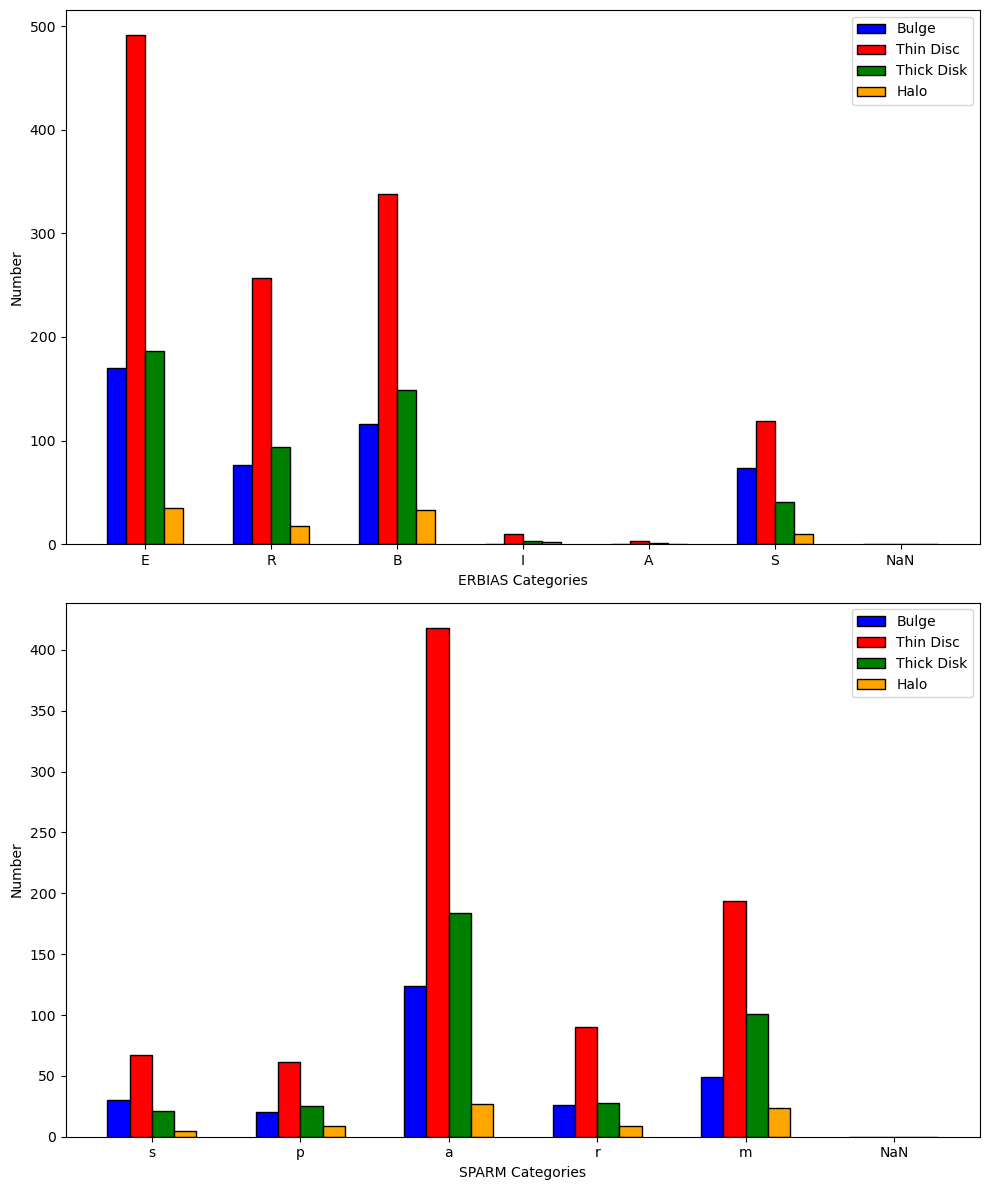

In [246]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

# Excel dosyasını oku
excel_path = '/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/bilgiislem/8.34/Disc_Region.xlsx'
neat_result_df = pd.read_excel(excel_path, sheet_name='neat_result')
renklendirilmis_df = pd.read_excel(excel_path, sheet_name='Sayfa2')

# Histogramları kaydetmek için klasör oluştur
output_folder = '/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/bilgiislem/8.34/histogramlar/ort/median/ss/'
os.makedirs(output_folder, exist_ok=True)

# Renklendirme bilgilerini tanımla
renk_etiketleri = {
    'Bulge': 'blue',
    'Thin Disc': 'red',
    'Thick Disk': 'green',
    'Halo': 'orange'
}

# Renklendirme bilgilerini ekle
idPNMain_sutunu = renklendirilmis_df['idPNMain']
gbilesen_sutunu = renklendirilmis_df['Gbileşen']
renk_dict = dict(zip(idPNMain_sutunu, gbilesen_sutunu.map(renk_etiketleri)))

# ERBIAS histogramını oluşturacak fonksiyon
def plot_erbias_histogram(ax):
    erbias_sutunu = neat_result_df['ERBIAS']
    categories = ['E', 'R', 'B', 'I', 'A', 'S', np.nan]
    category_names = ['E', 'R', 'B', 'I', 'A', 'S', 'NaN']
    x_positions = np.arange(len(categories))  # Her kategori için x eksenindeki pozisyonlar
    bar_width = 0.15  # Sütun genişliği
    offset = np.zeros_like(x_positions, dtype=float)  # Her kategori için başlangıçta kaydırma 0

    for component, color in renk_etiketleri.items():
        counts = []

        for category in categories:
            filtered_gbilesen_sutunu = gbilesen_sutunu[erbias_sutunu == category]
            component_count = filtered_gbilesen_sutunu[filtered_gbilesen_sutunu == component].count()
            counts.append(component_count)

        # Sütunları çiz
        ax.bar(x_positions + offset, counts, bar_width, color=color, edgecolor='black', label=component)
        offset += bar_width  # Sonraki bileşen için kaydırmayı artır

    # X eksenini özelleştir
    ax.set_xticks(x_positions + bar_width * 1.5)
    ax.set_xticklabels(category_names)
    ax.set_xlabel('ERBIAS Categories')
    ax.set_ylabel('Number')
    ax.legend(loc='upper right')

# SPARM histogramını oluşturacak fonksiyon
def plot_sparm_histogram(ax):
    sparm_sutunu = neat_result_df['SPARM']
    categoriess = ['s', 'p', 'a', 'r', 'm', np.nan]
    category_namess = ['s', 'p', 'a', 'r', 'm', 'NaN']
    x_positions = np.arange(len(categoriess))  # Her kategori için x eksenindeki pozisyonlar
    bar_width = 0.15  # Sütun genişliği
    offset = np.zeros_like(x_positions, dtype=float)  # Her kategori için başlangıçta kaydırma 0

    for component, color in renk_etiketleri.items():
        counts = []

        for category in categoriess:
            filtered_gbilesen_sutunu = gbilesen_sutunu[sparm_sutunu == category]
            component_count = filtered_gbilesen_sutunu[filtered_gbilesen_sutunu == component].count()
            counts.append(component_count)

        # Sütunları çiz
        ax.bar(x_positions + offset, counts, bar_width, color=color, edgecolor='black', label=component)
        offset += bar_width  # Sonraki bileşen için kaydırmayı artır

    # X eksenini özelleştir
    ax.set_xticks(x_positions + bar_width * 1.5)
    ax.set_xticklabels(category_namess)
    ax.set_xlabel('SPARM Categories')
    ax.set_ylabel('Number')
    ax.legend(loc='upper right')

# Fonksiyonları çağırarak histogramları oluştur
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

plot_erbias_histogram(axs[0])
plot_sparm_histogram(axs[1])

plt.tight_layout()

# Grafiklerin PNG formatında kaydedilmesi
png_output_path = os.path.join(output_folder, 'ERBIAS_SPARM_histograms.png')
plt.savefig(png_output_path)

# Grafiklerin PDF formatında kaydedilmesi
pdf_output_path = os.path.join(output_folder, 'ERBIAS_SPARM_histograms.pdf')
with PdfPages(pdf_output_path) as pdf:
    pdf.savefig(fig)

plt.show()

In [254]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from matplotlib.backends.backend_pdf import PdfPages

# Excel dosyasını oku
excel_yolu = "/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/bilgiislem/8.34/Disc_Region.xlsx"
neat_result_df = pd.read_excel(excel_yolu, sheet_name='neat_result')
renklendirilmis_df = pd.read_excel(excel_yolu, sheet_name='Sayfa2')

# Histogramlar için klasör oluştur
klasor_yolu = "/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/bilgiislem/8.34/histogramlar/hash/"
if not os.path.exists(klasor_yolu):
    os.makedirs(klasor_yolu)

# Ortalamalar için dosya oluştur
ortalama_dosyasi_yolu = os.path.join(klasor_yolu, "ortalama.txt")

# Renklendirme fonksiyonu
def get_color(component):
    if component == 'Bulge':
        return 'blue'
    elif component == 'Thin Disc':
        return 'red'
    elif component == 'Thick Disk':
        return 'green'
    elif component == 'Halo':
        return 'orange'
    else:
        return None

# Renklendirme bilgilerini ekle
renklendirilmis_df['color'] = renklendirilmis_df['Gbileşen'].apply(get_color)
renk_dict = renklendirilmis_df.set_index('idPNMain')['color'].to_dict()

# Sütun başlıkları sadece Diameter ve Angular Width
sutun_basliklari = ['Diameter', 'Angular Width']

# Histogram parametreleri sadece Diameter ve Angular Width için
histogram_parametreleri = {
    'Diameter': {'bins': 50, 'range': (0, 200)},
    'Angular Width': {'bins': 50, 'range': (0, 4)}
}

# Ortalamaları yazmak için dosyayı aç
with open(ortalama_dosyasi_yolu, 'w') as f:
    # Her sütun için histogram oluştur
    for baslik in sutun_basliklari:
        plt.figure()
        bins = histogram_parametreleri[baslik]['bins']
        range_ = histogram_parametreleri[baslik]['range']
        ortalamalar = {}
        
        # 0 değerleri hariç tutarak tüm verilerin medyanını hesapla ve siyah kesikli çizgi olarak göster
        tum_veriler_median = neat_result_df[baslik][neat_result_df[baslik] != 0].median()
        plt.axvline(tum_veriler_median, color='black', linestyle='dashed', linewidth=1)
        print(f"{baslik} - Tüm Veriler Medyanı (0 hariç): {tum_veriler_median:.2e}")
        f.write(f"{baslik} - Tüm Veriler Medyanı (0 hariç): {tum_veriler_median:.2e}\n")
        
        for color, etiket in renk_etiketleri.items():
            filtreli_veri = neat_result_df[neat_result_df['idPNMain'].map(renk_dict) == color][baslik]
            filtreli_veri = filtreli_veri[(filtreli_veri != 0) & (filtreli_veri != 35000)]
            
            if not filtreli_veri.empty:
                plt.hist(filtreli_veri, bins=bins, range=range_, edgecolor='black', color=color, label=etiket)
                medyan = filtreli_veri.median()
                ortalamalar[etiket] = medyan
        
        # Medyan değerleri kesikli çizgilerle göster
        for etiket, medyan in ortalamalar.items():
            color = [k for k, v in renk_etiketleri.items() if v == etiket][0]
            plt.axvline(medyan, color=color, linestyle='dashed', linewidth=1)
            print(f"{baslik} - {etiket} Medyan (0 hariç): {medyan:.2e}")
            f.write(f"{baslik} - {etiket} Medyan (0 hariç): {medyan:.2e}\n")
        
        # Plot ayarları
        plt.xlabel(baslik)
        plt.ylabel("Number")
        plt.legend(fontsize=12)
        
        # Histogramı kaydet
        kaydet_yolu = os.path.join(klasor_yolu, f"{baslik.replace('/', '_')}.png")
        plt.savefig(kaydet_yolu, dpi=300)
        
        # Plot'u temizle
        plt.clf()

print("Histogramlar başarıyla oluşturuldu ve medyanlar listeye yazıldı.")

# PDF dosyası yolu
pdf_dosyasi_yolu = "/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/bilgiislem/8.34/histogramlar/hash/selected_histograms.pdf"

# Histogram başlıkları sadece Diameter ve Angular Width için
basliklar = ['Diameter', 'Angular Width']

# PDF ile grafik oluşturma
with PdfPages(pdf_dosyasi_yolu) as pdf:
    plt.figure(figsize=(12, 12))  # Şekil boyutunu ayarlayın

    for i, baslik in enumerate(basliklar):
        plt.subplot(len(basliklar), 1, i + 1)  # 1 satır, len(basliklar) sütunlu alt grafikleri oluşturur
        bins = histogram_parametreleri[baslik]['bins']
        range_ = histogram_parametreleri[baslik]['range']
        ortalamalar = {}
        
        # 0 değerleri hariç tutarak tüm verilerin medyanını hesapla ve siyah kesikli çizgi olarak göster
        tum_veriler_median = neat_result_df[baslik][neat_result_df[baslik] != 0].median()
        plt.axvline(tum_veriler_median, color='black', linestyle='dashed', linewidth=1)
        
        for color, etiket in renk_etiketleri.items():
            filtreli_veri = neat_result_df[neat_result_df['idPNMain'].map(renk_dict) == color][baslik]
            filtreli_veri = filtreli_veri[(filtreli_veri != 0) & (filtreli_veri != 35000)]
            
            if not filtreli_veri.empty:
                plt.hist(filtreli_veri, bins=bins, range=range_, edgecolor='black', color=color, label=etiket)
                medyan = filtreli_veri.median()
                ortalamalar[etiket] = medyan
        
        for etiket, medyan in ortalamalar.items():
            color = [k for k, v in renk_etiketleri.items() if v == etiket][0]
            plt.axvline(medyan, color=color, linestyle='dashed', linewidth=1)
        
        plt.xlabel(baslik)
        plt.ylabel("Number")
        plt.legend(fontsize=12)
        plt.tight_layout()  # Alt grafiklerin sıkışmaması için düzenler

    pdf.savefig()  # Tek bir sayfaya tüm alt grafiklerle birlikte kaydeder
    plt.clf()

print("Belirtilen sütunlar için PDF dosyası oluşturuldu.")


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Diameter - Tüm Veriler Medyanı (0 hariç): 1.50e+01
Angular Width - Tüm Veriler Medyanı (0 hariç): 3.36e-01


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Histogramlar başarıyla oluşturuldu ve medyanlar listeye yazıldı.
Belirtilen sütunlar için PDF dosyası oluşturuldu.


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

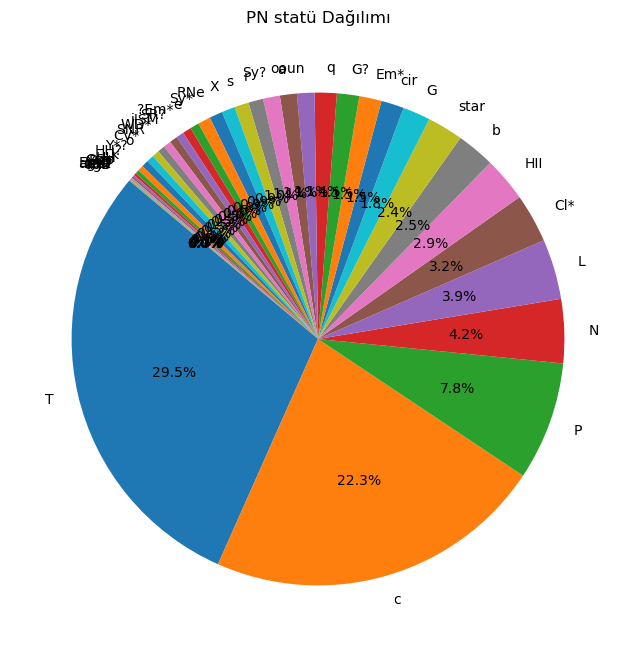

In [257]:
import pandas as pd
import matplotlib.pyplot as plt

# Excel dosyasını oku
dosya_yolu = "/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/sigma_5/bilgiislem/8.34/Disc_Region.xlsx"
sayfa_adi = "Sayfa15"
data = pd.read_excel(dosya_yolu, sheet_name=sayfa_adi)

# "no distance" olanları filtrele
filtered_data = data[data['PNstat'] != 'no distance']

# Grupları say ve yüzdeleri hesapla
group_counts = filtered_data['PNstat'].value_counts()
group_percentages = group_counts / group_counts.sum() * 100

# Pasta grafiği oluştur
plt.figure(figsize=(8, 8))
plt.pie(group_percentages, labels=group_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('PN statü Dağılımı')
plt.show()
